In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
import os
os.chdir("/content/drive/")
!ls

MyDrive


In [ ]:
import os
os.chdir("/content/drive/My Drive")
!ls

'Colab Notebooks'	   IMG-20201111-WA0009.jpg   IMG-20201111-WA0016.jpg
 Image_classification	   IMG-20201111-WA0010.jpg   IMG-20201111-WA0017.jpg
 IMG-20201111-WA0004.jpg   IMG-20201111-WA0011.jpg   IMG-20201111-WA0018.jpg
 IMG-20201111-WA0005.jpg   IMG-20201111-WA0012.jpg   IMG-20201111-WA0019.jpg
 IMG-20201111-WA0006.jpg   IMG-20201111-WA0013.jpg   IMG-20201111-WA0020.jpg
 IMG-20201111-WA0007.jpg   IMG-20201111-WA0014.jpg   Untitled0.ipynb
 IMG-20201111-WA0008.jpg   IMG-20201111-WA0015.jpg


In [ ]:
! ls /content/drive/My\ Drive/Image_classification/data/

ls: cannot access '/content/drive/My Drive/Image_classification/data/': Transport endpoint is not connected


# **Business Problem**



Chest X-rays are primarily used for the diagnosis of pneumonia. However, even for a trained radiologist, it is a challenging task to examine chest X-rays.
To solve this problem, deep learning (DL), a branch of machine learning (ML),  are developed to detect hidden features in images which are not apparent or cannot be detected even by medical experts. 
With AI system aiding medical experts in expediting the diagnosis, earlier treatment can be prescribed, resulting in improved clinical outcomes.

How to determine via Chest X-rays?

When interpreting the x-ray, the radiologist will look for white spots in the lungs (called infiltrates) that identify pneumonia.

Solution: We are going to build  an automated methods to detect and classify pneumonia & normal from medical X-ray images.


## **Libaries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', color_codes=True)
from sklearn.metrics import precision_score, recall_score, f1_score
import os
import datetime

import tensorflow as tf
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import plot_model
from keras.models import Sequential
from keras.regularizers import l1_l2

from sklearn.metrics import classification_report, confusion_matrix
import numpy as np 
import pandas as pd
import os
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import chain
from random import sample
import itertools
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import keras
from sklearn.metrics import classification_report, confusion_matrix

# Deep learning libraries
import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf
from keras import layers
from keras import models
from keras import optimizers, regularizers

from matplotlib.pyplot import *
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

## Data 

The dataset is organized into three folders - train, val and test, each having two subfolders (for corresponding class) NORMAL and PNEUMONIA.

Source
The chest X-ray images were taken from pedriatic patients from Guangzhou Women and Children’s Medical Center, China. All chest radiographs were initially scanned for quality control by removing the low quality or unreadable scans.

Link for the dataset - Kaggle - Chest X-ray Images


In [ ]:
# counting number of normal images and pneumonia images in each dataset of 
#training, testing and validation
path='/content/drive/My Drive/Image_classification/data/'
# Numbers of pneumonia and normal images in each set
for folder in ['train', 'val', 'test']:
    n_normal = len(os.listdir(path + folder + '/NORMAL'))
    n_pneumonia = len(os.listdir(path + folder + '/PNEUMONIA'))
    print("There are {} normal x-ray images and {} pnemonia x-ray images in {}
     set. ".format(n_normal, n_pneumonia, folder))

There are 929 normal x-ray images and 2614 pnemonia x-ray images in train set. 
There are 330 normal x-ray images and 832 pnemonia x-ray images in val set. 
There are 321 normal x-ray images and 827 pnemonia x-ray images in test set. 


In [2]:
# train, test and validation directories of x-ray dataset images 
train_data_dir=('/content/drive/My Drive/Image_classification/data/train')
val_data_dir=('/content/drive/My Drive/Image_classification/data/val')
test_data_dir=('/content/drive/My Drive/Image_classification/data/test')

In [ ]:
#path for train normal and pneumonia images
train_normal = os.listdir(
    '/content/drive/My Drive/Image_classification/data/train/NORMAL')
                                                 
train_pneumonia = os.listdir(
    '/content/drive/My Drive/Image_classification/data/train/PNEUMONIA')

In [ ]:
#path for test normal and pneumonia images
test_normal = os.listdir(
    '/content/drive/My Drive/Image_classification/data/test/NORMAL')
test_pneumonia = os.listdir(
    '/content/drive/My Drive/Image_classification/data/test/PNEUMONIA')

In [ ]:
#path for validation normal and pneumonia images
val_normal = os.listdir(
    '/content/drive/My Drive/Image_classification/data/val/NORMAL')
val_pneumonia = os.listdir(
    '/content/drive/My Drive/Image_classification/data/val/PNEUMONIA')

In [ ]:
# classification of validation data
image_val = []
targets_val = []
val_normal = "/content/drive/My Drive/Image_classification/data/val/NORMAL/"
val_pneumonia = "/content/drive/My Drive/Image_classification/data/val/PNEUMONIA/"
for i in os.listdir(val_normal):
    image_path = os.path.join(
        "/content/drive/My Drive/Image_classification/data/val/NORMAL/", i)
    image_val.append(image_path)
    targets_val.append("normal")

val_n = pd.DataFrame()
val_n["image"] = image_val
val_n["target"] = targets_val

image_val_p = []
targets_val_p = []

for i in os.listdir(val_pneumonia):
    image_path = os.path.join(
        "/content/drive/My Drive/Image_classification/data/val/PNEUMONIA/", i)
    image_val_p.append(image_path)
    targets_val_p.append("pneumonia")

val_p = pd.DataFrame()
val_p["image"] = image_val_p
val_p["target"] = targets_val_p

val = pd.concat([val_n, val_p], axis = 0, ignore_index=True)

In [ ]:
#classification of train data
image_train = []
targets_train = []
train_normal = "/content/drive/My Drive/Image_classification/data/train/NORMAL/"
train_pneumonia = "/content/drive/My Drive/Image_classification/data/train/PNEUMONIA/"
for i in os.listdir(train_normal):
    image_path = os.path.join(
        "/content/drive/My Drive/Image_classification/data/train/NORMAL/", i)
    image_train.append(image_path)
    targets_train.append("normal")

train_n = pd.DataFrame()
train_n["image"] = image_train
train_n["target"] = targets_train

image_train_p = []
targets_train_p = []

for i in os.listdir(train_pneumonia):
    image_path = os.path.join(
        "/content/drive/My Drive/Image_classification/data/train/PNEUMONIA/", i)
    image_train_p.append(image_path)
    targets_train_p.append("pneumonia")

train_p = pd.DataFrame()
train_p["image"] = image_train_p
train_p["target"] = targets_train_p

train = pd.concat([train_n, train_p], axis = 0, ignore_index=True)


In [ ]:
#classification of test data
image_test = []
targets_test = []
test_normal = "/content/drive/My Drive/Image_classification/data/test/NORMAL/"
test_pneumonia = "/content/drive/My Drive/Image_classification/data/test/PNEUMONIA/"
for i in os.listdir(test_normal):
    image_path = os.path.join(
        "/content/drive/My Drive/Image_classification/data/test/NORMAL/", i)
    image_test.append(image_path)
    targets_test.append("normal")

test_n = pd.DataFrame()
test_n["image"] = image_test
test_n["target"] = targets_test

image_test_p = []
targets_test_p = []

for i in os.listdir(test_pneumonia):
    image_path = os.path.join(
        "/content/drive/My Drive/Image_classification/data/test/PNEUMONIA/", i)
    image_test_p.append(image_path)
    targets_test_p.append("pneumonia")

test_p = pd.DataFrame()
test_p["image"] = image_test_p
test_p["target"] = targets_test_p

test = pd.concat([test_n, test_p], axis = 0, ignore_index=True)

## **Functions**

In [ ]:
#function to plot accuracy and loss of train and validations data
def visualize_training_results(result):

  ''' Visualization plot of accuracy and loss of traing and validation data'''
  
  acc = result.history['acc']
  val_acc = result.history['val_acc']
  loss = result.history['loss']
  val_loss = result.history['val_loss']
  epochs = range(len(acc))
  plt.figure(figsize=(10,5))
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy',fontsize=15)
  plt.legend()

  plt.figure(figsize=(10,5))
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'g', label='Validation loss')
  plt.title('Training and validation loss', fontsize=15)
  plt.legend()
  plt.show()

In [ ]:
# function that calculations different model metrics

def evaluation_result(model, model_description):
    ''' function to calculate recall, precision, loss, accuracy of train, 
    test, validation data''' 
        
    from sklearn.metrics import precision_score, recall_score, f1_score
    train_steps_per_epoch = np.math.ceil(
        train_generator.samples / train_generator.batch_size)
    val_steps_per_epoch = np.math.ceil(
        val_generator.samples / val_generator.batch_size)
    test_steps_per_epoch = np.math.ceil(
        test_generator.samples / test_generator.batch_size)   
    train_loss, train_acc = model.evaluate_generator(
        train_generator, steps=train_steps_per_epoch)
    val_loss, val_acc = model.evaluate_generator(
        val_generator, steps=val_steps_per_epoch)
    test_loss, test_acc = model.evaluate_generator(
        test_generator, steps=test_steps_per_epoch)
    pred = model.predict_generator(test_generator, test_steps_per_epoch)
    pred_classes = np.round(pred)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())
    precision_score = precision_score(true_classes, pred_classes)
    recall_score = recall_score(true_classes, pred_classes)
    f1_score = f1_score(true_classes, pred_classes)
    curr_dict = { 'Model':model_description
                 ,'Train Accuracy': round(train_acc, 4)
                 ,'Train Loss': round(train_loss, 4)
                 ,'Validation Accuracy':round(val_acc, 4)
                 ,'validation Loss':round(val_loss, 4)
                 ,'Test Accuracy':round(test_acc, 4)
                 ,'Test Loss':round(test_loss, 4)
                 ,'Precision':round(precision_score, 4)
                 ,'Recall':round(recall_score, 4)
                 ,'f1':round(f1_score, 4)
                  }
    return curr_dict

In [ ]:
def evaluation_result1(model, model_description):

    ''' function to calculate recall, precision, loss, accuracy of
    train, validation data'''
  
    from sklearn.metrics import precision_score, recall_score, f1_score
    train_steps_per_epoch = np.math.ceil(
        train_generator.samples / train_generator.batch_size)
    val_steps_per_epoch = np.math.ceil(
        val_generator.samples / val_generator.batch_size)
      
    train_loss, train_acc = model.evaluate_generator(
        train_generator, steps=train_steps_per_epoch)
    val_loss, val_acc = model.evaluate_generator(
        val_generator, steps=val_steps_per_epoch)
   
    pred = model.predict_generator(val_generator, val_steps_per_epoch)
    pred_classes = np.round(pred)
    true_classes = val_generator.classes
    class_labels = list(val_generator.class_indices.keys())
    precision_score = precision_score(true_classes, pred_classes)
    recall_score = recall_score(true_classes, pred_classes)
    f1_score = f1_score(true_classes, pred_classes)
    curr_dict = { 'Model':model_description
                 ,'Train Accuracy': round(train_acc, 4)
                 ,'Train Loss': round(train_loss, 4)
                 ,'Validation Accuracy':round(val_acc, 4)
                 ,'validation Loss':round(val_loss, 4)
                 ,'Precision':round(precision_score, 4)
                 ,'Recall':round(recall_score, 4)
                 ,'f1':round(f1_score, 4)
                  }
    return curr_dict

In [ ]:
# Confuion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    ''' plot confusion matrix '''
    
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    plt.grid(b = None)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 fontsize = 12,
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print('True Negatives: ', cm[0][0])
    print('False Positives: ', cm[0][1])
    print('False Negatives: ', cm[1][0])
    print('True Positives: ', cm[1][1])
   
  

# **Data Exploration & Visualization**

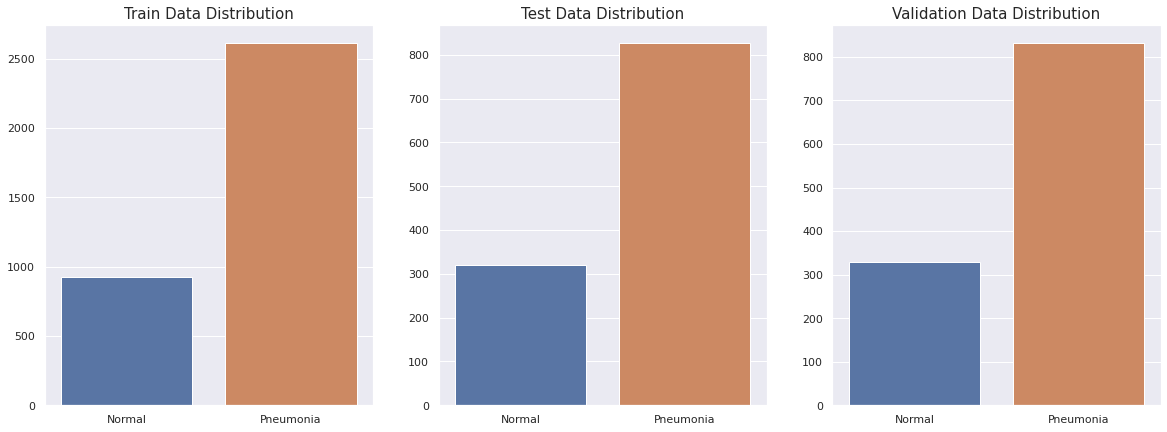

In [ ]:
# plot shows the number of normal images versus pneumonia images in Train, Val and test set
plt.figure(figsize=(20, 7))
plt.subplot(131)
plt.title('Train Data Distribution', fontsize=15)
sns.barplot(x=['Normal','Pneumonia'],y=[len(train_normal),len(train_pneumonia)])
plt.subplot(132)
plt.title('Test Data Distribution', fontsize=15)
sns.barplot(x=['Normal','Pneumonia'],y=[len(test_normal),len(test_pneumonia)])
plt.subplot(133)
plt.title('Validation Data Distribution', fontsize=15)
sns.barplot(x=['Normal','Pneumonia'],y=[len(val_normal),len(val_pneumonia)])
plt.show()

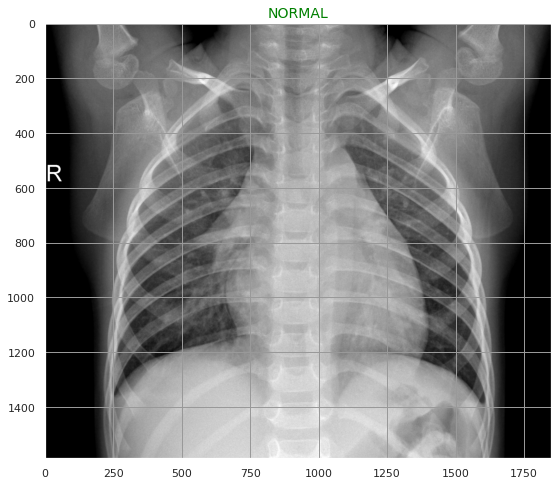

In [ ]:
# Sample picture Normal
plt.figure(figsize=(12,8))
train_path= '/content/drive/My Drive/Image_classification/data/train'
plt.title("NORMAL", color = "green", size = 14)
img = load_img(train_path +"/NORMAL/IM-0452-0001.jpeg")
plt.grid(color='#999999', linestyle='-')
plt.imshow(img)
plt.show()

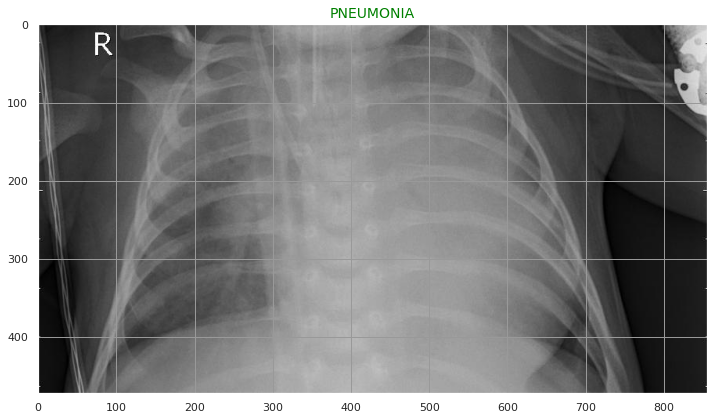

In [ ]:
# Sample picture Pneumonia
train_path= '/content/drive/My Drive/Image_classification/data/train'
plt.figure(figsize=(12,8))
plt.title("PNEUMONIA", color = "green", size = 14)
img = load_img(train_path +"/PNEUMONIA/person374_bacteria_1710.jpeg")
plt.grid(color='#999999', linestyle='-')
plt.imshow(img)
plt.show()

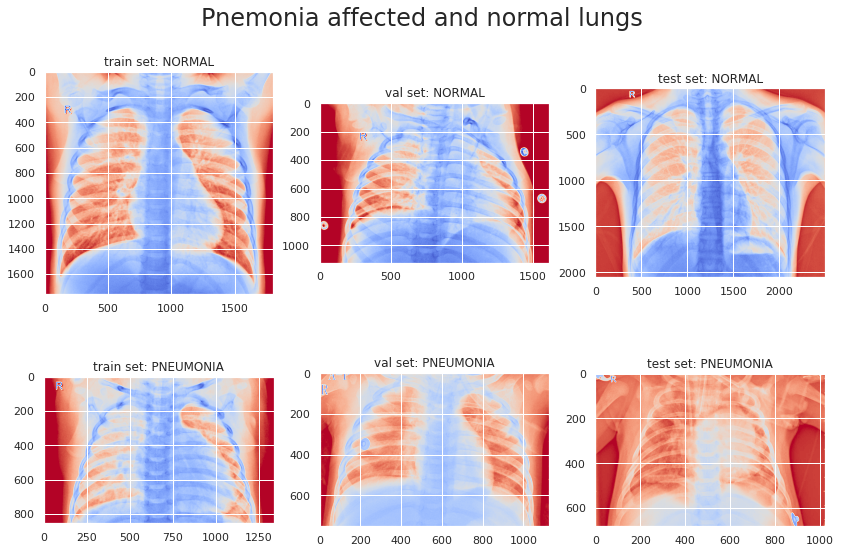

In [ ]:
# displaying noraml x-ray images and pneumonia x-ray images in train, 
# test and val using imshow,imread
path='/content/drive/My Drive/Image_classification/data/'
fig, ax = plt.subplots(2, 3, figsize=(14, 9))
ax = ax.ravel()

fig.suptitle('Pnemonia affected and normal lungs', fontsize=24)

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = path+_set
    ax[i].imshow(plt.imread(
        set_path+'/NORMAL/'+os.listdir(set_path+'/NORMAL')[0]), cmap='coolwarm_r')
    ax[i].set_title('{} set: NORMAL'.format(_set))
    ax[i+3].imshow(plt.imread(
        set_path+'/PNEUMONIA/'+os.listdir(set_path+'/PNEUMONIA')[0]), cmap='coolwarm_r')
    ax[i+3].set_title('{} set: PNEUMONIA'.format(_set))


## **Model 0: Baseline**

*Convolutional Neural Network (cnn) model, with data augmentation, optimizer of RMSprop & activation of relu.*




## **Data Preprocessing**

Data Generator:

ImageDataGenerator() is used. The ImageDataGenerator will automatically label all the data inside Pneumonia folder as Pneumonia and Normal for Normal folder. In this way data is easily ready to be passed to the neural network.


## **Model 0: Data Generator- Data Augmentation**

To build a powerful image classifier using very little training data, image augmentation is usually required to boost the performance of deep networks. Image augmentation artificially creates training images through different ways of processing or combination of multiple processing, such as random rotation, shifts, shear and flips, etc of each training instances .


In [ ]:
#Data Augmentation
#augment train  dataset to prevent overfitting by increasing number of images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40, # randomly rotate imgaes
                                   width_shift_range = 0.2, # randomly shift images
                                   height_shift_range = 0.2, # randomly shift images
                                   shear_range = 0.2, # randomly shear angles
                                   zoom_range = 0.2, # randomly zoom images
                                   fill_mode = "constant")

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = "binary")

val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator= val_datagen.flow_from_directory(val_data_dir,
                                              
                                              target_size = (150, 150),
                                              batch_size = 32,
                                              class_mode = "binary")

# rescale test dataset without augmentation since real world data is not augmented
test_datagen = ImageDataGenerator(rescale = 1./255)

# set shuffle = False for test set or else when making prediction later,
# function .evaluate() and function .predict_classes() will yield different accuracy score.
# when set to False, data is sorted in alphanumeric order while default is set to True,
# which shuffles the data.
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                 
                                                  target_size = (150, 150),
                                                  class_mode = "binary",
                                                  batch_size = 32, shuffle=False)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [ ]:
# counting the stepsize per epoch
train_steps_per_epoch = np.math.ceil(
    train_generator.samples / train_generator.batch_size)
val_steps_per_epoch = np.math.ceil(
    val_generator.samples / val_generator.batch_size)
test_steps_per_epoch = np.math.ceil(
    test_generator.samples / test_generator.batch_size)

## **Model 0: CNN Architecture**

Use 4 different conv layers with max pooling.
Use dense layer with 512 neurons and finally the output layer with one neuron.

A CNN architecture is composed of convolutional layer with ReLU, pooling layer, fully connected layer, and loss layer.



1.   Start by initializing a Sequential model.
2.   Add  Convolutional layers apply a filter to input and create a feature map that summarizes the presence of detected features in the input. As observed in the above figure, the input image gets smaller and smaller as it progresses through the network but it also gets deeper and deeper with feature map. I add one Conv2D layer with a filter/kernel size of 3 x 3, adding ReLU activation function to set negative values to zero, and specify input_shape = (150, 150, 3)
3.   Pooling layer is sandwiched between two successive convolutional layers to reduce the spatial size of the convoluted feature/ parameters in the network. MaxPooling is the most common pooling methods to reduce image size by pooling the most important feature. Here I use MaxPool2D with a pool size of 2, meaning it divides each spatial dimension by a factor of 2. 
4.   Repeat the above three more times.
5. Add a Flatten layer to convert each input image into a 1D array: if it receives input data X, it computes X.reshape(-1, 1). The flatten data that comes out of the convolutions and is then fed to the fully connected layers, which consist of two hidden Dense layers and an output hidden Dense layer with one neuron using activation = 'sigmoid'.

The number of filters which is same as number of features has been increasing in my conv layers from 32 to 64 to 128. With each conv layers, we are going to double the number of filters i'm going to use.Another thing with max pooling 2 by 2, we are reducing the size of our images , so the image of 150 by 150, after first max pooling will be 75 by 75. Then the image size after second max pooling will be 37 by 37. Then after third max pooling image size will be 18 by 18. Then the last image size 9 by 9. As we go along in our neural network number of features (filters) are increasing while the weight and length of our images are decreasing. So image size should decrease with each conv layer and the feature map height length increase as we go along the neural network.


In [ ]:
#model0
model0 = Sequential()

# Fist Conv layer with 32 filters,3 by 3 window, input size 150 by 150 
# by 3 for RGB as third dimension
model0.add(Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
#First Max Pooling  layer with window 2 by 2
model0.add(MaxPooling2D(pool_size = (2, 2)))

#  Second Conv layer with filter =64, window=3 by 3 
model0.add(Conv2D(64, (3, 3), activation="relu"))
# 2d Pooling layer with window 2 by 2
model0.add(MaxPooling2D(pool_size = (2, 2)))

# Third Conv layer with 128 features, window=3 by 3
model0.add(Conv2D(128, (3, 3), activation='relu'))
# 3rd Pooling layer with window 2 by 2
model0.add(MaxPooling2D((2, 2)))

# Forth Conv layer with 128 features, window=3 by 3
model0.add(Conv2D(128, (3, 3), activation='relu'))
# 4th Pooling layer with window 2 by 2
model0.add(MaxPooling2D((2, 2)))

# Flatten the layer
model0.add(Flatten())

# Fully Connected Layers
# single dense layer with 512 neurons
model0.add(Dense(activation = 'relu', units = 512))

#single output layer with one neuron since we only want to predict two classes
model0.add(Dense(activation = 'sigmoid', units = 1))

#Compile the neural network
model0.compile(loss = "binary_crossentropy",
             optimizer = RMSprop(lr = 1e-4), ### learning rate 0.0001
             metrics = ["acc"])

model0.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls /content/gdrive/MyDrive 


'Colab Notebooks'	   IMG-20201111-WA0013.jpg
 Image_classification	   IMG-20201111-WA0014.jpg
 IMG-20201111-WA0004.jpg   IMG-20201111-WA0015.jpg
 IMG-20201111-WA0005.jpg   IMG-20201111-WA0016.jpg
 IMG-20201111-WA0006.jpg   IMG-20201111-WA0017.jpg
 IMG-20201111-WA0007.jpg   IMG-20201111-WA0018.jpg
 IMG-20201111-WA0008.jpg   IMG-20201111-WA0019.jpg
 IMG-20201111-WA0009.jpg   IMG-20201111-WA0020.jpg
 IMG-20201111-WA0010.jpg   Pneumonia_Diagnosis_Detection
 IMG-20201111-WA0011.jpg   Pneumonia_Diagnosis_Project
 IMG-20201111-WA0012.jpg   Untitled0.ipynb


In [ ]:
model_save_name = 'model0.h5'
path = F"/content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/{model_save_name}" 
model.save(path)

In [ ]:
model_save_name = 'model0'
path = F"/content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/{model_save_name}" 

In [ ]:
from tensorflow import keras
my_model = keras.models.load_model(path) 

In [ ]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## **Model 0: Fitting**

In [ ]:
# Fitting training and validation data into the model

#Set random seed to 42, to replicate the same results

np.random.seed(42)
tf.random.set_seed(42)


start = datetime.datetime.now()
result_model0 = model0.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch, 
                              epochs=30, 
                              validation_data=val_generator, 
                              validation_steps=val_steps_per_epoch)

end = datetime.datetime.now()
elapsed = end - start
print('\n ---------Elapsed Time-----------')
print('Time to fit model0 is:\n {}'.format(elapsed))



Epoch 1/30
111/111 [==============================] - 2585s 23s/step - loss: 0.5940 - acc: 0.7155 - val_loss: 0.5144 - val_acc: 0.7160
Epoch 2/30
111/111 [==============================] - 57s 513ms/step - loss: 0.5215 - acc: 0.7523 - val_loss: 0.4369 - val_acc: 0.7530
Epoch 3/30
111/111 [==============================] - 57s 510ms/step - loss: 0.4566 - acc: 0.7823 - val_loss: 0.2930 - val_acc: 0.9096
Epoch 4/30
111/111 [==============================] - 57s 511ms/step - loss: 0.4039 - acc: 0.8015 - val_loss: 0.4568 - val_acc: 0.7625
Epoch 5/30
111/111 [==============================] - 57s 509ms/step - loss: 0.3916 - acc: 0.8260 - val_loss: 0.3465 - val_acc: 0.8460
Epoch 6/30
111/111 [==============================] - 57s 512ms/step - loss: 0.3486 - acc: 0.8433 - val_loss: 0.6815 - val_acc: 0.6136
Epoch 7/30
111/111 [==============================] - 57s 514ms/step - loss: 0.3333 - acc: 0.8528 - val_loss: 0.2073 - val_acc: 0.9312
Epoch 8/30
111/111 [==============================] - 5

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#save model
model_save_name = 'model0'
path =  F"/content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/{model_save_name}"                         
model.save(path)

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/model0/assets


In [ ]:
#save model
model_save_name = 'model0.h5'
path = F"/content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/{model_save_name}" 
model.save(path)

## **Model Evaluation**

## **Model 0: Visualization of loss and accuracy of training and validation data**

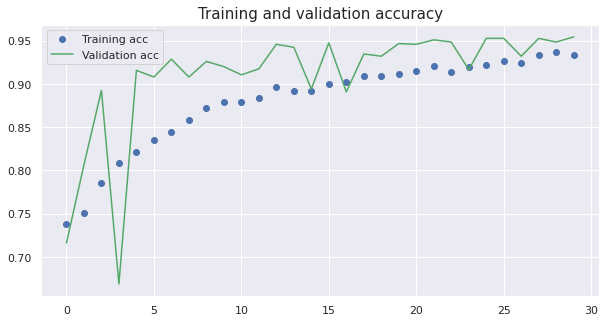

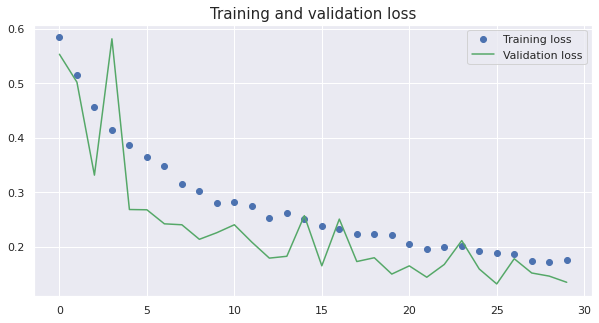

In [ ]:
# Visualization of accuracy and loss in tarining and validation data

visualize_training_results(result_model0)

## **Model0: Metrics**

In [ ]:
# Collecting model metrics

evaluation_result(model0, 'base model: Model0 with data augmentation')

{'Model': 'base model: Model0 with data augmentation',
 'Precision': 0.9539,
 'Recall': 0.9262,
 'Test Accuracy': 0.9146,
 'Test Loss': 0.2474,
 'Train Accuracy': 0.9404,
 'Train Loss': 0.1507,
 'Validation Accuracy': 0.9415,
 'f1': 0.9399,
 'validation Loss': 0.1662}

In [ ]:
results=evaluation_result(model0, 'model0 with data augmentation')
results_final = []
# appending the results of the new model
results_final.append(results)
#  results in dataframe
df_model_results = pd.DataFrame(results_final)
df_model_results

,Model,Train Accuracy,Train Loss,Validation Accuracy,validation Loss,Test Accuracy,Test Loss,Precision,Recall,f1
0,model0 with data augmentation,0.9337,0.1668,0.9544,0.1345,0.9199,0.2302,0.919,0.9746,0.946


In [ ]:
#evaluate
print('Train loss & accuracy:' , model0.evaluate(train_generator))
print('\n')
print('Test loss & accuracy:' , model0.evaluate(test_generator))

111/111 [==============================] - 49s 440ms/step - loss: 0.1606 - acc: 0.9354
Train loss & accuracy: [0.16056539118289948, 0.9353654980659485]


36/36 [==============================] - 10s 275ms/step - loss: 0.2302 - acc: 0.9199
Test loss & accuracy: [0.23015733063220978, 0.9198606014251709]


## **Model 0:  Prediction & Classification Report**

In [ ]:
# get predictions on the validation  set
y_hat = model0.predict_classes(val_images)

cm=confusion_matrix(val_labels, np.round(y_hat))
cm

array([[323,   7],
       [154, 678]])

In [ ]:
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(323, 7, 154, 678)

In [ ]:
from sklearn.metrics import classification_report

print('Model: Model0', '\n', classification_report(
    val_labels, y_hat, target_names = ['NORMAL (Class 0)','PNEUMONIA (Class 1)']))

Model: Model0 
                      precision    recall  f1-score   support

   NORMAL (Class 0)       0.68      0.98      0.80       330
PNEUMONIA (Class 1)       0.99      0.81      0.89       832

           accuracy                           0.86      1162
          macro avg       0.83      0.90      0.85      1162
       weighted avg       0.90      0.86      0.87      1162



In [ ]:
#make prediction
pred = model0.predict_generator(test_generator, test_steps_per_epoch)
pred_classes = np.round(pred)
#define target
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("Baseline Model:\n")
print("Confusion Matrix:\n", confusion_matrix(true_classes, pred_classes))
print("----------------------------------------------------")
print("Classification Report:\n", classification_report(true_classes, pred_classes,
                                                        target_names=class_labels))

Baseline Model:

Confusion Matrix:
 [[284  37]
 [ 61 766]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

      normal       0.82      0.88      0.85       321
   pneumonia       0.95      0.93      0.94       827

    accuracy                           0.91      1148
   macro avg       0.89      0.91      0.90      1148
weighted avg       0.92      0.91      0.92      1148



In [ ]:
y_pred = my_model.predict(image_val)
y_pred = np.array(y_pred.reshape(-1))
y_pred = np.around(y_pred)
y_pred = np.array(y_pred, dtype = int)

# **Model 0: Confusion Matrix**

In [ ]:
#plot confusion matrix for validation set

cm=confusion_matrix(val_labels, np.round(y_hat))
cm

array([[323,   7],
       [154, 678]])

In [ ]:
# true negative(tn), false positive(fp), false negative (fn),
# true positive(tp) for valiation data
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(323, 7, 154, 678)

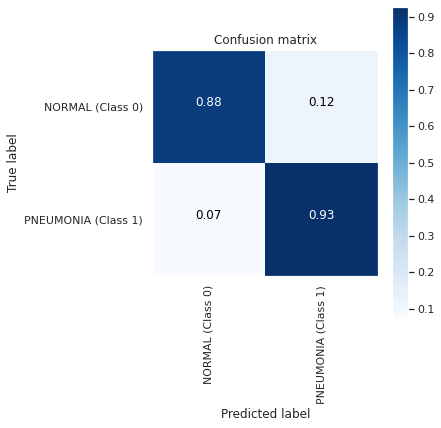

In [ ]:
#plot confusion matrix for test data
cm=confusion_matrix(true_classes, pred_classes, normalize='true')


plot_confusion_matrix(
    cm, classes = ['NORMAL (Class 0)','PNEUMONIA (Class 1)'], normalize = False)

## **Model 0: Interpretation**


The base model misclassified only  1 image out of total 1,148 images.Model 0 misclassifies pneumonia patients as normal with an error less than 0.08%.

Model 0 can detect pneumonia X-ray with recall of 99% and 87% accuracy. 

Model 0 can detect normal X-ray with 62% recall and 95% of it are true normal X-ray images.

Model 0 has a train accuracy of 0.9337,  test accuracy of 0.9199 and validation accuracy 0.9544.



# **Model 1**

Model 1 is cnn model without data augmentation

## **Model1: Data Generator- No Data Augmentation**

In [ ]:
#Data generator
train_datagen = ImageDataGenerator(rescale = 1./255)
                                   

train_generator = train_datagen.flow_from_dataframe(dataframe = train,
                                                    x_col = "image",
                                                    y_col = "target",
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = "binary")

val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator= val_datagen.flow_from_dataframe(dataframe = val,
                                              x_col = "image",
                                              y_col = "target",
                                              target_size = (150, 150),
                                              batch_size = 32,
                                              class_mode = "binary")


test_datagen = ImageDataGenerator(rescale = 1./255)

#sett shuffle = False for test set or else when making prediction later, function .evaluate() and function .predict_classes() will yield different accuracy score.
#when set to False, data is sorted in alphanumeric order while default is set to True, which shuffles the data.
test_generator = test_datagen.flow_from_dataframe(dataframe = test,
                                                  x_col = "image",
                                                  y_col = "target",
                                                  target_size = (150, 150),
                                                  class_mode = "binary",
                                                  batch_size = 32, shuffle=False)

train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

Found 3543 validated image filenames belonging to 2 classes.
Found 1162 validated image filenames belonging to 2 classes.
Found 1148 validated image filenames belonging to 2 classes.


In [ ]:
# counting the stepsize per epoch
train_steps_per_epoch = np.math.ceil(
    train_generator.samples / train_generator.batch_size)
val_steps_per_epoch = np.math.ceil(
    val_generator.samples / val_generator.batch_size)
test_steps_per_epoch = np.math.ceil(
    test_generator.samples / test_generator.batch_size)

## **Model 1: CNN Architecture**

Use 4 different conv layers with max pooling. No data augmentation. Use dense layer with 512 neurons and finally the output layer with one neuron.

A CNN architecture is composed of convolutional layer with Relu, pooling layer, fully connected layer, loss layer and optimizer of RMSprop.

In [ ]:
#CNN without data augmentation

model1 = Sequential()

# Fist Conv layer with 32 filters,3 by 3 window, input size 150 by 150 by 3 for 
# RGB as third dimension
model1.add(Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
#First Max Pooling  layer with window 2 by 2
model1.add(MaxPooling2D(pool_size = (2, 2)))

#  Second Conv layer with filter =64, window=3 by 3 
model1.add(Conv2D(64, (3, 3), activation="relu"))
# 2d Pooling layer with window 2 by 2
model1.add(MaxPooling2D(pool_size = (2, 2)))

# Third Conv layer with 128 features, window=3 by 3
model1.add(Conv2D(128, (3, 3), activation='relu'))
# 3rd Pooling layer with window 2 by 2
model1.add(MaxPooling2D((2, 2)))

# Forth Conv layer with 128 features, window=3 by 3
model1.add(Conv2D(128, (3, 3), activation='relu'))
# 4th Pooling layer with window 2 by 2
model1.add(MaxPooling2D((2, 2)))

# Flatten the layer
model1.add(Flatten())

# Fully Connected Layers
# single dense layer with 512 neurons
model1.add(Dense(activation = 'relu', units = 512))

#single output layer with one neuron since we only want to predict two classes
model1.add(Dense(activation = 'sigmoid', units = 1))
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
# Compile the neural network without data augmentation
model1.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4), ### learning rate 0.0001
              metrics=['acc'])




## **Model 1 : Fitting**

In [ ]:
#Fitting training and validation data into the model

# set random seed to 30 to is used to replicate the same result

np.random.seed(30)
tf.random.set_seed(30)

start = datetime.datetime.now()
result_model1 = model1.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch, 
                              epochs=30, 
                              validation_data=val_generator, 
                              validation_steps=val_steps_per_epoch)
end = datetime.datetime.now()
elapsed = end - start
print('\n ---------Elapsed Time-----------')
print('Time to fit Model 1 is:\n {}'.format(elapsed))

Epoch 1/30
111/111 [==============================] - 2700s 24s/step - loss: 0.5410 - acc: 0.7500 - val_loss: 0.3389 - val_acc: 0.8855
Epoch 2/30
111/111 [==============================] - 52s 468ms/step - loss: 0.2534 - acc: 0.8968 - val_loss: 0.2170 - val_acc: 0.9157
Epoch 3/30
111/111 [==============================] - 52s 470ms/step - loss: 0.1628 - acc: 0.9355 - val_loss: 0.1112 - val_acc: 0.9630
Epoch 4/30
111/111 [==============================] - 52s 472ms/step - loss: 0.1335 - acc: 0.9484 - val_loss: 0.0966 - val_acc: 0.9621
Epoch 5/30
111/111 [==============================] - 54s 491ms/step - loss: 0.1089 - acc: 0.9546 - val_loss: 0.0832 - val_acc: 0.9733
Epoch 6/30
111/111 [==============================] - 54s 490ms/step - loss: 0.0972 - acc: 0.9653 - val_loss: 0.1318 - val_acc: 0.9458
Epoch 7/30
111/111 [==============================] - 54s 488ms/step - loss: 0.0777 - acc: 0.9728 - val_loss: 0.1004 - val_acc: 0.9621
Epoch 8/30
111/111 [==============================] - 5

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#save model
model_save_name = 'model1'
path = F"/content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/{model_save_name}" 
model1.save(path)

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/model1/assets


In [ ]:
#save model
model_save_name = 'model1.h5'
path = F"/content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/{model_save_name}" 
model1.save(path)

## **Data Evaluation**

## **Model 1: Metrics**

In [ ]:
# Collecting model metrics

evaluation_result(model1, ' Model1 without data augmentation')

{'Model': ' Model1 without data augmentation',
 'Precision': 0.8604,
 'Recall': 0.9915,
 'Test Accuracy': 0.878,
 'Test Loss': 0.9695,
 'Train Accuracy': 0.9997,
 'Train Loss': 0.0023,
 'Validation Accuracy': 0.9768,
 'f1': 0.9213,
 'validation Loss': 0.0907}

In [ ]:
results=evaluation_result(model1, 'CNN Model without augmentation')
results_final = []
# appending the results of the new model
results_final.append(results)
#  results in dataframe
df_model_results = pd.DataFrame(results_final)
df_model_results

,Model,Train Accuracy,Train Loss,Validation Accuracy,validation Loss,Test Accuracy,Test Loss,Precision,Recall,f1
0,CNN Model without augmentation,0.9997,0.0023,0.9768,0.0907,0.878,0.9695,0.8604,0.9915,0.9213


## **Model 1: Visualization of loss and accuracy of raining and validation data**

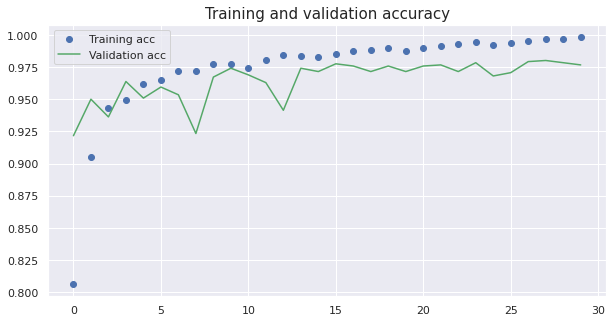

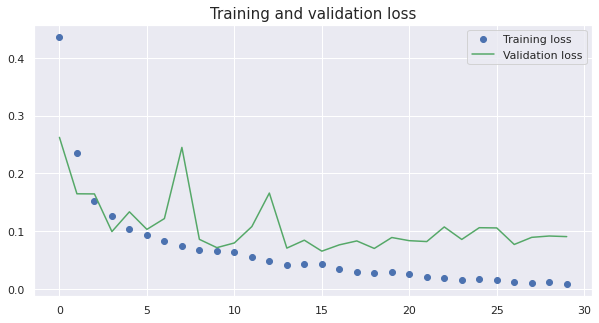

In [ ]:
#Model evaluation
visualize_training_results(result_model1)

In [ ]:
#evaluate
print('Train loss & accuracy:' , model1.evaluate(train_generator))
print('\n')
print('Test loss & accuracy:' , model1.evaluate(test_generator))

111/111 [==============================] - 37s 335ms/step - loss: 0.0023 - acc: 0.9997
Train loss & accuracy: [0.002330376533791423, 0.9997177720069885]


36/36 [==============================] - 10s 279ms/step - loss: 0.9695 - acc: 0.8780
Test loss & accuracy: [0.9695219993591309, 0.8780487775802612]


## **Model 1:  Prediction & Classification Report**

In [ ]:
#make prediction on test data
pred = model1.predict_generator(test_generator, test_steps_per_epoch)
pred_classes = np.round(pred)
#define target
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("Baseline Model:\n")
print("Confusion Matrix:\n", confusion_matrix(true_classes, pred_classes))
print("----------------------------------------------------")
print("Classification Report:\n", classification_report(true_classes, pred_classes,
                                                        target_names=class_labels))

Baseline Model:

Confusion Matrix:
 [[212 109]
 [ 15 812]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

      normal       0.93      0.66      0.77       321
   pneumonia       0.88      0.98      0.93       827

    accuracy                           0.89      1148
   macro avg       0.91      0.82      0.85      1148
weighted avg       0.90      0.89      0.89      1148



In [ ]:
# get predictions on the val set
y_hat = model1.predict_classes(val_images)

print('Model: Model1', '\n',  classification_report( 
    val_labels, y_hat, target_names = ['NORMAL (Class 0)','PNEUMONIA (Class 1)'])) 
                                                 

Model: Model1 
                      precision    recall  f1-score   support

   NORMAL (Class 0)       0.94      0.99      0.97       330
PNEUMONIA (Class 1)       1.00      0.98      0.99       832

           accuracy                           0.98      1162
          macro avg       0.97      0.98      0.98      1162
       weighted avg       0.98      0.98      0.98      1162



## **Model 1: Confusion Matrix**

In [ ]:
# confusion matrix for validation set

cm=confusion_matrix(val_labels, np.round(y_hat))
cm

array([[328,   2],
       [ 20, 812]])

In [ ]:
#true negative(tn), false positive(fp), false negative (fn),
# true positive(tp) for valiation data
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(328, 2, 20, 812)

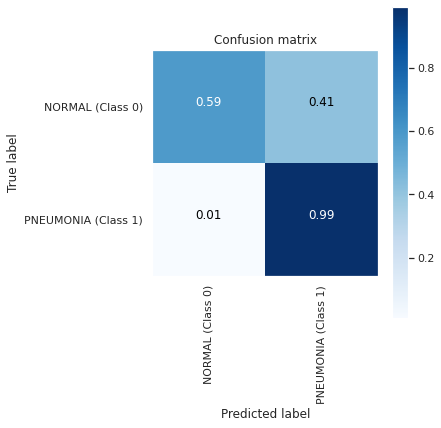

In [ ]:
#plot confusion matrix for test data
cm=confusion_matrix(true_classes, pred_classes, normalize='true')
plot_confusion_matrix(
    cm, classes = ['NORMAL (Class 0)','PNEUMONIA (Class 1)'], normalize = False)

## **Model 1: Interpretation**

Model 1 can detect pneumonia X-ray with recall of 99% and 86% accuracy. 

Model 1 can detect normal X-ray with 59% recall and 96% of it are true normal X-ray images.

Model 1 has a train accuracy of 0.9997, validation accuracy 0.9768 and test accuracy of 0.878.



## **Model 2**

## **Model 2: Data Generator-Data Augmentation**

In [ ]:
#Data Augmentation

#augment train  dataset to prevent overfitting by increasing number of images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40, # randomly rotate imgaes
                                   width_shift_range = 0.2, # randomly shift images
                                   height_shift_range = 0.2, # randomly shift images
                                   shear_range = 0.2, # randomly shear angles
                                   zoom_range = 0.2, # randomly zoom images
                                   fill_mode = "constant")

train_generator = train_datagen.flow_from_dataframe(dataframe = train,
                                                    x_col = "image",
                                                    y_col = "target",
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = "binary")

val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator= val_datagen.flow_from_dataframe(dataframe = val,
                                              x_col = "image",
                                              y_col = "target",
                                              target_size = (150, 150),
                                              batch_size = 32,
                                              class_mode = "binary")

# rescale test dataset without augmentation since real world data is not augmented
test_datagen = ImageDataGenerator(rescale = 1./255)

# set shuffle = False for test set or else when making prediction later,
# function .evaluate() and function .predict_classes() will yield different accuracy score.
# when set to False, data is sorted in alphanumeric order
# while default is set to True, which shuffles the data.
test_generator = test_datagen.flow_from_dataframe(dataframe = test,
                                                  x_col = "image",
                                                  y_col = "target",
                                                  target_size = (150, 150),
                                                  class_mode = "binary",
                                                  batch_size = 32, shuffle=False)

Found 3543 validated image filenames belonging to 2 classes.
Found 1162 validated image filenames belonging to 2 classes.
Found 1148 validated image filenames belonging to 2 classes.


In [ ]:
# counting the stepsize per epoch
train_steps_per_epoch = np.math.ceil(
    train_generator.samples / train_generator.batch_size)
val_steps_per_epoch = np.math.ceil(
    val_generator.samples / val_generator.batch_size)
test_steps_per_epoch = np.math.ceil(
    test_generator.samples / test_generator.batch_size)

# **Model 2: CNN Architecture **

Use 5 different conv layers with max pooling.
Use 3 dense layers with 512, 128, 64 neurons and finally the output layer with one neuron.

A CNN architecture is composed of convolutional layer with ReLU, pooling layer, fully connected layer, and loss layer.
I will Use for model 2 data augmentation, padding regularizers L2 and call back f early stop.

The padding parameter has two values: valid or same. Valid means the input is not zero-padded, so the output of the convolution will be smaller than the dimensions of the original image. Same means the input will be zero-padded, so the convolution output can be the same size as the input. (padding: one of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input)

For large datasets and deep networks, kernel regularization is a must. You can use either L1 or L2 regularization. If you detect signs of overfitting, consider using L2 regularization. Tune the amount of regularization, starting with values of 0.0001-0.001. For bias and activity, we recommend leaving at the default values for most scenarios

In Keras, you build a CNN architecture using the following process:

1)Reshape the input data into a format suitable for the convolutional layers, using X_train.reshape() and X_test.reshape()

2)For class-based classification, one-hot encode the categories using the to_categorical() function.

3)Build the model using the Sequential.add() function. For a 2D convolutional layer, the command looks like the following:

 model.add(Conv2D(64, kernel_size=3, activation=’relu’, input_shape=(28,28,1)))          
4)Add a pooling layer, for example using the Sequential.add(MaxPooling2D()) function – not showing all parameters.

5)Add a “flatten” layer which prepares a vector for the fully connected layers, using Sequential.add(Flatten()).

6)Add one or more fully connected layer using Sequential.add(Dense)). Typically you will follow each fully connected layer with a dropout layer, using Sequential.add(Dropout)).

7)Compile the model using model.compile()

8)Train the model using model.fit(), supplying X_train() and X_test() which are the source images; y_train() and y_test() which are known classification results.

9)Use model.predict() to generate a prediction.

checkpoint : -Application checkpointing is a fault tolerance technique for long running processes.It is an approach where a snapshot of the state of the system is taken in case of system failure. If there is a problem, not all is lost. The checkpoint may be used directly, or used as the starting point for a new run, picking up where it left off.When training deep learning models,the checkpoint is the weights of the model. These weights can be used to make predictions as is, or used as the basis for ongoing training.

lr_reduce : -Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.
monitor - quantity to be monitored.
factor - factor by which the learning rate will be reduced. new_lr = lr * factor
patience - number of epochs with no improvement after which learning rate will be reduced.
mode - one of {auto, min, max}. In min mode, lr will be reduced when the quantity monitored has stopped decreasing; in max mode it will be reduced when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity.

early_stop : -the metric to be monitored would be 'loss', and mode would be 'min'. It will check at end of every epoch whether the loss is no longer decreasing, considering the min_delta and patience if applicable. Once it's found no longer decreasing, model.stop_training is marked True and the training terminates. min_delta - Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.


In [ ]:
#Model2
model2 = Sequential()
model2.add(Conv2D(16, (3, 3), activation='relu',padding='same',
                  input_shape=(150, 150, 3)))
                        
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(32, (3, 3), activation='relu',padding='same',
                  kernel_regularizer=regularizers.l2(0.01)))
                       
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu',padding='same'
                        ))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu',padding='same'
                        ))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(256, (3, 3), activation='relu',padding='same'
                        ))
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.7))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

# Creating model and compiling
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint(filepath='best_weights.hdf5', save_best_only=True,
                             save_weights_only=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2,
                              verbose=2, mode='max')
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.1, patience=1, 
                           mode='min')

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 18, 18, 128)      

# **Model 2 : Fitting**

In [ ]:
 # set random seed to 42 to is used to replicate the same result.
np.random.seed(42)
tf.random.set_seed(42)

start = datetime.datetime.now()
result_model2 = model2.fit_generator(train_generator,
                              steps_per_epoch=train_generator.samples //32,
                              epochs=30, 
                              validation_data=test_generator,
                              callbacks=[checkpoint, lr_reduce],
                              validation_steps=test_generator.samples)

end = datetime.datetime.now()
elapsed = end - start
print('\n ---------Elapsed Time-----------')
print('Time to fit Model 2 is:\n {}'.format(elapsed))


#save model
model2.save("cnn_model_padding_regulizers_dropout_early stopping.h5")

Epoch 1/30
110/110 [==============================] - 62s 557ms/step - loss: 0.7508 - accuracy: 0.7246 - val_loss: 0.6293 - val_accuracy: 0.7204
Epoch 2/30
110/110 [==============================] - 50s 453ms/step - loss: 0.6263 - accuracy: 0.7270
Epoch 3/30
110/110 [==============================] - 50s 450ms/step - loss: 0.5923 - accuracy: 0.7346
Epoch 4/30
110/110 [==============================] - 50s 451ms/step - loss: 0.5971 - accuracy: 0.7351
Epoch 5/30
110/110 [==============================] - 49s 450ms/step - loss: 0.5809 - accuracy: 0.7410
Epoch 6/30
110/110 [==============================] - 50s 453ms/step - loss: 0.5758 - accuracy: 0.7401
Epoch 7/30
110/110 [==============================] - 50s 452ms/step - loss: 0.5631 - accuracy: 0.7530
Epoch 8/30
110/110 [==============================] - 49s 449ms/step - loss: 0.5781 - accuracy: 0.7372
Epoch 9/30
110/110 [==============================] - 50s 453ms/step - loss: 0.5835 - accuracy: 0.7328
Epoch 10/30
110/110 [==========

In [ ]:
#save model
model2.save("cnn_model_dataaugmentation_padding_regulizers_dropout_earlystopping.h5")

# **Model 2:  Evaluation**

# **Model 2: Metrics**

In [ ]:
evaluation_result( model2,
                  'model2 with padding,   data augmentation, regularization, dropout, call back ')
                   
           

{'Model': 'model2 with padding,data augmentation, regularization, dropout, call back',
 'Precision': 0.7204,
 'Recall': 1.0,
 'Test Accuracy': 0.7204,
 'Test Loss': 0.5937,
 'Train Accuracy': 0.7378,
 'Train Loss': 0.5754,
 'Validation Accuracy': 0.716,
 'f1': 0.8375,
 'validation Loss': 0.5983}

In [ ]:
results=evaluation_result(model2,
                          'model2 with padding, data augmentation, regularization, dropout, early stopping')
                           
results_final = []
# appending the results of the new model
results_final.append(results)
#  results in dataframe
df_model_results = pd.DataFrame(results_final)
df_model_results

,Model,Train Accuracy,Train Loss,Validation Accuracy,validation Loss,Test Accuracy,Test Loss,Precision,Recall,f1
0,"model2 with padding, data augmentation, regula...",0.7378,0.5754,0.716,0.5983,0.7204,0.5937,0.7204,1.0,0.8375


ValueError: ignored

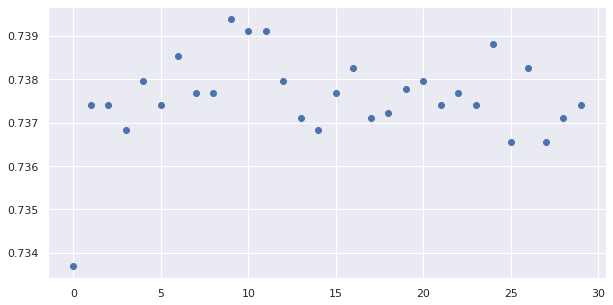

In [ ]:
#Model evaluation
visualize_training_results(result_model2)

In [ ]:
history_dict = result_model2.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [ ]:
#evaluate
print('Train loss & accuracy:' , model2.evaluate(train_generator))
print('\n')
print('Test loss & accuracy:' , model2.evaluate(test_generator))

111/111 [==============================] - 50s 448ms/step - loss: 0.5754 - accuracy: 0.7378
Train loss & accuracy: [0.5753867030143738, 0.7377928495407104]


36/36 [==============================] - 11s 283ms/step - loss: 0.5937 - accuracy: 0.7204
Test loss & accuracy: [0.5937239527702332, 0.7203832864761353]


## **Model 2: Prediction & Classification Report**

In [ ]:
#make prediction
pred = model2.predict_generator(test_generator, test_steps_per_epoch)
pred_classes = np.round(pred)
#define target
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("Model2:\n")
print("Confusion Matrix:\n", confusion_matrix(true_classes, pred_classes))
print("----------------------------------------------------")
print("Classification Report:\n", classification_report(true_classes,
                                                        pred_classes, target_names=class_labels))

Model2:

Confusion Matrix:
 [[  0 321]
 [  0 827]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

      normal       0.00      0.00      0.00       321
   pneumonia       0.72      1.00      0.84       827

    accuracy                           0.72      1148
   macro avg       0.36      0.50      0.42      1148
weighted avg       0.52      0.72      0.60      1148



## **Model 2: Confusion Matrix**

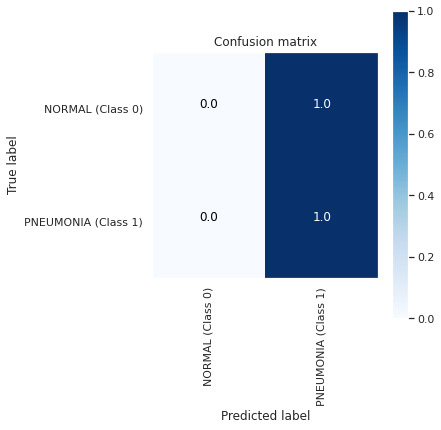

In [ ]:
#plot confusion matrix
cm=confusion_matrix(true_classes, pred_classes, normalize='true')



plot_confusion_matrix(cm, classes = ['NORMAL (Class 0)','PNEUMONIA (Class 1)'],
                      normalize = False)

## **Model 2: Interpretation**

Model 2 can detect pneumonia X-ray with recall of 100% and 72% accuracy.

Model 2 can detect normal X-ray with 0% recall and 0% of it are true normal X-ray images.

Model 2 has a train accuracy of 0.7378, validation accuracy 0.716 and test accuracy of 0.7204.



## **Model 3**

## **Model 3: Data Generator-No Data Augmentation**

In [ ]:
#Data generator
#No data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255)
                                   

train_generator = train_datagen.flow_from_dataframe(dataframe = train,
                                                    x_col = "image",
                                                    y_col = "target",
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = "binary")

val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator= val_datagen.flow_from_dataframe(dataframe = val,
                                              x_col = "image",
                                              y_col = "target",
                                              target_size = (150, 150),
                                              batch_size = 32,
                                              class_mode = "binary")


test_datagen = ImageDataGenerator(rescale = 1./255)

#sett shuffle = False for test set or else when making prediction later, 
# function .evaluate() and function .predict_classes() 
# will yield different accuracy score.
# when set to False, data is sorted in alphanumeric order while default 
# is set to True, which shuffles the data.
test_generator = test_datagen.flow_from_dataframe(dataframe = test,
                                                  x_col = "image",
                                                  y_col = "target",
                                                  target_size = (150, 150),
                                                  class_mode = "binary",
                                                  batch_size = 32, shuffle=False)

Found 3543 validated image filenames belonging to 2 classes.
Found 1162 validated image filenames belonging to 2 classes.
Found 1148 validated image filenames belonging to 2 classes.


In [ ]:
# counting the stepsize per epoch
train_steps_per_epoch = np.math.ceil(
    train_generator.samples / train_generator.batch_size)
val_steps_per_epoch = np.math.ceil(
    val_generator.samples / val_generator.batch_size)
test_steps_per_epoch = np.math.ceil(
    test_generator.samples / test_generator.batch_size)

## **Model 3: CNN Architecture**

Use 5 different conv layers with max pooling. Use 3 dense layers with 512, 128, 64 neurons and finally the output layer with one neuron.

A CNN architecture is composed of convolutional layer with ReLU, pooling layer, fully connected layer, and loss layer. I will Use for model 3: no data augmentation, no learning reducers, padding regularizers L2, all back of early stop. The optimizer is Adam.

The padding parameter has two values: valid or same. Valid means the input is not zero-padded, so the output of the convolution will be smaller than the dimensions of the original image. Same means the input will be zero-padded, so the convolution output can be the same size as the input.

For large datasets and deep networks, kernel regularization is a must. You can use either L1 or L2 regularization. If you detect signs of overfitting, consider using L2 regularization. Tune the amount of regularization, starting with values of 0.0001-0.001. For bias and activity, we recommend leaving at the default values for most scenarios.

I add callbacks to monitor a specific parameter of the model, in this case, val_acc. Since I use a validation set during training, I set save_best_only = True in ModelCheckpoint to specify that the model will only be saved when its performance on the validation set is best.

I also set patience = 10 for EarlyStopping, meaning that the model will stop training if it doesn't see any improvement in val_acc in 10 epochs.



In [ ]:
model3 = Sequential()
model3.add(Conv2D(16, (3, 3), activation='relu',padding='same',
                  input_shape=(150, 150, 3)))
                        
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(32, (3, 3), activation='relu',padding='same',
                  kernel_regularizer=regularizers.l2(0.01)))
                       
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu',padding='same'
                        ))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu',padding='same'
                        ))
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(256, (3, 3), activation='relu',padding='same'
                        ))
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.2))

model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(Dropout(0.7))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(1, activation='sigmoid'))

model3.summary()

# Creating model and compiling
model3.compile(optimizer='adam', loss='binary_crossentropy',
               metrics=['accuracy'])



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 18, 18, 128)      

I add callbacks to monitor a specific parameter of the model, in this case, val_acc. Since I use a validation set during training, I set save_best_only = True in ModelCheckpoint to specify that the model will only be saved when its performance on the validation set is best.

I also set patience = 10 for EarlyStopping, meaning that the model will stop training if it doesn't see any improvement in val_acc in 10 epochs.

In [ ]:
#define the callbacks
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 10,
                                min_delta=0.1, mode='min', verbose = 1),
                 ModelCheckpoint(filepath = 'model3.h5', monitor = 'val_loss',
                                 save_best_only = True, save_weights_only=True)]

## **Model 3: Fitting**

In [ ]:
# set random seed to 42 to is used to replicate the same result.
np.random.seed(42)
tf.random.set_seed(42)


start = datetime.datetime.now()
result_model3 = model3.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch, 
                              epochs=30, 
                              validation_data=val_generator, 
                              validation_steps=val_steps_per_epoch,
                               callbacks=early_stopping)


end = datetime.datetime.now()
elapsed = end - start
print('\n ---------Elapsed Time-----------')
print('Time to fit Model 3 is:\n {}'.format(elapsed))


Epoch 1/30
111/111 [==============================] - 54s 484ms/step - loss: 0.1242 - accuracy: 0.9588 - val_loss: 0.0922 - val_accuracy: 0.9699
Epoch 2/30
111/111 [==============================] - 53s 474ms/step - loss: 0.1030 - accuracy: 0.9647 - val_loss: 0.0938 - val_accuracy: 0.9690
Epoch 3/30
111/111 [==============================] - 53s 476ms/step - loss: 0.0872 - accuracy: 0.9729 - val_loss: 0.1076 - val_accuracy: 0.9716
Epoch 4/30
111/111 [==============================] - 53s 478ms/step - loss: 0.1046 - accuracy: 0.9670 - val_loss: 0.1037 - val_accuracy: 0.9630
Epoch 5/30
111/111 [==============================] - 53s 481ms/step - loss: 0.0758 - accuracy: 0.9757 - val_loss: 0.0911 - val_accuracy: 0.9707
Epoch 6/30
111/111 [==============================] - 54s 485ms/step - loss: 0.0804 - accuracy: 0.9754 - val_loss: 0.1341 - val_accuracy: 0.9630
Epoch 7/30
111/111 [==============================] - 54s 489ms/step - loss: 0.0646 - accuracy: 0.9814 - val_loss: 0.1060 - val_ac

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#save model
model_save_name = 'model3'
path = F"/content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/{model_save_name}" 
model3.save(path)

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/model3/assets


In [ ]:
#save model
model_save_name = 'model3.h5'
path = F"/content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/{model_save_name}" 
model3.save(path)

In [ ]:
# set random seed to 30 to is used to replicate the same result.
np.random.seed(30)
tf.random.set_seed(30)


start = datetime.datetime.now()
result_model3 = model3.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch, 
                              epochs=30, 
                              validation_data=val_generator, 
                              validation_steps=val_steps_per_epoch, 
                              callbacks=early_stopping)


end = datetime.datetime.now()
elapsed = end - start
print('\n ---------Elapsed Time-----------')
print('Time to fit Model 3 is:\n {}'.format(elapsed))


#save model
model3.save(
    "cnn_model3_NoDataAgumentation_adam_padding_dropout_regularizers_earlystopping.h5")

Epoch 1/30
111/111 [==============================] - 1202s 11s/step - loss: 0.7268 - accuracy: 0.7468 - val_loss: 0.4437 - val_accuracy: 0.7806
Epoch 2/30
111/111 [==============================] - 50s 452ms/step - loss: 0.4316 - accuracy: 0.7883 - val_loss: 0.2830 - val_accuracy: 0.9165
Epoch 3/30
111/111 [==============================] - 50s 449ms/step - loss: 0.3287 - accuracy: 0.8828 - val_loss: 0.1918 - val_accuracy: 0.9441
Epoch 4/30
111/111 [==============================] - 50s 448ms/step - loss: 0.2139 - accuracy: 0.9270 - val_loss: 0.1631 - val_accuracy: 0.9466
Epoch 5/30
111/111 [==============================] - 49s 444ms/step - loss: 0.1777 - accuracy: 0.9450 - val_loss: 0.1559 - val_accuracy: 0.9527
Epoch 6/30
111/111 [==============================] - 49s 443ms/step - loss: 0.1636 - accuracy: 0.9469 - val_loss: 0.0899 - val_accuracy: 0.9750
Epoch 7/30
111/111 [==============================] - 49s 444ms/step - loss: 0.1132 - accuracy: 0.9676 - val_loss: 0.0926 - val_ac

## **Model Evaluation**

## **Model 3: Visualization of loss and accuracy of training and validation data**

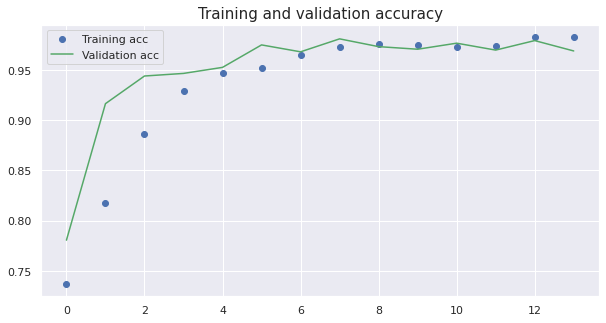

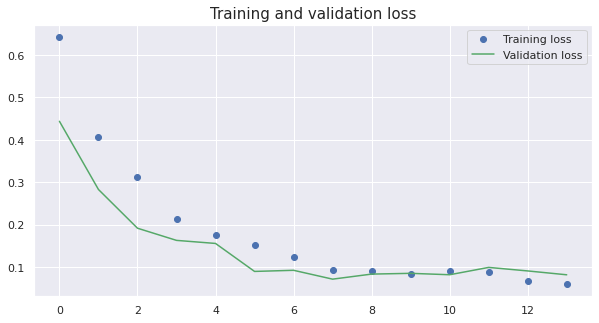

In [ ]:
# Visualization of ccuracy and loss in tarining and validation data
visualize_training_results(result_model3)

## **Model 3: Metrics**

In [ ]:
# Collecting model metrics

evaluation_result(model3,
                  'Model without data augmentation,optimizer_Adam_ padding, regularizers, dropout, callback')
 
    

{'Model': 'Model without data augmentation,optimizer_Adam_ padding, regularizers, dropout, callback',
 'Precision': 0.8481,
 'Recall': 0.9927,
 'Test Accuracy': 0.8667,
 'Test Loss': 0.9587,
 'Train Accuracy': 0.9949,
 'Train Loss': 0.0328,
 'Validation Accuracy': 0.969,
 'f1': 0.9148,
 'validation Loss': 0.082}

In [ ]:
results=evaluation_result(model3,
                          'Model without data augmentation,optimizer_Adam_ padding, regularizers, dropout, callback')
results_final = []
# appending the results of the new model
results_final.append(results)
#  results in dataframe
df_model_results = pd.DataFrame(results_final)
df_model_results

,Model,Train Accuracy,Train Loss,Validation Accuracy,validation Loss,Test Accuracy,Test Loss,Precision,Recall,f1
0,"Model without data augmentation,optimizer_Adam...",0.9949,0.0328,0.969,0.082,0.8667,0.9587,0.8481,0.9927,0.9148


In [ ]:
#evaluate
print('Train loss & accuracy:' , model3.evaluate(train_generator))
print('\n')
print('Test loss & accuracy:' , model3.evaluate(test_generator))

111/111 [==============================] - 37s 330ms/step - loss: 0.0328 - accuracy: 0.9949
Train loss & accuracy: [0.03277444839477539, 0.9949195384979248]


36/36 [==============================] - 10s 277ms/step - loss: 0.9587 - accuracy: 0.8667
Test loss & accuracy: [0.9587379097938538, 0.8667247295379639]


## **Model 3: Prediction & Classification Report**

In [ ]:
# get predictions on the val set
y_hat = model3.predict_classes(val_images)

print('Model: Model3', '\n', classification_report(
    val_labels, y_hat, target_names = ['NORMAL (Class 0)','PNEUMONIA (Class 1)'])) 

                                                  

Model: Model3 
                      precision    recall  f1-score   support

   NORMAL (Class 0)       0.96      0.95      0.95       330
PNEUMONIA (Class 1)       0.98      0.98      0.98       832

           accuracy                           0.97      1162
          macro avg       0.97      0.96      0.97      1162
       weighted avg       0.97      0.97      0.97      1162



In [ ]:
#make prediction on test data
pred = model3.predict_generator(test_generator, test_steps_per_epoch)
pred_classes = np.round(pred)
#define target
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("Model 3:\n")
print("Confusion Matrix:\n", confusion_matrix(true_classes, pred_classes))
print("----------------------------------------------------")
print("Classification Report:\n", classification_report(
    true_classes, pred_classes, target_names=class_labels))
                                                    

Baseline Model:

Confusion Matrix:
 [[193 128]
 [  6 821]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

      normal       0.97      0.60      0.74       321
   pneumonia       0.87      0.99      0.92       827

    accuracy                           0.88      1148
   macro avg       0.92      0.80      0.83      1148
weighted avg       0.89      0.88      0.87      1148



## **Model 3: Confusion Matrix**

In [ ]:
# confusion matrix for validation set

cm=confusion_matrix(val_labels, np.round(y_hat))
cm

array([[328,   2],
       [ 20, 812]])

In [ ]:
# true negative(tn), false positive(fp),
# false negative (fn), true positive(tp) for valiation data
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(328, 2, 20, 812)

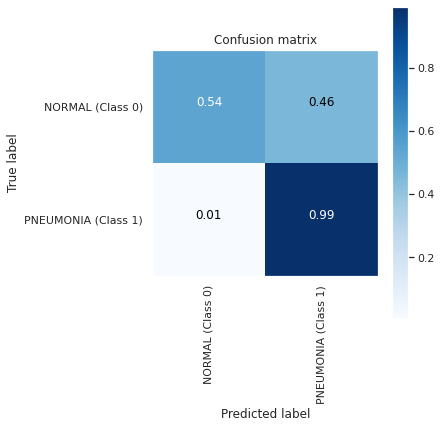

In [ ]:
#plot confusion matrix for test data
cm=confusion_matrix(true_classes, pred_classes, normalize='true')

plot_confusion_matrix(
    cm, classes = ['NORMAL (Class 0)','PNEUMONIA (Class 1)'], normalize = False)
                      

## **Model 3: Interpretation**

Model 3 can detect pneumonia X-ray with recall of 99% and 85% accuracy.

Model 3 can detect normal X-ray with 54% recall and 97% of it are true normal X-ray images.

Model 3 has a train accuracy of 0.9949, validation accuracy 0.969 and test accuracy of 0.8667.



# **Model 4**

## **Model 4: Data Generator-Data Augmenetation**

In [ ]:
#Data Augmentation

#augment train  dataset to prevent overfitting by increasing number of images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40, # randomly rotate imgaes
                                   width_shift_range = 0.2, # randomly shift images
                                   height_shift_range = 0.2, # randomly shift images
                                   shear_range = 0.2, # randomly shear angles
                                   zoom_range = 0.2, # randomly zoom images
                                   fill_mode = "constant")

train_generator = train_datagen.flow_from_dataframe(dataframe = train,
                                                    x_col = "image",
                                                    y_col = "target",
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = "binary")

val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator= val_datagen.flow_from_dataframe(dataframe = val,
                                              x_col = "image",
                                              y_col = "target",
                                              target_size = (150, 150),
                                              batch_size = 32, 
                                              class_mode = "binary")

# rescale test dataset without augmentation since real world data is not augmented
test_datagen = ImageDataGenerator(rescale = 1./255)

# set shuffle = False for test set or else when making prediction later,
# function .evaluate() and function .predict_classes() will yield different accuracy score.
#when set to False, data is sorted in alphanumeric order while default is set to True, which shuffles the data.
test_generator = test_datagen.flow_from_dataframe(dataframe = test,
                                                  x_col = "image",
                                                  y_col = "target",
                                                  target_size = (150, 150),
                                                  class_mode = "binary",
                                                  batch_size = 32, shuffle=False)

Found 3543 validated image filenames belonging to 2 classes.
Found 1162 validated image filenames belonging to 2 classes.
Found 1148 validated image filenames belonging to 2 classes.


In [ ]:
# counting the stepsize per epoch
train_steps_per_epoch = np.math.ceil(
    train_generator.samples / train_generator.batch_size)
val_steps_per_epoch = np.math.ceil(
    val_generator.samples / val_generator.batch_size)
test_steps_per_epoch = np.math.ceil(
    test_generator.samples / test_generator.batch_size)

In [ ]:
#define the callbacks
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 10, 
                                min_delta=0.1, mode='min', verbose = 1),
                 ModelCheckpoint(filepath = 'model4.h5', monitor = 'val_loss',
                                 save_best_only = True, save_weights_only=True)]

## **Model 4: CNN Architecture**

*   The cnn is composed of 2 conv layers with relu activation and 2 dense layers with 64 and 128 neurons respectively with sigmoid activation.
*   With data augmentation.

*   Compile the model with Adma optimizer and early stop.


In [ ]:
#initialize
model4 = Sequential()

#define model architecture
model4.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model4.add(MaxPooling2D((2, 2)))

model4.add(Conv2D(32, (3, 3), activation = 'relu'))
model4.add(MaxPooling2D((2, 2)))

#fully connected layer
model4.add(Flatten())
model4.add(Dense(64, activation = 'relu'))
model4.add(Dense(128, activation = 'relu'))

#one layer with sigmoid activation 
model4.add(Dense(1, activation = 'sigmoid'))

#compile
model4.compile(loss = 'binary_crossentropy',
                  optimizer = keras.optimizers.Adam(0.0001),
                  metrics = ['acc'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2654272   
_________________________________________________________________
dense_11 (Dense)             (None, 128)              

## **Model 4: Fitting**

In [ ]:
# set random seed to 42 to is used to replicate the same result.
np.random.seed(42)
tf.random.set_seed(42)


start = datetime.datetime.now()
result_model4 = model4.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch, 
                              epochs=30, 
                              validation_data=val_generator, 
                              validation_steps=val_steps_per_epoch,
                               callbacks=early_stopping)


end = datetime.datetime.now()
elapsed = end - start
print('\n ---------Elapsed Time-----------')
print('Time to fit Model 4 is:\n {}'.format(elapsed))



Epoch 1/30
111/111 [==============================] - 68s 606ms/step - loss: 0.5999 - acc: 0.7011 - val_loss: 0.5526 - val_acc: 0.7160
Epoch 2/30
111/111 [==============================] - 66s 596ms/step - loss: 0.5119 - acc: 0.7428 - val_loss: 0.3679 - val_acc: 0.8941
Epoch 3/30
111/111 [==============================] - 65s 587ms/step - loss: 0.3948 - acc: 0.8195 - val_loss: 0.3025 - val_acc: 0.8847
Epoch 4/30
111/111 [==============================] - 65s 589ms/step - loss: 0.3318 - acc: 0.8492 - val_loss: 0.3929 - val_acc: 0.8236
Epoch 5/30
111/111 [==============================] - 66s 593ms/step - loss: 0.2976 - acc: 0.8677 - val_loss: 0.4928 - val_acc: 0.7547
Epoch 6/30
111/111 [==============================] - 67s 605ms/step - loss: 0.2911 - acc: 0.8724 - val_loss: 0.5851 - val_acc: 0.6695
Epoch 7/30
111/111 [==============================] - 67s 605ms/step - loss: 0.3109 - acc: 0.8540 - val_loss: 0.4408 - val_acc: 0.7814
Epoch 8/30
111/111 [==============================] - 6

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#save model
model_save_name = 'model4'
path = F"/content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/{model_save_name}" 
model4.save(path)

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/model4/assets


In [ ]:
#save model
model_save_name = 'model4.h5'
path = F"/content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/{model_save_name}" 
model4.save(path)

## **Model Evaluation**

## **Model 4: Visualization of loss and accuracy of training and validation data**

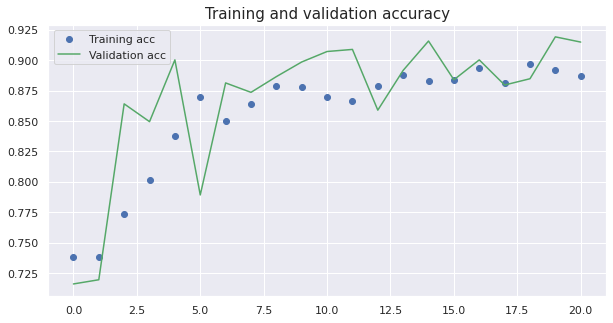

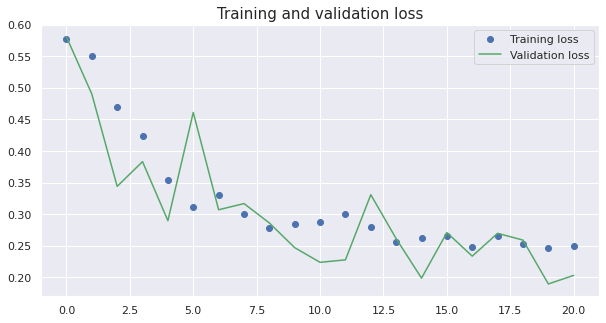

In [ ]:
# Visualization of ccuracy and loss in tarining and validation data

visualize_training_results(result_model4)

## **Model 4: Metrics**

In [ ]:
# Collecting model metrics

evaluation_result(model4, 'cnn_model4_DataAugmentation_Optimizer_Adam_callback')

{'Model': 'cnn_model4_DataAugmentation_Optimizer_Adam_callback',
 'Precision': 0.9444,
 'Recall': 0.8839,
 'Test Accuracy': 0.8789,
 'Test Loss': 0.2693,
 'Train Accuracy': 0.8919,
 'Train Loss': 0.2366,
 'Validation Accuracy': 0.9148,
 'f1': 0.9132,
 'validation Loss': 0.2031}

In [ ]:
results=evaluation_result(model4,
                          'cnn_model4_DataAugmentation_Optimizer_Adam_callback')
results_final = []
# appending the results of the new model
results_final.append(results)
#  results in dataframe
df_model_results = pd.DataFrame(results_final)
df_model_results

,Model,Train Accuracy,Train Loss,Validation Accuracy,validation Loss,Test Accuracy,Test Loss,Precision,Recall,f1
0,cnn_model4_DataAugmentation_Optimizer_Adam_cal...,0.8984,0.2325,0.9148,0.2031,0.8789,0.2693,0.9444,0.8839,0.9132


In [ ]:
#evaluate
print('Train loss & accuracy:' , model4.evaluate(train_generator))
print('\n')
print('Test loss & accuracy:' , model4.evaluate(test_generator))

111/111 [==============================] - 50s 451ms/step - loss: 0.2372 - acc: 0.8925
Train loss & accuracy: [0.23719115555286407, 0.8924640417098999]


36/36 [==============================] - 11s 286ms/step - loss: 0.2693 - acc: 0.8789
Test loss & accuracy: [0.26929807662963867, 0.8789198398590088]


## **Model 4:Prediction & Classification Report**

In [ ]:
# get predictions on the val set
y_hat = model4.predict_classes(val_images)

print('Model: Model4', '\n', classification_report(
    val_labels, y_hat, target_names = ['NORMAL (Class 0)','PNEUMONIA (Class 1)']))

Model: Model4 
                      precision    recall  f1-score   support

   NORMAL (Class 0)       0.67      0.98      0.80       330
PNEUMONIA (Class 1)       0.99      0.81      0.89       832

           accuracy                           0.86      1162
          macro avg       0.83      0.90      0.84      1162
       weighted avg       0.90      0.86      0.86      1162



In [ ]:
#make prediction on test data
pred = model4.predict_generator(test_generator, test_steps_per_epoch)
pred_classes = np.round(pred)
#define target
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("Model4:\n")
print("Confusion Matrix:\n", confusion_matrix(true_classes, pred_classes))
print("----------------------------------------------------")
print("Classification Report:\n", classification_report(
    true_classes,  pred_classes, target_names=class_labels))
                                                       

Model2:

Confusion Matrix:
 [[278  43]
 [ 96 731]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

      normal       0.74      0.87      0.80       321
   pneumonia       0.94      0.88      0.91       827

    accuracy                           0.88      1148
   macro avg       0.84      0.87      0.86      1148
weighted avg       0.89      0.88      0.88      1148



## **Model 4: Confusion Matrix**

In [ ]:
# confusion matrix for validation set

cm=confusion_matrix(val_labels, np.round(y_hat))
cm

array([[323,   7],
       [157, 675]])

In [ ]:
# true negative(tn), false positive(fp), 
# false negative (fn), true positive(tp) for valiation data
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(323, 7, 157, 675)

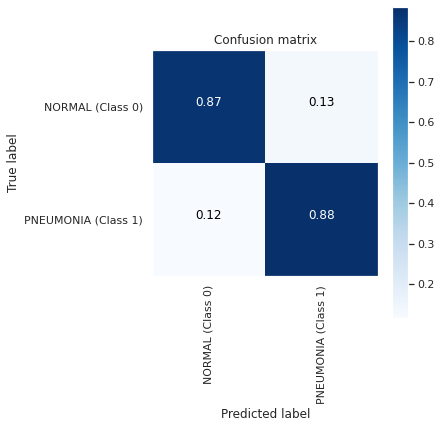

In [ ]:
# plot confusion matrix
cm=confusion_matrix(true_classes, pred_classes, normalize='true')



plot_confusion_matrix(
    cm, classes = ['NORMAL (Class 0)','PNEUMONIA (Class 1)'], normalize = False)

## **Model 4: Interpretation**

Model 4 can detect pneumonia X-ray with recall of 88% and 94% accuracy.

Model 4 can detect normal X-ray with 87% recall and 74% of it are true normal X-ray images.

Model 4 has a train accuracy of 0.8984, validation accuracy 0.9148 and test accuracy of 0.8789.


## **Model 5**

## **Model 5: Data Generator-No Data Augmentation**

In [ ]:
#Data generator
# No data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255)
                                   

train_generator = train_datagen.flow_from_dataframe(dataframe = train,
                                                    x_col = "image",
                                                    y_col = "target",
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = "binary")

val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator= val_datagen.flow_from_dataframe(dataframe = val,
                                              x_col = "image",
                                              y_col = "target",
                                              target_size = (150, 150),
                                              batch_size = 32,
                                              class_mode = "binary")


test_datagen = ImageDataGenerator(rescale = 1./255)

# set shuffle = False for test set or else when making prediction later,
# function .evaluate() and function .predict_classes() will yield different accuracy score.
#when set to False, data is sorted in alphanumeric order while default is set to True, which shuffles the data.
test_generator = test_datagen.flow_from_dataframe(dataframe = test,
                                                  x_col = "image",
                                                  y_col = "target",
                                                  target_size = (150, 150),
                                                  class_mode = "binary",
                                                  batch_size = 32, shuffle=False)

Found 3543 validated image filenames belonging to 2 classes.
Found 1162 validated image filenames belonging to 2 classes.
Found 1148 validated image filenames belonging to 2 classes.


In [ ]:
# counting the stepsize per epoch
train_steps_per_epoch = np.math.ceil(
    train_generator.samples / train_generator.batch_size)
val_steps_per_epoch = np.math.ceil(
    val_generator.samples / val_generator.batch_size)
test_steps_per_epoch = np.math.ceil(
    test_generator.samples / test_generator.batch_size)

In [ ]:
#define the callbacks
early_stopping = [EarlyStopping(monitor = 'val_loss',patience = 10,
                                min_delta=0.1, mode='min', verbose = 1),
                  ModelCheckpoint(filepath = 'model5.h5', monitor = 'val_loss',
                                 save_best_only = True, save_weights_only=True)]
                                 
                     

## **Model 5: CNN  Architecture**

*   The cnn is composed of 2 conv layers with relu activation and 2 dense layers with 64 and 128 neurons respectively with sigmoid activation

*   With no data augmentation.

*   Compile the model with Adma optimizer and early stop.


In [ ]:
#initialize
model5 = Sequential()

#define model architecture
model5.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(32, (3, 3), activation = 'relu'))
model5.add(MaxPooling2D((2, 2)))

#fully connected layer
model5.add(Flatten())
model5.add(Dense(64, activation = 'relu'))
model5.add(Dense(128, activation = 'relu'))

#one layer with sigmoid activation 
model5.add(Dense(1, activation = 'sigmoid'))

#compile
model5.compile(loss = 'binary_crossentropy',
                  optimizer = keras.optimizers.Adam(0.0001),
                  metrics = ['acc'])
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                2654272   
_________________________________________________________________
dense_17 (Dense)             (None, 128)              

## **Model 5: Fitting**

In [ ]:
# set random seed to 42 to is used to replicate the same result.
np.random.seed(42)
tf.random.set_seed(42)


start = datetime.datetime.now()
result_model5 = model5.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch, 
                              epochs=30, 
                              validation_data=val_generator, 
                              validation_steps=val_steps_per_epoch,
                              callbacks=early_stopping)


end = datetime.datetime.now()
elapsed = end - start
print('\n ---------Elapsed Time-----------')
print('Time to fit Model 5 is:\n {}'.format(elapsed))



Epoch 1/30
111/111 [==============================] - 54s 483ms/step - loss: 0.5373 - acc: 0.7362 - val_loss: 0.2161 - val_acc: 0.9174
Epoch 2/30
111/111 [==============================] - 54s 483ms/step - loss: 0.1902 - acc: 0.9338 - val_loss: 0.1419 - val_acc: 0.9492
Epoch 3/30
111/111 [==============================] - 54s 484ms/step - loss: 0.1063 - acc: 0.9648 - val_loss: 0.1477 - val_acc: 0.9466
Epoch 4/30
111/111 [==============================] - 53s 481ms/step - loss: 0.0996 - acc: 0.9612 - val_loss: 0.0821 - val_acc: 0.9673
Epoch 5/30
111/111 [==============================] - 53s 480ms/step - loss: 0.0806 - acc: 0.9735 - val_loss: 0.0787 - val_acc: 0.9682
Epoch 6/30
111/111 [==============================] - 52s 469ms/step - loss: 0.0794 - acc: 0.9676 - val_loss: 0.0732 - val_acc: 0.9716
Epoch 7/30
111/111 [==============================] - 52s 468ms/step - loss: 0.0596 - acc: 0.9810 - val_loss: 0.0990 - val_acc: 0.9621
Epoch 8/30
111/111 [==============================] - 5

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#save model
model_save_name = 'model5'
path = F"/content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/{model_save_name}" 
model5.save(path)

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/model5/assets


In [ ]:
#save model
model_save_name = 'model5.h5'
path = F"/content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/{model_save_name}" 
model5.save(path)

## **Model Evaluation**

## **Model 5: Visualization of loss and accuracy of training and validation data**



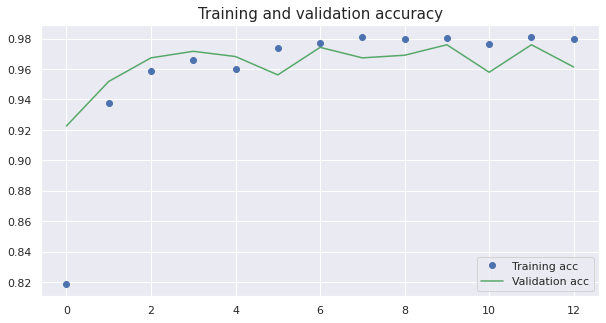

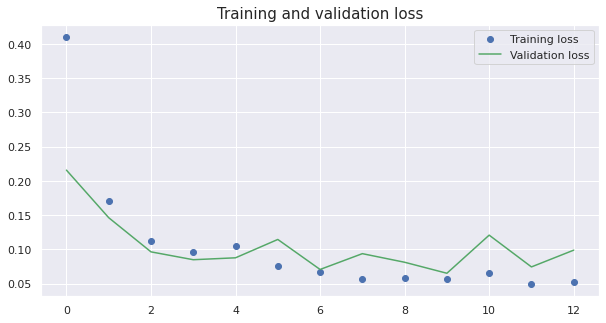

In [ ]:
# Visualization of ccuracy and loss in tarining and validation data

visualize_training_results(result_model5)

## **Model 5: Metrics**

In [ ]:
# Collecting model metrics

evaluation_result(model5, 
                  'cnn_model5_NODataAugmentation_Optimizer_Adam_callback')

{'Model': 'cnn_model5_NODataAugmentation_Optimizer_Adam_callback',
 'Precision': 0.8239,
 'Recall': 0.9903,
 'Test Accuracy': 0.8406,
 'Test Loss': 0.6205,
 'Train Accuracy': 0.9862,
 'Train Loss': 0.0429,
 'Validation Accuracy': 0.9613,
 'f1': 0.8995,
 'validation Loss': 0.099}

In [ ]:
results=evaluation_result(model5,
                          'cnn_model5_NODataAugmentation_Optimizer_Adam_callback')
results_final = []
# appending the results of the new model
results_final.append(results)
#  results in dataframe
df_model_results = pd.DataFrame(results_final)
df_model_results

,Model,Train Accuracy,Train Loss,Validation Accuracy,validation Loss,Test Accuracy,Test Loss,Precision,Recall,f1
0,cnn_model5_NODataAugmentation_Optimizer_Adam_c...,0.9862,0.0429,0.9613,0.099,0.8406,0.6205,0.8239,0.9903,0.8995


## **Model 5: Prediction & Classification Report**

In [ ]:
# get predictions on the val set
y_hat = model5.predict_classes(val_images)

print('Model: Model5', '\n', classification_report(
    val_labels, y_hat, target_names = ['NORMAL (Class 0)','PNEUMONIA (Class 1)']))

Model: Model5 
                      precision    recall  f1-score   support

   NORMAL (Class 0)       0.96      0.96      0.96       330
PNEUMONIA (Class 1)       0.98      0.99      0.98       832

           accuracy                           0.98      1162
          macro avg       0.97      0.97      0.97      1162
       weighted avg       0.98      0.98      0.98      1162



In [ ]:
#make prediction on test data
pred = model5.predict_generator(test_generator, test_steps_per_epoch)
pred_classes = np.round(pred)
#define target
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print(" Model 5:\n")
print("Confusion Matrix:\n", confusion_matrix(true_classes, pred_classes))
print("----------------------------------------------------")
print("Classification Report:\n", classification_report(
    true_classes, pred_classes, target_names=class_labels))

Baseline Model:

Confusion Matrix:
 [[146 175]
 [  8 819]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

      normal       0.95      0.45      0.61       321
   pneumonia       0.82      0.99      0.90       827

    accuracy                           0.84      1148
   macro avg       0.89      0.72      0.76      1148
weighted avg       0.86      0.84      0.82      1148



## **Model 5: Confusion Matrix**

In [ ]:
# confusion matrix for validation set

cm=confusion_matrix(val_labels, np.round(y_hat))
cm

array([[317,  13],
       [ 12, 820]])

In [ ]:
# true negative(tn), false positive(fp),
# false negative (fn), true positive(tp) for valiation data
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(317, 13, 12, 820)

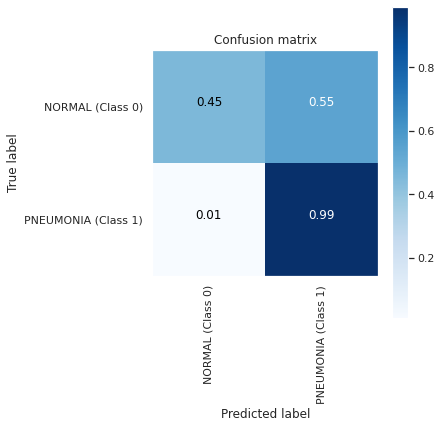

In [ ]:
#plot confusion matrix for test data
cm=confusion_matrix(true_classes, pred_classes, normalize='true')

plot_confusion_matrix(
    cm, classes = ['NORMAL (Class 0)','PNEUMONIA (Class 1)'], normalize = False)
                      

# **Model 5: Interpretation**

Model 5 can detect pneumonia X-ray with recall of 99% and 82% accuracy.

Model 5 can detect normal X-ray with 45% recall and 95% of it are true normal X-ray images.

Model 5 has a train accuracy of 0.9794, validation accuracy 0.9613 and validation accuracy of 0.9527.


## **Model 6**

## **Model 6: Data Generator-Data Augmentation**



In [ ]:
#Data Augmentation

#augment train  dataset to prevent overfitting by increasing number of images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40, # randomly rotate imgaes
                                   width_shift_range = 0.2, # randomly shift images
                                   height_shift_range = 0.2, # randomly shift images
                                   shear_range = 0.2, # randomly shear angles
                                   zoom_range = 0.2, # randomly zoom images
                                   fill_mode = "constant")

train_generator = train_datagen.flow_from_dataframe(dataframe = train,
                                                    x_col = "image",
                                                    y_col = "target",
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = "binary")

val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator= val_datagen.flow_from_dataframe(dataframe = val,
                                              x_col = "image",
                                              y_col = "target",
                                              target_size = (150, 150),
                                              batch_size = 1,
                                              class_mode = "binary")

# rescale test dataset without augmentation since real world data is not augmented
test_datagen = ImageDataGenerator(rescale = 1./255)

# set shuffle = False for test set or else when making prediction later,
# function .evaluate() and function .predict_classes() will yield 
# different accuracy score.
# when set to False, data is sorted in alphanumeric order while default
# is set to True, which shuffles the data.
test_generator = test_datagen.flow_from_dataframe(dataframe = test,
                                                  x_col = "image",
                                                  y_col = "target",
                                                  target_size = (150, 150),
                                                  class_mode = "binary",
                                                  batch_size = 32, shuffle=False)

Found 3543 validated image filenames belonging to 2 classes.
Found 1162 validated image filenames belonging to 2 classes.
Found 1148 validated image filenames belonging to 2 classes.


In [ ]:
# counting the stepsize per epoch
train_steps_per_epoch = np.math.ceil(
    train_generator.samples / train_generator.batch_size)
val_steps_per_epoch = np.math.ceil(
    val_generator.samples / val_generator.batch_size)
test_steps_per_epoch = np.math.ceil(
    test_generator.samples / test_generator.batch_size)

## **Model 6: CNN Architecture**

This CNN model is composed of:

1)  5 conv layers with padding, relu activation, kernel regularizersl2 &l1 , bias regularizers l1 & l2. 

2) With Data Augmentaton.

3) 3 dense layers with 512, 128 and 64 neurons respectively.



Weight regularization provides an approach to reduce the overfitting of a deep learning neural network model on the training data and improve the performance of the model on new data, such as the holdout test set.

There are multiple types of weight regularization, such as L1 and L2 vector norms, and each requires a hyperparameter that must be configured.

Three different regularizer instances are provided; they are:

L1: Sum of the absolute weights.
L2: Sum of the squared weights.
L1L2: Sum of the absolute and the squared weights.
The regularizers are provided under keras.regularizers and have the names l1, l2 and l1_l2. Each takes the regularizer hyperparameter as an argument.
By default, no regularizer is used in any layers.

A weight regularizer can be added to each layer when the layer is defined in a Keras model.

This is achieved by setting the kernel_regularizer argument on each layer. A separate regularizer can also be used for the bias via the bias_regularizer argument, although this is less often used.

In [ ]:
model6 = Sequential()

model6.add(Conv2D(16, (7, 7), padding='same', activation='relu',
                  kernel_regularizer=l1_l2(l1=0.01, l2=0.01),
                  bias_regularizer=l1_l2(l1=0.01, l2=0.01), 
                  input_shape=(150, 150, 3)))
model6.add(MaxPooling2D(pool_size = (3, 3)))

model6.add(Conv2D(32, (5, 5), padding='same',
                  activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01),
                  bias_regularizer=l1_l2(l1=0.01, l2=0.01)))
model6.add(MaxPooling2D(pool_size = (3, 3)))

model6.add(Conv2D(64, (3, 3), padding='same', activation='relu',
                  kernel_regularizer=l1_l2(l1=0.01, l2=0.01),
                  bias_regularizer=l1_l2(l1=0.01, l2=0.01)))
model6.add(MaxPooling2D(pool_size = (3, 3)))

model6.add(Conv2D(128, (3, 3), padding='same', activation='relu',
                  kernel_regularizer=l1_l2(l1=0.01, l2=0.01),
                  bias_regularizer=l1_l2(l1=0.01, l2=0.01)))
model6.add(MaxPooling2D(pool_size = (2, 2)))

model6.add(Conv2D(256, (3, 3), padding='same', activation='relu',
                  kernel_regularizer=l1_l2(l1=0.01, l2=0.01),
                  bias_regularizer=l1_l2(l1=0.01, l2=0.01)))
model6.add(MaxPooling2D(pool_size = (2, 2)))



model6.add(Flatten())

model6.add(Dense(512, activation='relu'))

model6.add(Dense(128, activation='relu'))

model6.add(Dense(64, activation='relu'))

model6.add(Dense(1, activation='sigmoid'))



In [ ]:
# Creating model and compiling
#compile
model6.compile(loss = 'binary_crossentropy',
                  optimizer = keras.optimizers.Adam(0.0001), metrics = ['acc'])
                 
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 150, 150, 16)      2368      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 50, 50, 32)        12832     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 5, 5, 128)        

In [ ]:
#define the callbacks
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 10,
                                min_delta=0.1, mode='min', verbose = 1),
                                
                 ModelCheckpoint(filepath = 'model6.h5', monitor = 'val_loss', 
                                 save_best_only = True, save_weights_only=True)]

## **Model 6: Fitting**

In [ ]:
# set random seed to 30 to is used to replicate the same result.
np.random.seed(30)
tf.random.set_seed(30)


start = datetime.datetime.now()
result_model6 = model6.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch, 
                              epochs=30, 
                              validation_data=val_generator, 
                              validation_steps=val_steps_per_epoch,
                               callbacks=early_stopping)


end = datetime.datetime.now()
elapsed = end - start
print('\n ---------Elapsed Time-----------')
print('Time to fit Model 6 is:\n {}'.format(elapsed))


#save model
model6.save(
    "cnn_model6_DataAugmentation_Optimizer_Adam_callback_regulizers_l1_l2")

Epoch 1/30
111/111 [==============================] - 61s 537ms/step - loss: 89.2224 - acc: 0.7269 - val_loss: 59.4601 - val_acc: 0.7160
Epoch 2/30
111/111 [==============================] - 59s 536ms/step - loss: 51.4027 - acc: 0.7338 - val_loss: 30.4071 - val_acc: 0.7160
Epoch 3/30
111/111 [==============================] - 59s 535ms/step - loss: 25.1426 - acc: 0.7377 - val_loss: 12.4500 - val_acc: 0.7160
Epoch 4/30
111/111 [==============================] - 59s 536ms/step - loss: 9.8505 - acc: 0.7432 - val_loss: 4.8979 - val_acc: 0.7160
Epoch 5/30
111/111 [==============================] - 59s 536ms/step - loss: 4.0526 - acc: 0.7401 - val_loss: 2.1621 - val_acc: 0.7160
Epoch 6/30
111/111 [==============================] - 59s 536ms/step - loss: 1.8075 - acc: 0.7356 - val_loss: 1.1516 - val_acc: 0.7160
Epoch 7/30
111/111 [==============================] - 59s 535ms/step - loss: 1.0041 - acc: 0.7366 - val_loss: 0.7584 - val_acc: 0.7160
Epoch 8/30
111/111 [=============================

In [ ]:
#save model
model6.save(
    "cnn_model6_DataAugmentation_Optimizer_Adam_callback_regulizersl1_l2.h5")

## **Model Evaluation**

## **Model 6: Visualization of loss and accuracy of training and validation data**

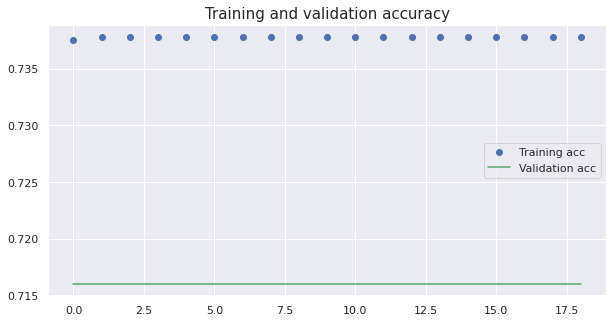

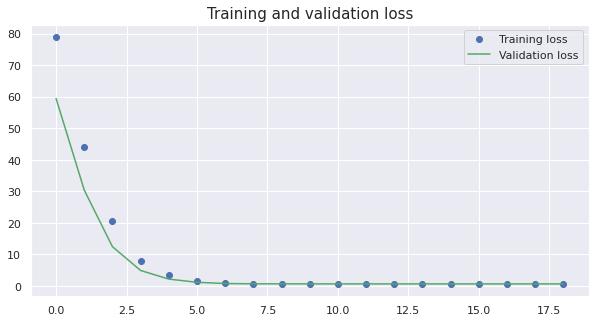

In [ ]:
# Visualization of ccuracy and loss in tarining and validation data

visualize_training_results(result_model6)

## **Model 6: Metrics**

In [ ]:
# Collecting model metrics

evaluation_result(model6, 
                  'cnn_model6_DataAugmentation_Optimizer_Adam_callback_regulizersl1_l2')

{'Model': 'cnn_model6_DataAugmentation_Optimizer_Adam_callback_regulizersl1_l2',
 'Precision': 0.7204,
 'Recall': 1.0,
 'Test Accuracy': 0.7204,
 'Test Loss': 0.6419,
 'Train Accuracy': 0.7378,
 'Train Loss': 0.624,
 'Validation Accuracy': 0.716,
 'f1': 0.8375,
 'validation Loss': 0.6464}

In [ ]:
results=evaluation_result(model6, 
                          'cnn_model6_DataAugmentation_Optimizer_Adam_callback_regulizersl1_l2')
results_final = []
# appending the results of the new model
results_final.append(results)
#  results in dataframe
df_model_results = pd.DataFrame(results_final)
df_model_results

,Model,Train Accuracy,Train Loss,Validation Accuracy,validation Loss,Test Accuracy,Test Loss,Precision,Recall,f1
0,cnn_model6_DataAugmentation_Optimizer_Adam_cal...,0.7378,0.624,0.716,0.6464,0.7204,0.6419,0.7204,1.0,0.8375


In [ ]:
#evaluate
print('Train loss & accuracy:' , model6.evaluate(train_generator))
print('\n')
print('Test loss & accuracy:' , model6.evaluate(test_generator))

111/111 [==============================] - 47s 426ms/step - loss: 0.6240 - acc: 0.7378
Train loss & accuracy: [0.624018669128418, 0.7377928495407104]


36/36 [==============================] - 10s 258ms/step - loss: 0.6419 - acc: 0.7204
Test loss & accuracy: [0.6418837904930115, 0.7203832864761353]


## **Model 6:  Prediction & Classification Report**

In [ ]:
#make prediction on test data
pred = model6.predict_generator(test_generator, test_steps_per_epoch)
pred_classes = np.round(pred)
#define target
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("Baseline Model:\n")
print("Confusion Matrix:\n", confusion_matrix(true_classes, pred_classes))
print("----------------------------------------------------")
print("Classification Report:\n", classification_report(
    true_classes, pred_classes, target_names=class_labels))

Baseline Model:

Confusion Matrix:
 [[  0 321]
 [  0 827]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

      normal       0.00      0.00      0.00       321
   pneumonia       0.72      1.00      0.84       827

    accuracy                           0.72      1148
   macro avg       0.36      0.50      0.42      1148
weighted avg       0.52      0.72      0.60      1148



## **Model 6: Confusion Matrix**

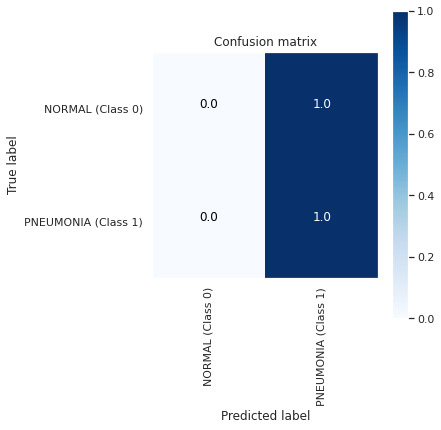

In [ ]:
#plot confusion matrix for test data
cm=confusion_matrix(true_classes, pred_classes, normalize='true')

plot_confusion_matrix(
    cm, classes = ['NORMAL (Class 0)','PNEUMONIA (Class 1)'], normalize = False)

# **Model 6: Interpretation**

Model 6 can detect pneumonia X-ray with recall of 100% and 72% accuracy.

Model 6 can detect normal X-ray with 0% recall and 0% of it are true normal X-ray images.

Model 6 has a train accuracy of 0.7378, validation accuracy 0.716 and test accuracy of 0.7204.

Model 6 is not reliable for pneumonia diagnosis. Model 6 can not be used.

## **Model 7**

## **Model 7: Data Generator-Data Augmentation**

In [ ]:
#Data Augmentation

#augment train  dataset to prevent overfitting by increasing number of images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40, # randomly rotate imgaes
                                   width_shift_range = 0.2, # randomly shift images
                                   height_shift_range = 0.2, # randomly shift images
                                   shear_range = 0.2, # randomly shear angles
                                   zoom_range = 0.2, # randomly zoom images
                                   fill_mode = "constant")

train_generator = train_datagen.flow_from_dataframe(dataframe = train,
                                                    x_col = "image",
                                                    y_col = "target",
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = "binary")

val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator= val_datagen.flow_from_dataframe(dataframe = val,
                                              x_col = "image",
                                              y_col = "target",
                                              target_size = (150, 150),
                                              batch_size = 32,
                                              class_mode = "binary")

# rescale test dataset without augmentation since real world data is not augmented
test_datagen = ImageDataGenerator(rescale = 1./255)

# set shuffle = False for test set or else when making prediction later,
# function .evaluate() and function .predict_classes()
# will yield different accuracy score.
# when set to False, data is sorted in alphanumeric order while
# default is set to True, which shuffles the data.
test_generator = test_datagen.flow_from_dataframe(dataframe = test,
                                                  x_col = "image",
                                                  y_col = "target",
                                                  target_size = (150, 150),
                                                  class_mode = "binary",
                                                  batch_size = 32, shuffle=False)

Found 3543 validated image filenames belonging to 2 classes.
Found 1162 validated image filenames belonging to 2 classes.
Found 1148 validated image filenames belonging to 2 classes.


In [ ]:
# counting the stepsize per epoch
train_steps_per_epoch = np.math.ceil(train_generator.samples / train_generator.batch_size)
val_steps_per_epoch = np.math.ceil(val_generator.samples / val_generator.batch_size)
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

## **Model 7: CNN Architecture**

1)define a function to set the neural network

    
2) create the cnn  model

3) set the input shape as the previous images

4) 1st convolution layer, padding is valid by default,
     kernel_regularizer: Regularizer function applied to the kernel weights matrix.


5) activation function as relu


6) apply pooling function, same padding is valid by default

    
7) 2nd convolution layer, same as the first one

    
8) 3rd convolution layer same as last one

9) flatten and hidden layer: flattens the input. Does not affect the batch size.
  

10) add 3 dense  neural network layer with 512, 128 , 64 neurons respectively. Each of these layers has kernel_regularizer: Regularizer function applied to the kernel weights matrix.

    
11) output layer

12)compiling with optimizer of Adam






In [ ]:
#define the callbacks
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 10,
                                min_delta=0.1, mode='min', verbose = 1),
                 ModelCheckpoint(filepath = 'model7.h5', monitor = 'val_loss',
                                 save_best_only = True, save_weights_only=True)]

In [ ]:
 # create the cnn  model
model7 = Sequential()
 # 1st convolution layer, padding is valid by default, set the input shape as the previous images, kernel_regularizer: Regularizer function applied to the kernel weights matrix,  activation function as relu
model7.add(Conv2D(135, (7, 7), padding='valid', activation='relu',
                  kernel_regularizer=regularizers.l2(0.01), 
                  input_shape=(150, 150, 3)))
# apply pooling function, same padding is valid by default
model7.add(MaxPooling2D(pool_size = (3, 3), padding='valid'))

# 2nd convolution layer, same as the first one
model7.add(Conv2D(60, (5, 5), padding='valid', activation='relu',
                  kernel_regularizer=regularizers.l2(0.01)))
model7.add(MaxPooling2D(pool_size = (3, 3), padding='valid'))


  # 3rd convolution layer same as last one
model7.add(Conv2D(35, (3, 3), padding='valid', activation='relu',
                  kernel_regularizer=regularizers.l2(0.01)))
model7.add(MaxPooling2D(pool_size = (2, 2), padding="valid"))




# flatten and hidden layer
model7.add(Flatten())
# add a 3 dense neural network layer
# kernel_regularizer: Regularizer function applied to the kernel weights matrix.
model7.add(Dense(512, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))


model7.add(Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

model7.add(Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))

# output layer
model7.add(Dense(1, activation='sigmoid'))

# Creating model and compiling
#compile
model7.compile(loss = 'binary_crossentropy',
                  optimizer = keras.optimizers.Adam(0.0001), metrics = ['acc'])
                 
model7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 144, 144, 135)     19980     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 48, 48, 135)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 44, 44, 60)        202560    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 60)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 12, 12, 35)        18935     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 6, 6, 35)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1260)             

## **Model 7: Fitting**

In [ ]:
# set random seed to 42 to is used to replicate the same result.
np.random.seed(42)
tf.random.set_seed(42)


start = datetime.datetime.now()
result_model7 = model7.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch, 
                              epochs=30, 
                              validation_data=val_generator, 
                              validation_steps=val_steps_per_epoch,
                               callbacks=early_stopping)


end = datetime.datetime.now()
elapsed = end - start
print('\n ---------Elapsed Time-----------')
print('Time to fit Model 7 is:\n {}'.format(elapsed))



Epoch 1/30
111/111 [==============================] - 68s 600ms/step - loss: 10.8329 - acc: 0.7258 - val_loss: 7.7191 - val_acc: 0.7160
Epoch 2/30
111/111 [==============================] - 66s 598ms/step - loss: 6.9683 - acc: 0.7390 - val_loss: 5.1703 - val_acc: 0.7160
Epoch 3/30
111/111 [==============================] - 66s 592ms/step - loss: 4.7104 - acc: 0.7417 - val_loss: 3.6045 - val_acc: 0.8503
Epoch 4/30
111/111 [==============================] - 65s 585ms/step - loss: 3.3077 - acc: 0.7645 - val_loss: 2.5445 - val_acc: 0.8296
Epoch 5/30
111/111 [==============================] - 64s 578ms/step - loss: 2.4340 - acc: 0.8130 - val_loss: 1.9738 - val_acc: 0.8640
Epoch 6/30
111/111 [==============================] - 65s 586ms/step - loss: 1.9561 - acc: 0.8205 - val_loss: 1.7026 - val_acc: 0.8279
Epoch 7/30
111/111 [==============================] - 67s 607ms/step - loss: 1.6350 - acc: 0.8385 - val_loss: 1.4254 - val_acc: 0.8520
Epoch 8/30
111/111 [==============================] - 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#save model
model_save_name = 'model7'
path = F"/content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/{model_save_name}" 
model7.save(path)

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/model7/assets


In [ ]:
#save model
model_save_name = 'model7.h5'
path = F"/content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/{model_save_name}" 
model7.save(path)

## **Model 7: Data Evaluation**

## **Model 7: Visualization of Loss  and Accuracy of Training and Validation Data**

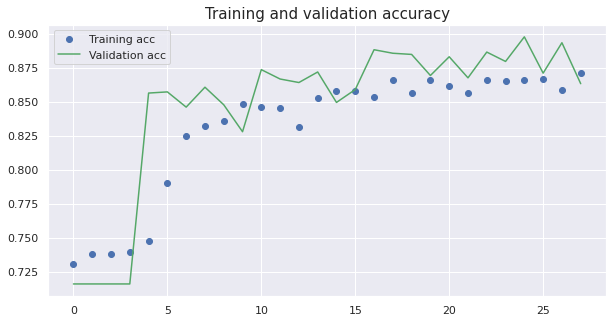

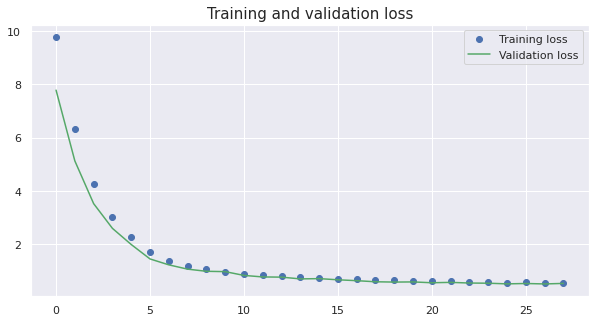

In [ ]:
visualize_training_results(result_model7)

## **Model 7: Metrics**

In [ ]:
# Collecting model metrics

evaluation_result(model7,
                  'cnn_model7_DataAugmentation_Optimizer_Adam_callback_regulizers_l2')

{'Model': 'cnn_model7_DataAugmentation_Optimizer_Adam_callback_regulizers_l2',
 'Precision': 0.8497,
 'Recall': 0.9637,
 'Test Accuracy': 0.851,
 'Test Loss': 0.601,
 'Train Accuracy': 0.8631,
 'Train Loss': 0.5448,
 'Validation Accuracy': 0.8632,
 'f1': 0.9031,
 'validation Loss': 0.5367}

In [ ]:
results=evaluation_result(model7,
                          'cnn_model7_DataAugmentation_Optimizer_Adam_callback_regulizers_l2')
results_final = []
# appending the results of the new model
results_final.append(results)
#  results in dataframe
df_model_results = pd.DataFrame(results_final)
df_model_results

,Model,Train Accuracy,Train Loss,Validation Accuracy,validation Loss,Test Accuracy,Test Loss,Precision,Recall,f1
0,cnn_model7_DataAugmentation_Optimizer_Adam_cal...,0.8634,0.5436,0.8632,0.5367,0.851,0.601,0.8497,0.9637,0.9031


In [ ]:
#evaluate
print('Train loss & accuracy:' , model7.evaluate(train_generator))
print('\n')
print('Test loss & accuracy:' , model7.evaluate(test_generator))

111/111 [==============================] - 47s 426ms/step - loss: 0.5491 - acc: 0.8645
Train loss & accuracy: [0.549105703830719, 0.8645215630531311]


36/36 [==============================] - 10s 262ms/step - loss: 0.6010 - acc: 0.8510
Test loss & accuracy: [0.6010298132896423, 0.8510453104972839]


## **Model 7:  Prediction & Classification Report**

In [ ]:
# get predictions on the val set
y_hat = model7.predict_classes(val_images)

print('Model: Model7', '\n', classification_report(
    val_labels, y_hat, target_names = ['NORMAL (Class 0)','PNEUMONIA (Class 1)']))

Model: Model7 
                      precision    recall  f1-score   support

   NORMAL (Class 0)       0.84      0.83      0.84       330
PNEUMONIA (Class 1)       0.93      0.94      0.94       832

           accuracy                           0.91      1162
          macro avg       0.89      0.88      0.89      1162
       weighted avg       0.91      0.91      0.91      1162



In [ ]:
#make prediction on test data
pred = model7.predict_generator(test_generator, test_steps_per_epoch)
pred_classes = np.round(pred)
#define target
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("Baseline Model:\n")
print("Confusion Matrix:\n", confusion_matrix(true_classes, pred_classes))
print("----------------------------------------------------")
print("Classification Report:\n", classification_report(
    true_classes, pred_classes, target_names=class_labels))

Baseline Model:

Confusion Matrix:
 [[180 141]
 [ 30 797]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

      normal       0.86      0.56      0.68       321
   pneumonia       0.85      0.96      0.90       827

    accuracy                           0.85      1148
   macro avg       0.85      0.76      0.79      1148
weighted avg       0.85      0.85      0.84      1148



## **Model 7: Confusion Matrix**

In [ ]:
# confusion matrix for validation set

cm=confusion_matrix(val_labels, np.round(y_hat))
cm

array([[274,  56],
       [ 51, 781]])

In [ ]:
# true negative(tn), false positive(fp), 
# false negative (fn), true positive(tp) for valiation data
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(274, 56, 51, 781)

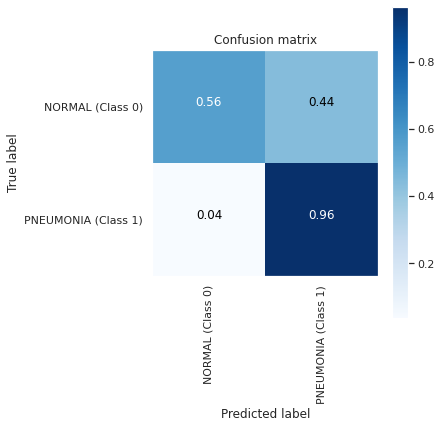

In [ ]:
# plot confusion matrix for test data
cm=confusion_matrix(true_classes, pred_classes, normalize='true')

plot_confusion_matrix(
    cm, classes = ['NORMAL (Class 0)','PNEUMONIA (Class 1)'], normalize = False)

## **Model 7: Interpretation**

Model 7 can detect pneumonia X-ray with recall of 96% and 85% accuracy.

Model 7 can detect normal X-ray with 56% recall and 86% of it are true normal X-ray images.

Model 7 has a train accuracy of 0.8634, 0.8632 validation accuracy and test accuracy of 0.851.



## **Model 8**

## **Model 8: Data Generator-Data Augementation**

In [ ]:
#Data Augmentation

#augment train  dataset to prevent overfitting by increasing number of images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40, # randomly rotate imgaes
                                   width_shift_range = 0.2, # randomly shift images
                                   height_shift_range = 0.2, # randomly shift images
                                   shear_range = 0.2, # randomly shear angles
                                   zoom_range = 0.2, # randomly zoom images
                                   fill_mode = "constant")

train_generator = train_datagen.flow_from_dataframe(dataframe = train,
                                                    x_col = "image",
                                                    y_col = "target",
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = "binary")

val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator= val_datagen.flow_from_dataframe(dataframe = val,
                                              x_col = "image",
                                              y_col = "target",
                                              target_size = (150, 150),
                                              batch_size = 32,
                                              class_mode = "binary")

##rescale test dataset without augmentation since real world data is not augmented
test_datagen = ImageDataGenerator(rescale = 1./255)

#sett shuffle = False for test set or else when making prediction later, 
# function .evaluate() and function .predict_classes() 
# will yield different accuracy score.
# when set to False, data is sorted in alphanumeric order while 
# default is set to True, which shuffles the data.
test_generator = test_datagen.flow_from_dataframe(dataframe = test,
                                                  x_col = "image",
                                                  y_col = "target",
                                                  target_size = (150, 150),
                                                  class_mode = "binary",
                                                  batch_size = 32, shuffle=False)

Found 3543 validated image filenames belonging to 2 classes.
Found 1162 validated image filenames belonging to 2 classes.
Found 1148 validated image filenames belonging to 2 classes.


In [ ]:
# counting the stepsize per epoch
train_steps_per_epoch = np.math.ceil(train_generator.samples / train_generator.batch_size)
val_steps_per_epoch = np.math.ceil(val_generator.samples / val_generator.batch_size)
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

## **Model 8: CNN Architecture**

CNN model is composed of 3 conv layers, padding "valid", regularizers of l2, activation relu. One dense layey with 512 neuron and l2 regularizer. Compile with optimizer of Adam.


1)define a function to set the neural network

    
2) create the cnn  model

3) set the input shape as the previous images

4) 1st convolution layer, padding is valid by default, kernel_regularizer: Regularizer function applied to the kernel weights matrix.
    
5) activation function as relu


6) apply pooling function, same padding is valid by default

    
7) 2nd convolution layer, same as the first one

    
8) 3rd convolution layer same as last one

9) flatten and hidden layer: flattens the input. Does not affect the batch size.
  

10) add one  'regular' neural network layer with 512 neurons, kernel_regularizer: Regularizer function applied to the kernel weights matrix.

    
11) output layer

12)compiling with optimizer Adam


In [ ]:
# import BatchNormalization
from keras.layers.normalization import BatchNormalization

In [ ]:
# create the cnn  model
model8 = Sequential()
# 1st convolution layer, padding is valid by default,  set the input 
# shape as the previous images,  kernel_regularizer: Regularizer function 
# applied to the kernel weights matrix,  activation function as relu
model8.add(Conv2D(135, (7, 7), padding='valid', activation='relu',
                  kernel_regularizer=regularizers.l2(0.01),
                  input_shape=(150, 150, 3)))
# apply pooling function, same padding is valid by default
model8.add(MaxPooling2D(pool_size = (3, 3), padding='valid'))

# 2nd convolution layer, same as the first one
model8.add(Conv2D(60, (5, 5), padding='valid', activation='relu',
                  kernel_regularizer=regularizers.l2(0.01)))

model8.add(MaxPooling2D(pool_size = (3, 3), padding='valid'))


# 3rd convolution layer same as last one
model8.add(Conv2D(35, (3, 3), padding='valid', activation='relu',
                  kernel_regularizer=regularizers.l2(0.01)))

model8.add(MaxPooling2D(pool_size = (2, 2), padding="valid"))




 # flatten and hidden layer
model8.add(Flatten())

# add one dense neural network layer
# kernel_regularizer: Regularizer function applied to the kernel weights matrix.

model8.add(Dense(512, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))



# output layer
model8.add(Dense(1, activation='sigmoid'))

# Creating model and compiling
#compile
model8.compile(loss = 'binary_crossentropy',
                  optimizer = keras.optimizers.Adam(0.0001), metrics = ['acc'])
                 
model8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 144, 144, 135)     19980     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 48, 48, 135)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 44, 44, 60)        202560    
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 60)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 12, 12, 35)        18935     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 6, 6, 35)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1260)             

In [ ]:
#define the callbacks
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 10, 
                                min_delta=0.1, mode='min', verbose = 1),
                 ModelCheckpoint(filepath = 'model8.h5', monitor = 'val_loss',
                                 save_best_only = True, save_weights_only=True)]

## **Model 8: Fitting**

In [ ]:
# set random seed to 42 to is used to replicate the same result.
np.random.seed(42)
tf.random.set_seed(42)


start = datetime.datetime.now()
result_model8 = model8.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch, 
                              epochs=30, 
                              validation_data=val_generator, 
                              validation_steps=val_steps_per_epoch, 
                              callbacks=early_stopping)


end = datetime.datetime.now()
elapsed = end - start
print('\n ---------Elapsed Time-----------')
print('Time to fit Model 8 is:\n {}'.format(elapsed))


Epoch 1/30
111/111 [==============================] - 65s 581ms/step - loss: 8.1706 - acc: 0.7136 - val_loss: 5.5924 - val_acc: 0.7160
Epoch 2/30
111/111 [==============================] - 63s 570ms/step - loss: 4.9504 - acc: 0.7494 - val_loss: 3.4856 - val_acc: 0.7160
Epoch 3/30
111/111 [==============================] - 65s 588ms/step - loss: 3.1455 - acc: 0.7393 - val_loss: 2.2430 - val_acc: 0.8253
Epoch 4/30
111/111 [==============================] - 64s 575ms/step - loss: 2.1011 - acc: 0.7722 - val_loss: 1.6047 - val_acc: 0.8589
Epoch 5/30
111/111 [==============================] - 65s 588ms/step - loss: 1.5281 - acc: 0.8020 - val_loss: 1.2462 - val_acc: 0.8262
Epoch 6/30
111/111 [==============================] - 64s 578ms/step - loss: 1.2002 - acc: 0.8315 - val_loss: 1.1924 - val_acc: 0.7599
Epoch 7/30
111/111 [==============================] - 64s 581ms/step - loss: 1.0641 - acc: 0.8204 - val_loss: 0.9273 - val_acc: 0.8425
Epoch 8/30
111/111 [==============================] - 6

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#save model
model_save_name = 'model8'
path = F"/content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/{model_save_name}" 
model8.save(path)

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/model8/assets


In [ ]:
#save model
model_save_name = 'model8.h5'
path = F"/content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/{model_save_name}" 
model8.save(path)

## **Model 8: Visualization of Loss & Accuracy of Training and Validation Data**

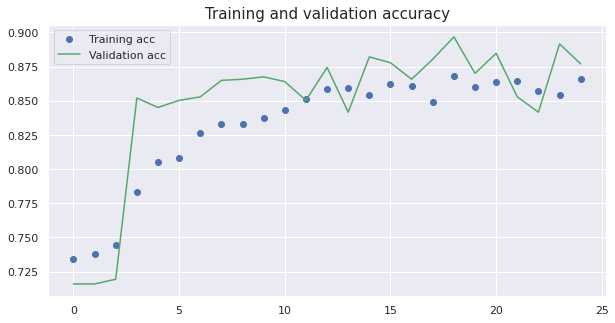

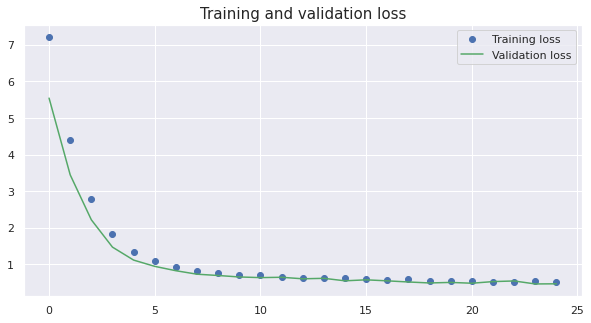

In [ ]:
# Visualization of ccuracy and loss in tarining and validation data

visualize_training_results(result_model8)

## **Model 8: Metrics**

In [ ]:
# Collecting model metrics

evaluation_result(model8,
                  'cnn_model8_DataAugmentation_Optimizer__Adam_padding_batchnormalizationcallback_regulizers_l2')

{'Model': 'cnn_model8_DataAugmentation_Optimizer__Adam_padding_batchnormalizationcallback_regulizers_l2',
 'Precision': 0.8475,
 'Recall': 0.9613,
 'Test Accuracy': 0.8476,
 'Test Loss': 0.5481,
 'Train Accuracy': 0.8789,
 'Train Loss': 0.4875,
 'Validation Accuracy': 0.8769,
 'f1': 0.9008,
 'validation Loss': 0.4674}

In [ ]:
results=evaluation_result(model8,
                          'cnn_model8_DataAugmentation_Optimizer__Adam_padding_batchnormalizationcallback_regulizers_l2')
results_final = []
# appending the results of the new model
results_final.append(results)
#  results in dataframe
df_model_results = pd.DataFrame(results_final)
df_model_results

,Model,Train Accuracy,Train Loss,Validation Accuracy,validation Loss,Test Accuracy,Test Loss,Precision,Recall,f1
0,cnn_model8_DataAugmentation_Optimizer__Adam_pa...,0.8721,0.4901,0.8769,0.4674,0.8476,0.5481,0.8475,0.9613,0.9008


In [ ]:
#evaluate
print('Train loss & accuracy:' , model8.evaluate(train_generator))
print('\n')
print('Test loss & accuracy:' , model8.evaluate(test_generator))

111/111 [==============================] - 47s 427ms/step - loss: 0.4900 - acc: 0.8767
Train loss & accuracy: [0.48999327421188354, 0.8766582012176514]


36/36 [==============================] - 10s 262ms/step - loss: 0.5481 - acc: 0.8476
Test loss & accuracy: [0.5480656623840332, 0.8475610017776489]


## **Model 8: Prediction & Classification Report**

In [ ]:
# get predictions on the val set
y_hat = model8.predict_classes(val_images)

print('Model: Model8', '\n', classification_report(
    val_labels, y_hat, target_names = ['NORMAL (Class 0)','PNEUMONIA (Class 1)']))

Model: Model8 
                      precision    recall  f1-score   support

   NORMAL (Class 0)       0.71      0.95      0.81       330
PNEUMONIA (Class 1)       0.98      0.84      0.91       832

           accuracy                           0.87      1162
          macro avg       0.84      0.90      0.86      1162
       weighted avg       0.90      0.87      0.88      1162



In [ ]:
#make prediction on test data
pred = model8.predict_generator(test_generator, test_steps_per_epoch)
pred_classes = np.round(pred)
#define target
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("Baseline Model:\n")
print("Confusion Matrix:\n", confusion_matrix(true_classes, pred_classes))
print("----------------------------------------------------")
print("Classification Report:\n", classification_report(
    true_classes, pred_classes, target_names=class_labels))

Baseline Model:

Confusion Matrix:
 [[178 143]
 [ 32 795]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

      normal       0.85      0.55      0.67       321
   pneumonia       0.85      0.96      0.90       827

    accuracy                           0.85      1148
   macro avg       0.85      0.76      0.79      1148
weighted avg       0.85      0.85      0.84      1148



## **Model 8: Confusion Matrix**

In [ ]:
# confusion matrix for validation set

cm=confusion_matrix(val_labels, np.round(y_hat))
cm

array([[312,  18],
       [129, 703]])

In [ ]:
# true negative(tn), false positive(fp),
# false negative (fn), true positive(tp) for valiation data
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(312, 18, 129, 703)

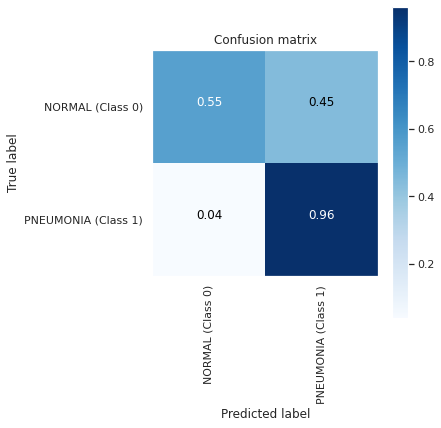

In [ ]:
#plot confusion matrix for test data
cm=confusion_matrix(true_classes, pred_classes, normalize='true')

plot_confusion_matrix(
    cm, classes = ['NORMAL (Class 0)','PNEUMONIA (Class 1)'], normalize = False)

## **Model 8: Interpretation**

Model 8 can detect pneumonia X-ray with recall of 96% and 85% accuracy.

Model 8 can detect normal X-ray with 55% recall and 85% of it are true normal X-ray images.

Model 8 has a train accuracy of 0.8721, 0.8769 validation accuracy and test accuracy of 0.8476.



## **Model 9**

## **Model 9: Data Generation-Data Augmentation**

In [ ]:
#Data Augmentation

#augment train  dataset to prevent overfitting by increasing number of images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40, # randomly rotate imgaes
                                   width_shift_range = 0.2, # randomly shift images
                                   height_shift_range = 0.2, # randomly shift images
                                   shear_range = 0.2, # randomly shear angles
                                   zoom_range = 0.2, # randomly zoom images
                                   fill_mode = "constant")

train_generator = train_datagen.flow_from_dataframe(dataframe = train,
                                                    x_col = "image",
                                                    y_col = "target",
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = "binary")

val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator= val_datagen.flow_from_dataframe(dataframe = val,
                                              x_col = "image",
                                              y_col = "target",
                                              target_size = (150, 150),
                                              batch_size = 32,
                                              class_mode = "binary")

#rescale test dataset without augmentation since real world data is not augmented
test_datagen = ImageDataGenerator(rescale = 1./255)

#sett shuffle = False for test set or else when making prediction later, 
# function .evaluate() and function .predict_classes() 
#will yield different accuracy score.
#when set to False, data is sorted in alphanumeric order while
# default is set to True, which shuffles the data.
test_generator = test_datagen.flow_from_dataframe(dataframe = test,
                                                  x_col = "image",
                                                  y_col = "target",
                                                  target_size = (150, 150),
                                                  class_mode = "binary",
                                                  batch_size = 32,
                                                  shuffle=False)

Found 3543 validated image filenames belonging to 2 classes.
Found 1162 validated image filenames belonging to 2 classes.
Found 1148 validated image filenames belonging to 2 classes.


In [ ]:
# counting the stepsize per epoch
train_steps_per_epoch = np.math.ceil(
    train_generator.samples / train_generator.batch_size)

val_steps_per_epoch = np.math.ceil(
    val_generator.samples / val_generator.batch_size)
                                   
test_steps_per_epoch = np.math.ceil(
    test_generator.samples / test_generator.batch_size)

## **Model 9: CNN Architecture**

CNN model is composed of 3 conv layers, padding "valid", regularizers of l2, activation relu with batch normalization. One dense layer with 512 neuron and l2 regularizer and batch normalization. Compile with optimizer of Adam.

Data Generator: with data augmentation

1) define a function to set the neural network

    
2) create the cnn  model

3) set the input shape as the previous images

4) 1st convolution layer, padding is valid by default,kernel_regularizer: Regularizer function applied to the kernel weights matrix.
     
5) batch normalzation: makes cnn faster through the input normalization. Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks. Deep neural networks are challenging to train, not least because the input from prior layers can change after weight updates.
Batch normalization is a technique to standardize the inputs to a network, applied to ether the activations of a prior layer or inputs directly.
Batch normalization accelerates training, in some cases by halving the epochs or better, and provides some regularization, reducing generalization error.

6) activation function as relu



7) apply pooling function, same padding is valid by default

    
8) 2nd convolution layer, same as the first one

    
9) 3rd convolution layer same as last one

10) flatten and hidden layer: flattens the input. Does not affect the batch size.
  

11) add a one 'regular' dense neural network layer with 512 neurons, kernel_regularizer: Regularizer function applied to the kernel weights matrix.

12 ) apply the batch normalization

    
13) output layer

14) compiling with optimizer Adam


In [ ]:
 # create the cnn  model
model9 = Sequential()

# 1st convolution layer, padding is valid by default,set the input shape 
# as the previous images,  activation function as relu 
# kernel_regularizer: Regularizer function applied to the kernel weights matrix.
model9.add(Conv2D(135, (7, 7), padding='valid', activation='relu', 
                  kernel_regularizer=regularizers.l2(0.01),
                  input_shape=(150, 150, 3)))
# makes cnn faster through the input normalization
model9.add(BatchNormalization())
# apply pooling function, same padding is valid by default
model9.add(MaxPooling2D(pool_size = (3, 3), padding='valid'))

# 2nd convolution layer, same as the first one
model9.add(Conv2D(60, (5, 5), padding='valid', activation='relu',
                  kernel_regularizer=regularizers.l2(0.01)))
model9.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size = (3, 3), padding='valid'))


 # 3rd convolution layer same as last one
model9.add(Conv2D(35, (3, 3), padding='valid', activation='relu',
                  kernel_regularizer=regularizers.l2(0.01)))
model9.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size = (2, 2), padding="valid"))




# flatten and hidden layer
model9.add(Flatten())
# add one dense neural network layer
# kernel_regularizer: Regularizer function applied to the kernel weights matrix.
model9.add(Dense(512, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01)))
# apply the normalization
model9.add(BatchNormalization())


# output layer
model9.add(Dense(1, activation='sigmoid'))

# Creating model and compiling
#compile
model9.compile(loss = 'binary_crossentropy',
                  optimizer = keras.optimizers.Adam(0.0001), metrics = ['acc'])
                 
model9.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 144, 144, 135)     19980     
_________________________________________________________________
batch_normalization (BatchNo (None, 144, 144, 135)     540       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 48, 48, 135)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 44, 44, 60)        202560    
_________________________________________________________________
batch_normalization_1 (Batch (None, 44, 44, 60)        240       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 60)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 35)       

In [ ]:
#define the callbacks
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 10, 
                                min_delta=0.1, mode='min', verbose = 1),
                 ModelCheckpoint(filepath = 'model9.h5', monitor = 'val_loss',
                                 save_best_only = True, save_weights_only=True)]

## **Model 9: Fitting**

In [ ]:
# set random seed to 42 to is used to replicate the same result.
np.random.seed(42)
tf.random.set_seed(42)


start = datetime.datetime.now()
result_model9 = model9.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch, 
                              epochs=30, 
                              validation_data=val_generator, 
                              validation_steps=val_steps_per_epoch,
                               callbacks=early_stopping)


end = datetime.datetime.now()
elapsed = end - start
print('\n ---------Elapsed Time-----------')
print('Time to fit Model 8 is:\n {}'.format(elapsed))


#save model
model9.save(
    "cnn_model9_DataAugmentation_Optimizer__Adam_padding_batchnormalizationcallback_regulizers_l2")


Epoch 1/30
111/111 [==============================] - 61s 543ms/step - loss: 8.9488 - acc: 0.6894 - val_loss: 8.0666 - val_acc: 0.7160
Epoch 2/30
111/111 [==============================] - 60s 540ms/step - loss: 7.6452 - acc: 0.8276 - val_loss: 7.1177 - val_acc: 0.7160
Epoch 3/30
111/111 [==============================] - 60s 540ms/step - loss: 6.6735 - acc: 0.8704 - val_loss: 6.5677 - val_acc: 0.7160
Epoch 4/30
111/111 [==============================] - 60s 542ms/step - loss: 5.9091 - acc: 0.8782 - val_loss: 6.2022 - val_acc: 0.7160
Epoch 5/30
111/111 [==============================] - 60s 543ms/step - loss: 5.2395 - acc: 0.8919 - val_loss: 6.7111 - val_acc: 0.7160
Epoch 6/30
111/111 [==============================] - 60s 542ms/step - loss: 4.6907 - acc: 0.9046 - val_loss: 5.5450 - val_acc: 0.7160
Epoch 7/30
111/111 [==============================] - 60s 542ms/step - loss: 4.2518 - acc: 0.9120 - val_loss: 5.8633 - val_acc: 0.7160
Epoch 8/30
111/111 [==============================] - 6

In [ ]:
#save model
model9.save(
    "cnn_model9_DataAugmentation_Optimizer__Adam_padding_batchnormalizationcallback_regulizers_l2")

INFO:tensorflow:Assets written to: cnn_model9_DataAugmentation_Optimizer__Adam_padding_batchnormalizationcallback_regulizers_l2/assets


## **Model 9: Visualization of Loss and Accuracy of Training and Validation Data**

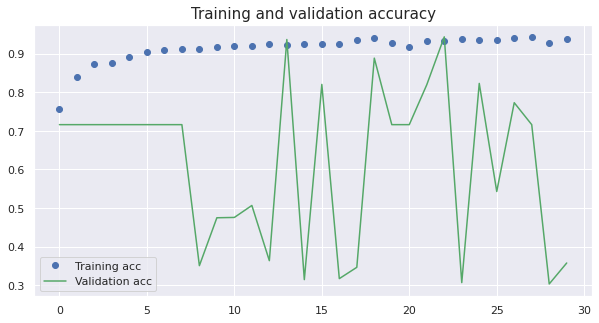

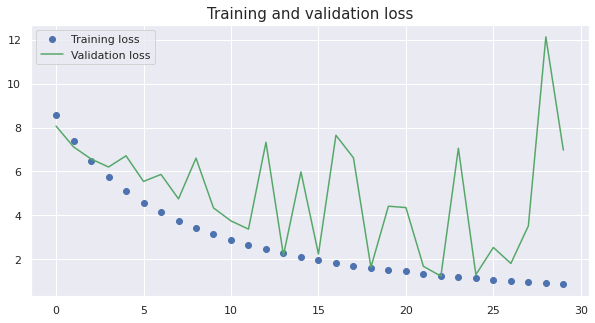

In [ ]:
# Visualization of ccuracy and loss in tarining and validation data

visualize_training_results(result_model9)

## **Model 9: Metrics**

In [ ]:
# Collecting model metrics

evaluation_result(model9, 
                  'cnn_model9_DataAugmentation_Optimizer__Adam_padding_batchnormalizationcallback_regulizers_l2')

{'Model': 'cnn_model9_DataAugmentation_Optimizer__Adam_padding_batchnormalizationcallback_regulizers_l2',
 'Precision': 0.9865,
 'Recall': 0.0883,
 'Test Accuracy': 0.3423,
 'Test Loss': 6.6507,
 'Train Accuracy': 0.4112,
 'Train Loss': 4.2788,
 'Validation Accuracy': 0.358,
 'f1': 0.162,
 'validation Loss': 6.9731}

In [ ]:
results=evaluation_result(model9, 
                          'cnn_model9_DataAugmentation_Optimizer__Adam_padding_batchnormalizationcallback_regulizers_l2')
results_final = []
# appending the results of the new model
results_final.append(results)
#  results in dataframe
df_model_results = pd.DataFrame(results_final)
df_model_results

,Model,Train Accuracy,Train Loss,Validation Accuracy,validation Loss,Test Accuracy,Test Loss,Precision,Recall,f1
0,cnn_model9_DataAugmentation_Optimizer__Adam_pa...,0.4025,4.307,0.358,6.9731,0.3423,6.6507,0.9865,0.0883,0.162


## **Model 9:  Prediction and Classification Report**

In [ ]:
#make prediction
pred = model9.predict_generator(test_generator, test_steps_per_epoch)
pred_classes = np.round(pred)
#define target
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("Baseline Model:\n")
print("Confusion Matrix:\n", confusion_matrix(true_classes, pred_classes))
print("----------------------------------------------------")
print("Classification Report:\n",classification_report(
    true_classes, pred_classes, target_names=class_labels))
      

Baseline Model:

Confusion Matrix:
 [[320   1]
 [754  73]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

      normal       0.30      1.00      0.46       321
   pneumonia       0.99      0.09      0.16       827

    accuracy                           0.34      1148
   macro avg       0.64      0.54      0.31      1148
weighted avg       0.79      0.34      0.25      1148



## **Model 9: Confusion Matrix**

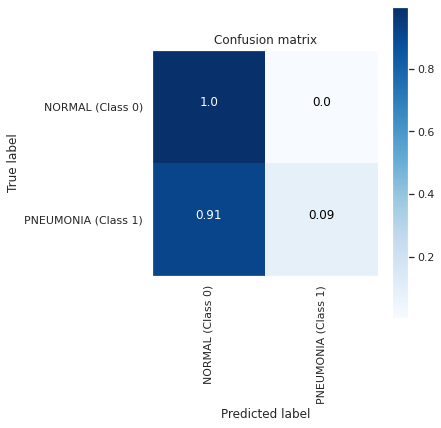

In [ ]:
cm=confusion_matrix(true_classes, pred_classes, normalize='true')

plot_confusion_matrix(
    cm, classes = ['NORMAL (Class 0)','PNEUMONIA (Class 1)'], normalize = False)

## **Model 9: Interpretation**

Model 9 can detect pneumonia X-ray with recall of 9% and 99% accuracy.

Model 9 can detect normal X-ray with 100% recall and 30% of it are true normal X-ray images.

Model 9 has a train accuracy of 0.405, validation accuracy 0.358 and test accuracy of 0.3423.

Model 9 is not reliable for pneumonia diagnosis. Model 9 can not be used.

## **Model 10**

## **Model 10: Data Generator-Data Augementation**

In [ ]:
#Data Augmentation

#augment train  dataset to prevent overfitting by increasing number of images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40, # randomly rotate imgaes
                                   width_shift_range = 0.2, # randomly shift images
                                   height_shift_range = 0.2, # randomly shift images
                                   shear_range = 0.2, # randomly shear angles
                                   zoom_range = 0.2, # randomly zoom images
                                   fill_mode = "constant")

train_generator = train_datagen.flow_from_dataframe(dataframe = train,
                                                    x_col = "image",
                                                    y_col = "target",
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = "binary")

val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator= val_datagen.flow_from_dataframe(dataframe = val,
                                              x_col = "image",
                                              y_col = "target",
                                              target_size = (150, 150),
                                              batch_size = 1162,
                                              class_mode = "binary")

# rescale test dataset without augmentation since real world data is not augmented
test_datagen = ImageDataGenerator(rescale = 1./255)

# set shuffle = False for test set or else when making prediction later,
# function .evaluate() and function .predict_classes() 
# will yield different accuracy score.
# when set to False, data is sorted in alphanumeric order while default
# is set to True, which shuffles the data.
test_generator = test_datagen.flow_from_dataframe(dataframe = test,
                                                  x_col = "image",
                                                  y_col = "target",
                                                  target_size = (150, 150),
                                                  class_mode = "binary",
                                                  batch_size = 32,
                                                  shuffle=False)
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

Found 3543 validated image filenames belonging to 2 classes.
Found 1162 validated image filenames belonging to 2 classes.
Found 1148 validated image filenames belonging to 2 classes.


In [ ]:
#define the callbacks
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 10,
                                min_delta=0.1, mode='min', verbose = 1),
                 ModelCheckpoint(filepath = 'model10.h5', monitor = 'val_loss',
                                 save_best_only = True, save_weights_only=True)]

In [ ]:
# counting the stepsize per epoch
train_steps_per_epoch = np.math.ceil(
    train_generator.samples / train_generator.batch_size)
val_steps_per_epoch = np.math.ceil(
    val_generator.samples / val_generator.batch_size)
test_steps_per_epoch = np.math.ceil(
    test_generator.samples / test_generator.batch_size)

# **Model 10: CNN Architecture**

CNN model is composed of 3 conv layers, padding "valid", regularizers of l2, activation relu with batch normalization and dropout layer. One dense layer with 512 neuron and l2 regularizer,  batch normalization and dropout layer. Compile with optimizer of Adam.

Data generator: with data augmentation

1)define a function to set the neural network

    
2) create the cnn  model


3) set the input shape as the previous images

4) 1st convolution layer, padding is valid by default,
     kernel_regularizer: Regularizer function applied to the kernel weights matrix.

5) batch normalzation: makes cnn faster through the input normalization

6) activation function as relu

7) Dropout: Inputs not set to 0 are scaled up by 1/(1 - rate)

8) apply pooling function, same padding is valid by default

    
9) 2nd convolution layer, same as the first one

    
10) 3rd convolution layer same as last one

11) flatten and hidden layer: flattens the input. Does not affect the batch size.
  

12) add a 'regular' neural network layer, kernel_regularizer: Regularizer function applied to the kernel weights matrix.

13 ) apply the normalization
14) dropout
    
14) output layer

15)compiling


In [ ]:
# create the cnn  model
model10 = Sequential()

 # 1st convolution layer, padding is valid by default,
 # set the input shape as the previous images,
 # kernel_regularizer: Regularizer function applied to the kernel weights matrix,
 # activation function as relu
model10.add(Conv2D(135, (3, 3), padding='valid', activation='relu',
                   kernel_regularizer=regularizers.l2(0.01), 
                   input_shape=(150, 150, 3)))
# Apply Normalization to make cnn faster
model10.add(BatchNormalization())
# apply pooling function, same padding is valid by default
model10.add(MaxPooling2D(pool_size = (2, 2), padding='valid'))

# 2nd convolution layer, same as the first one
model10.add(Conv2D(60, (3, 3), padding='valid', activation='relu',
                   kernel_regularizer=regularizers.l2(0.01)))
model10.add(BatchNormalization())
# Inputs not set to 0 are scaled up by 1/(1 - rate)
model10.add(Dropout(0.2))
model10.add(MaxPooling2D(pool_size = (2, 2), padding='valid'))


# 3rd convolution layer same as last one
model10.add(Conv2D(35, (3, 3), padding='valid', activation='relu',
                   kernel_regularizer=regularizers.l2(0.01)))
model10.add(BatchNormalization())
model10.add(Dropout(0.2))
model10.add(MaxPooling2D(pool_size = (2, 2), padding="valid"))




# flatten and hidden layer
# Flattens the input. Does not affect the batch size.
model10.add(Flatten())
# add one dense neural network layer
# kernel_regularizer: Regularizer function applied to the kernel weights matrix.
model10.add(Dense(35, activation='relu',
                  kernel_regularizer=regularizers.l2(0.01)))
# Apply dropout, inputs not set to 0 are scaled up by 1/(1 - rate) 
model10.add(Dropout(0.2))
# Apply batch normalization
model10.add(BatchNormalization())


# output layer
model10.add(Dense(1, activation='sigmoid'))

# Creating model and compiling
#compile
model10.compile(loss = 'binary_crossentropy',
                  optimizer = keras.optimizers.Adam(0.0001), metrics = ['acc'])
                 
model10.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 135)     3780      
_________________________________________________________________
batch_normalization_4 (Batch (None, 148, 148, 135)     540       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 135)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 60)        72960     
_________________________________________________________________
batch_normalization_5 (Batch (None, 72, 72, 60)        240       
_________________________________________________________________
dropout_8 (Dropout)          (None, 72, 72, 60)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 60)       

## **Model 10: Fitting**

In [ ]:
# set random seed to 42 to is used to replicate the same result.
np.random.seed(42)
tf.random.set_seed(42)


start = datetime.datetime.now()
result_model10 = model10.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch, 
                              epochs=30, 
                              validation_data=val_generator, 
                              validation_steps=val_steps_per_epoch,
                              callbacks=early_stopping)


end = datetime.datetime.now()
elapsed = end - start
print('\n ---------Elapsed Time-----------')
print('Time to fit Model 10 is:\n {}'.format(elapsed))


Epoch 1/30
111/111 [==============================] - 70s 620ms/step - loss: 2.7282 - acc: 0.6043 - val_loss: 2.5095 - val_acc: 0.7160
Epoch 2/30
111/111 [==============================] - 69s 620ms/step - loss: 2.3902 - acc: 0.7827 - val_loss: 2.3456 - val_acc: 0.7151
Epoch 3/30
111/111 [==============================] - 68s 613ms/step - loss: 2.2051 - acc: 0.8423 - val_loss: 2.2769 - val_acc: 0.7160
Epoch 4/30
111/111 [==============================] - 68s 615ms/step - loss: 2.0781 - acc: 0.8630 - val_loss: 2.2873 - val_acc: 0.7160
Epoch 5/30
111/111 [==============================] - 68s 611ms/step - loss: 2.0098 - acc: 0.8470 - val_loss: 1.9914 - val_acc: 0.7169
Epoch 6/30
111/111 [==============================] - 67s 607ms/step - loss: 1.8636 - acc: 0.8835 - val_loss: 1.9441 - val_acc: 0.7194
Epoch 7/30
111/111 [==============================] - 66s 596ms/step - loss: 1.7706 - acc: 0.8941 - val_loss: 1.6605 - val_acc: 0.8726
Epoch 8/30
111/111 [==============================] - 6

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#save model
model_save_name = 'model10'
path = F"/content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/{model_save_name}" 
model10.save(path)

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/model10/assets


In [ ]:
#save model
model_save_name = 'model10.h5'
path = F"/content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/{model_save_name}" 
model10.save(path)

## **Data Evaluation**

## **Model 10: Visualization of loss and Accuracy of Training and Validaton Data**

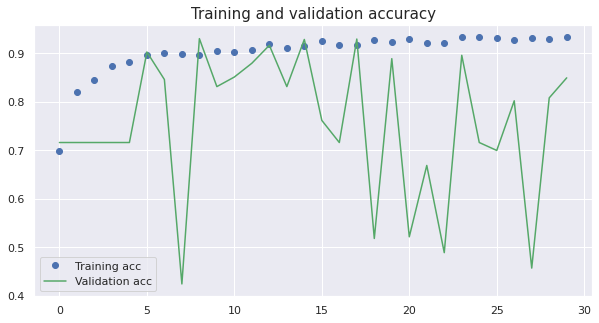

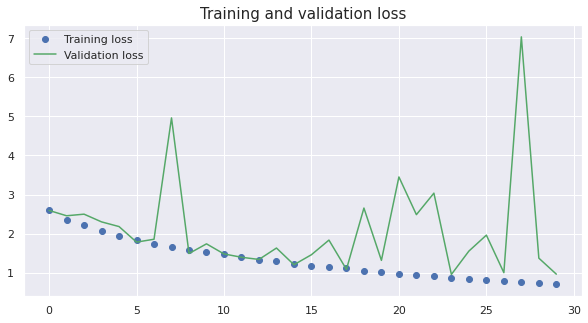

In [ ]:
# Visualization of ccuracy and loss in tarining and validation data

visualize_training_results(result_model10)

## **Model 10 : Metrics**

In [ ]:
# Collecting model metrics

evaluation_result(model10,
                  "cnn_model10_DataAugmentation_Dropout_Optimizer__Adam_padding_batchnormalizationcallback_regulizers_l2")

{'Model': 'cnn_model10_DataAugmentation_Dropout_Optimizer__Adam_padding_batchnormalizationcallback_regulizers_l2',
 'Precision': 0.9446,
 'Recall': 0.8247,
 'Test Accuracy': 0.8389,
 'Test Loss': 0.9084,
 'Train Accuracy': 0.9167,
 'Train Loss': 0.7406,
 'Validation Accuracy': 0.8494,
 'f1': 0.8806,
 'validation Loss': 0.963}

In [ ]:
results=evaluation_result(model10,
                          "cnn_model10_DataAugmentation_Dropout_Optimizer__Adam_padding_batchnormalizationcallback_regulizers_l2")
results_final = []
# appending the results of the new model
results_final.append(results)
#  results in dataframe
df_model_results = pd.DataFrame(results_final)
df_model_results

,Model,Train Accuracy,Train Loss,Validation Accuracy,validation Loss,Test Accuracy,Test Loss,Precision,Recall,f1
0,cnn_model10_DataAugmentation_Dropout_Optimizer...,0.9198,0.7342,0.8494,0.963,0.8389,0.9084,0.9446,0.8247,0.8806


In [ ]:
#evaluate
print('Train loss & accuracy:' , model10.evaluate(train_generator))
print('\n')
print('Test loss & accuracy:' , model10.evaluate(test_generator))

111/111 [==============================] - 53s 481ms/step - loss: 0.7518 - acc: 0.9148
Train loss & accuracy: [0.7518392205238342, 0.914761483669281]


36/36 [==============================] - 11s 285ms/step - loss: 0.9084 - acc: 0.8389
Test loss & accuracy: [0.9083718657493591, 0.838850200176239]


## **Model 10 : Prediction & Classification Report**

In [ ]:
# get predictions on the val set
y_hat = model10.predict_classes(val_images)

print('Model: Model10', '\n', classification_report(
    val_labels, y_hat, target_names = ['NORMAL (Class 0)','PNEUMONIA (Class 1)']))
     

Model: Model10 
                      precision    recall  f1-score   support

   NORMAL (Class 0)       0.33      1.00      0.49       330
PNEUMONIA (Class 1)       1.00      0.18      0.31       832

           accuracy                           0.41      1162
          macro avg       0.66      0.59      0.40      1162
       weighted avg       0.81      0.41      0.36      1162



In [ ]:
#make prediction on test data
pred = model10.predict_generator(test_generator, test_steps_per_epoch)
pred_classes = np.round(pred)
#define target
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print(" Model 10:\n")
print("Confusion Matrix:\n", confusion_matrix(true_classes, pred_classes))
print("----------------------------------------------------")
print("Classification Report:\n", classification_report(
    true_classes, pred_classes, target_names=class_labels))
      

Baseline Model:

Confusion Matrix:
 [[281  40]
 [145 682]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

      normal       0.66      0.88      0.75       321
   pneumonia       0.94      0.82      0.88       827

    accuracy                           0.84      1148
   macro avg       0.80      0.85      0.82      1148
weighted avg       0.86      0.84      0.84      1148



## **Model 10: Confusion Matrix**

In [ ]:
# confusion matrix for validation set

cm=confusion_matrix(val_labels, np.round(y_hat))
cm

array([[330,   0],
       [682, 150]])

In [ ]:
# true negative(tn), false positive(fp),
# false negative (fn), true positive(tp) for valiation data
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(330, 0, 682, 150)

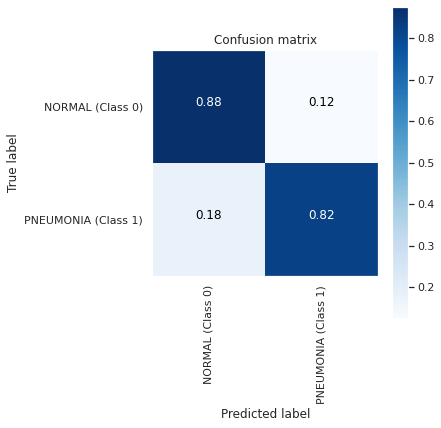

In [ ]:
#plot confusion matrix for test data
cm=confusion_matrix(true_classes, pred_classes, normalize='true')

plot_confusion_matrix(
    cm, classes = ['NORMAL (Class 0)','PNEUMONIA (Class 1)'], normalize = False)

## **Model 10: Interpretation**

Model 10 can detect pneumonia X-ray with recall of 82% and 94% accuracy.

Model 10 can detect normal X-ray with 88% recall and 66% of it are true normal X-ray images.

Model 10 has a train accuracy of 0.9198, 0.8494 validation accuracy and test accuracy of 0.8389.

Model 10 is reliable for pneumonia diagnosis. 

# **Model 11**

## **Model 11: Data Generator-No Data Augmentation**

In [ ]:
#Data generator
# No data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255)
                                   

train_generator = train_datagen.flow_from_dataframe(dataframe = train,
                                                    x_col = "image",
                                                    y_col = "target",
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = "binary")

val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator= val_datagen.flow_from_dataframe(dataframe = val,
                                              x_col = "image",
                                              y_col = "target",
                                              target_size = (150, 150),
                                              batch_size = 32,
                                              class_mode = "binary")


test_datagen = ImageDataGenerator(rescale = 1./255)

# set shuffle = False for test set or else when making prediction later,
# function .evaluate() and function .predict_classes()
# will yield different accuracy score.
# when set to False, data is sorted in alphanumeric order while default
# is set to True, which shuffles the data.
test_generator = test_datagen.flow_from_dataframe(dataframe = test,
                                                  x_col = "image",
                                                  y_col = "target",
                                                  target_size = (150, 150),
                                                  class_mode = "binary",
                                                  batch_size = 32,
                                                  shuffle=False)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

Found 3543 validated image filenames belonging to 2 classes.
Found 1162 validated image filenames belonging to 2 classes.
Found 1148 validated image filenames belonging to 2 classes.


In [ ]:
# counting the stepsize per epoch
train_steps_per_epoch = np.math.ceil(
    train_generator.samples / train_generator.batch_size)
val_steps_per_epoch = np.math.ceil(
    val_generator.samples / val_generator.batch_size)
test_steps_per_epoch = np.math.ceil(
    test_generator.samples / test_generator.batch_size)

In [ ]:
#define the callbacks
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 10,
                                min_delta=0.1, mode='min', verbose = 1),
                 ModelCheckpoint(filepath = 'model11.h5', monitor = 'val_loss',
                                 save_best_only = True, save_weights_only=True)]

# **Model 11: CNN Architecture**

CNN model is composed of 3 conv layers, padding "valid", regularizers of l2, activation relu with batch normalization and dropout layer. One dense layer with 512 neuron and l2 regularizer,  batch normalization and dropout layer. Compile with optimizer of Adam.

Data generator: with data augmentation

1) define a function to set the neural network

    
2) create the cnn  model


3) set the input shape as the previous images

4) 1st convolution layer, padding is valid by default,
     kernel_regularizer: Regularizer function applied to the kernel weights matrix.

5) batch normalzation: makes cnn faster through the input normalization

6) activation function as relu

7) Dropout: Inputs not set to 0 are scaled up by 1/(1 - rate)

8) apply pooling function, same padding is valid by default

    
9) 2nd convolution layer, same as the first one

    
10) 3rd convolution layer same as last one

11) flatten and hidden layer: flattens the input. Does not affect the batch size.
  

12) add a 'regular' neural network layer, kernel_regularizer: Regularizer function applied to the kernel weights matrix.

13 ) apply the normalization
14) dropout
    
14) output layer

15)compiling with Adam optimizer


In [ ]:
# create the cnn  model
model11 = Sequential()

# 1st convolution layer, padding is valid by default,
# activation function as relu, kernel_regularizer: Regularizer function
# applied to the kernel weights matrix.
model11.add(Conv2D(135, (3, 3), padding='valid', activation='relu',
                   kernel_regularizer=regularizers.l2(0.01),
                   input_shape=(150, 150, 3)))
# apply batch normalization to make cnn faster
model11.add(BatchNormalization())
 # apply pooling function, same padding is valid by default
model11.add(MaxPooling2D(pool_size = (2, 2), padding='valid'))

# 2nd convolution layer, same as the first one with application 0f 0.2% dropout
model11.add(Conv2D(60, (3, 3), padding='valid', activation='relu',
                   kernel_regularizer=regularizers.l2(0.01)))
model11.add(BatchNormalization())
# Inputs not set to 0 are scaled up by 1/(1 - rate)
model11.add(Dropout(0.2))
model11.add(MaxPooling2D(pool_size = (2, 2), padding='valid'))


# 3rd convolution layer same as last one
model11.add(Conv2D(35, (3, 3), padding='valid', activation='relu',
                   kernel_regularizer=regularizers.l2(0.01)))
model11.add(BatchNormalization())
model11.add(Dropout(0.2))
model11.add(MaxPooling2D(pool_size = (2, 2), padding="valid"))




# flatten and hidden layer
# Flattens the input. Does not affect the batch size.
model11.add(Flatten())
# add one dense neural network layer with 512 neurons 
# kernel_regularizer: Regularizer function applied to the kernel weights matrix.
model11.add(Dense(35, activation='relu',
                  kernel_regularizer=regularizers.l2(0.01)))
# apply 0.2% dropout
model11.add(Dropout(0.2))
#applu batch normalization
model11.add(BatchNormalization())


# output layer
model11.add(Dense(1, activation='sigmoid'))

# Creating model and compiling
#compile
model11.compile(loss = 'binary_crossentropy',
                  optimizer = keras.optimizers.Adam(0.0001),
                  metrics = ['acc'])
                 
model11.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 135)     3780      
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 135)     540       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 135)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 60)        72960     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 60)        240       
_________________________________________________________________
dropout (Dropout)            (None, 72, 72, 60)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 60)        0

## **Model 11: Fitting**

In [ ]:
# set random seed to 42 to is used to replicate the same result.
np.random.seed(42)
tf.random.set_seed(42)


start = datetime.datetime.now()
result_model11 = model11.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch, 
                              epochs=30, 
                              validation_data=val_generator, 
                              validation_steps=val_steps_per_epoch,
                              callbacks=early_stopping)


end = datetime.datetime.now()
elapsed = end - start
print('\n ---------Elapsed Time-----------')
print('Time to fit Model 11 is:\n {}'.format(elapsed))




Epoch 1/30
111/111 [==============================] - 1695s 15s/step - loss: 2.4088 - acc: 0.8149 - val_loss: 2.4612 - val_acc: 0.7332
Epoch 2/30
111/111 [==============================] - 47s 418ms/step - loss: 1.9600 - acc: 0.9590 - val_loss: 2.6150 - val_acc: 0.2840
Epoch 3/30
111/111 [==============================] - 46s 417ms/step - loss: 1.7240 - acc: 0.9716 - val_loss: 2.3521 - val_acc: 0.7160
Epoch 4/30
111/111 [==============================] - 46s 416ms/step - loss: 1.5304 - acc: 0.9779 - val_loss: 1.9093 - val_acc: 0.7238
Epoch 5/30
111/111 [==============================] - 47s 420ms/step - loss: 1.3834 - acc: 0.9822 - val_loss: 1.3196 - val_acc: 0.9699
Epoch 6/30
111/111 [==============================] - 47s 422ms/step - loss: 1.2309 - acc: 0.9888 - val_loss: 1.4740 - val_acc: 0.7986
Epoch 7/30
111/111 [==============================] - 47s 421ms/step - loss: 1.1296 - acc: 0.9805 - val_loss: 1.2001 - val_acc: 0.8941
Epoch 8/30
111/111 [==============================] - 4

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#save model
model_save_name = 'model11'
path = F"/content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/{model_save_name}" 
model11.save(path)

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/model11/assets


In [ ]:
#save model
model_save_name = 'model11.h5'
path = F"/content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/{model_save_name}" 
model11.save(path)

## **Data Evaluation**

## **Model 11: Visualization of Loss and Accuracy of Training and Validation data**

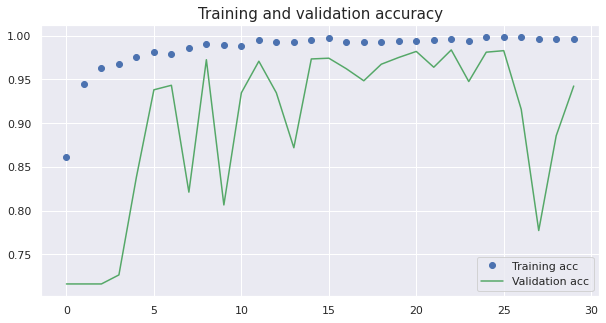

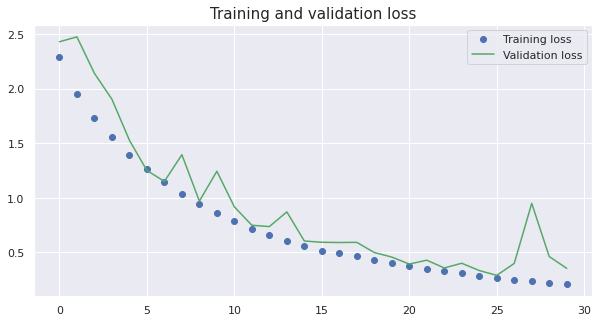

In [ ]:
# Visualization of ccuracy and loss in tarining and validation data

visualize_training_results(result_model11)

## **Model 11: Metrics**

In [ ]:
# Collecting model metrics

evaluation_result(model11,
                  "cnn_model11_NO_DataAugmentation_Dropout_Optimizer__Adam_padding_batchnormalizationcallback_regulizers_l2")

{'Model': 'cnn_model11_NO_DataAugmentation_Dropout_Optimizer__Adam_padding_batchnormalizationcallback_regulizers_l2',
 'Precision': 0.907,
 'Recall': 0.9432,
 'Test Accuracy': 0.8894,
 'Test Loss': 0.5039,
 'Train Accuracy': 0.9393,
 'Train Loss': 0.3481,
 'Validation Accuracy': 0.9423,
 'f1': 0.9247,
 'validation Loss': 0.3532}

In [ ]:
results=evaluation_result(model11,
                          "cnn_model11_NO_DataAugmentation_Dropout_Optimizer__Adam_padding_batchnormalizationcallback_regulizers_l2")
results_final = []
# appending the results of the new model
results_final.append(results)
#  results in dataframe
df_model_results = pd.DataFrame(results_final)
df_model_results

,Model,Train Accuracy,Train Loss,Validation Accuracy,validation Loss,Test Accuracy,Test Loss,Precision,Recall,f1
0,cnn_model11_NO_DataAugmentation_Dropout_Optimi...,0.9393,0.3481,0.9423,0.3532,0.8894,0.5039,0.907,0.9432,0.9247


In [ ]:
#evaluate
print('Train loss & accuracy:' , model11.evaluate(train_generator))
print('\n')
print('Test loss & accuracy:' , model11.evaluate(test_generator))

111/111 [==============================] - 38s 337ms/step - loss: 0.3481 - acc: 0.9393
Train loss & accuracy: [0.3480870723724365, 0.939316987991333]


36/36 [==============================] - 11s 282ms/step - loss: 0.5039 - acc: 0.8894
Test loss & accuracy: [0.5038952231407166, 0.8893728256225586]


## **Model 11: Prediction & Classification Report**

In [ ]:
# get predictions on the val set
y_hat = model11.predict_classes(val_images)

print('Model: Model11', '\n', classification_report(
    val_labels, y_hat, target_names = ['NORMAL (Class 0)','PNEUMONIA (Class 1)']))

Model: Model11 
                      precision    recall  f1-score   support

   NORMAL (Class 0)       1.00      0.89      0.94         9
PNEUMONIA (Class 1)       0.96      1.00      0.98        23

           accuracy                           0.97        32
          macro avg       0.98      0.94      0.96        32
       weighted avg       0.97      0.97      0.97        32



In [ ]:
#make prediction for test data
pred = model11.predict_generator(test_generator, test_steps_per_epoch)
pred_classes = np.round(pred)
#define target
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("Baseline Model:\n")
print("Confusion Matrix:\n", confusion_matrix(true_classes, pred_classes))
print("----------------------------------------------------")
print("Classification Report:\n", classification_report(
    true_classes, pred_classes, target_names=class_labels))
      

Baseline Model:

Confusion Matrix:
 [[241  80]
 [ 47 780]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

      normal       0.84      0.75      0.79       321
   pneumonia       0.91      0.94      0.92       827

    accuracy                           0.89      1148
   macro avg       0.87      0.85      0.86      1148
weighted avg       0.89      0.89      0.89      1148



## **Model 11: Confusion Matrix**

In [ ]:
# confusion matrix for validation set

cm=confusion_matrix(val_labels, np.round(y_hat))
cm

array([[ 8,  1],
       [ 0, 23]])

In [ ]:
# true negative(tn), false positive(fp),
# false negative (fn), true positive(tp) for valiation data
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(8, 1, 0, 23)

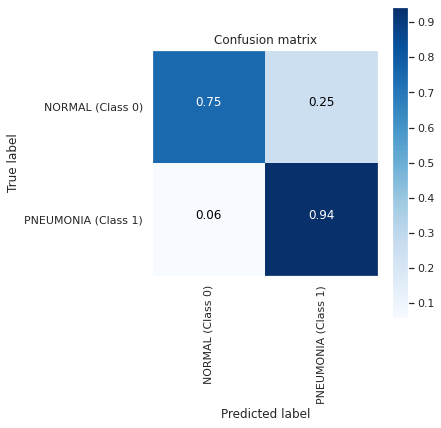

In [ ]:
#plot confusion matrix for test data
cm=confusion_matrix(true_classes, pred_classes, normalize='true')

plot_confusion_matrix(
    cm, classes = ['NORMAL (Class 0)','PNEUMONIA (Class 1)'], normalize = False)

## **Model 11: Interpretation**

Model 11 can detect pneumonia X-ray with recall of 94% and 91% accuracy.

Model 11 can detect normal X-ray with 75% recall and 84% of it are true normal X-ray images.

Model 11 has a train accuracy of 0.9393,  0.9423 vaidation accuracy and test accuracy of 0.8894.

Model 11 is  reliable for pneumonia diagnosis.

# **Model 12**

## **Model 12: Data Generator - Data Augmentation**

In [ ]:
#Data generator
# No data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255)
                                   

train_generator = train_datagen.flow_from_dataframe(dataframe = train,
                                                    x_col = "image",
                                                    y_col = "target",
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = "binary")

val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator= val_datagen.flow_from_dataframe(dataframe = val,
                                              x_col = "image",
                                              y_col = "target",
                                              target_size = (150, 150),
                                              batch_size = 32,
                                              class_mode = "binary")


test_datagen = ImageDataGenerator(rescale = 1./255)

# set shuffle = False for test set or else when making prediction later,
# function .evaluate() and function .predict_classes() 
# will yield different accuracy score.
#when set to False, data is sorted in alphanumeric order 
#while default is set to True, which shuffles the data.
test_generator = test_datagen.flow_from_dataframe(dataframe = test,
                                                  x_col = "image",
                                                  y_col = "target",
                                                  target_size = (150, 150),
                                                  class_mode = "binary",
                                                  batch_size = 32,
                                                  shuffle=False)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

Found 3543 validated image filenames belonging to 2 classes.
Found 1162 validated image filenames belonging to 2 classes.
Found 1148 validated image filenames belonging to 2 classes.


In [ ]:
# counting the stepsize per epoch
train_steps_per_epoch = np.math.ceil(
    train_generator.samples / train_generator.batch_size)
val_steps_per_epoch = np.math.ceil(
    val_generator.samples / val_generator.batch_size)
test_steps_per_epoch = np.math.ceil(
    test_generator.samples / test_generator.batch_size)

In [ ]:
#define the callbacks
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 10,
                                min_delta=0.1, mode='min', verbose = 1),
                 ModelCheckpoint(filepath = 'model12.h5', monitor = 'val_loss',
                                 save_best_only = True, save_weights_only=True)]

# **Model 12: CNN Architecture**

In [ ]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / train_images)*1148/2.0 
weight_for_1 = (1 / val_images)*1148/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}



In [ ]:
# Calculate class imbalance
from sklearn.utils.class_weight import compute_sample_weight

class_weights = compute_sample_weight(class_weight='balanced', y=targets_train)
class_weights = dict(enumerate(class_weights))

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight

compute_sample_weight(class_weight='balanced', y=targets_train)

In [ ]:
# create the cnn  model

model12 = Sequential()

# 1st convolution layer, padding is valid by default, activation 
# function as relu, kernel_regularizer: Regularizer function applied to
# the kernel weights matrix.
model12.add(Conv2D(135, (3, 3), padding='valid', activation='relu',
                   kernel_regularizer=regularizers.l2(0.01),
                   input_shape=(150, 150, 3)))
# apply batch normalization to make cnn faster
model12.add(BatchNormalization())
 # apply pooling function, same padding is valid by default
model12.add(MaxPooling2D(pool_size = (2, 2), padding='valid'))

# 2nd convolution layer, same as the first one with application 0f 0.2% dropout
model12.add(Conv2D(60, (3, 3), padding='valid', activation='relu',
                   kernel_regularizer=regularizers.l2(0.01)))
model12.add(BatchNormalization())
# Inputs not set to 0 are scaled up by 1/(1 - rate)
model12.add(Dropout(0.2))
model12.add(MaxPooling2D(pool_size = (2, 2), padding='valid'))


# 3rd convolution layer same as last one
model12.add(Conv2D(35, (3, 3), padding='valid', activation='relu',
                   kernel_regularizer=regularizers.l2(0.01)))
model12.add(BatchNormalization())
model12.add(Dropout(0.2))
model12.add(MaxPooling2D(pool_size = (2, 2), padding="valid"))




# flatten and hidden layer
# flattens the input. Does not affect the batch size.
model12.add(Flatten())
# add one dense neural network layer with 512 neurons 
# kernel_regularizer: Regularizer function applied to the kernel weights matrix.
model12.add(Dense(35, activation='relu',
                  kernel_regularizer=regularizers.l2(0.01)))
# apply 0.2% dropout
model12.add(Dropout(0.2))
# apply batch normalization
model12.add(BatchNormalization())


# output layer
model12.add(Dense(1, activation='sigmoid'))

# Creating model and compiling
# compile
model12.compile(loss = 'binary_crossentropy',
                  optimizer = keras.optimizers.Adam(0.0001), metrics = ['acc'])
                 
model12.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 135)     3780      
_________________________________________________________________
batch_normalization_2 (Batch (None, 148, 148, 135)     540       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 135)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 60)        72960     
_________________________________________________________________
batch_normalization_3 (Batch (None, 72, 72, 60)        240       
_________________________________________________________________
dropout_1 (Dropout)          (None, 72, 72, 60)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 60)       

# **Model 12: Fitting**


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)


start = datetime.datetime.now()
result_model12 = model12.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch, 
                              epochs=30, 
                              validation_data=val_generator, 
                              validation_steps=val_steps_per_epoch,
                              callbacks=early_stopping,
                              class_weight=class_weights)
                              
                              

                              

end = datetime.datetime.now()
elapsed = end - start
print('\n ---------Elapsed Time-----------')
print('Time to fit Model 12 is:\n {}'.format(elapsed))


#save model
model12.save(
    "cnn_model12_Classweight_NO_DataAugmentation_Dropout_Optimizer__Adam_padding_batchnormalizationcallback_regulizers_l2.h5")


Epoch 1/30
111/111 [==============================] - 1612s 14s/step - loss: 2.4728 - acc: 0.7670 - val_loss: 2.5229 - val_acc: 0.7160
Epoch 2/30
111/111 [==============================] - 48s 433ms/step - loss: 2.0672 - acc: 0.9253 - val_loss: 2.6077 - val_acc: 0.7160
Epoch 3/30
111/111 [==============================] - 48s 432ms/step - loss: 1.8275 - acc: 0.9462 - val_loss: 2.1103 - val_acc: 0.7169
Epoch 4/30
111/111 [==============================] - 48s 434ms/step - loss: 1.6500 - acc: 0.9516 - val_loss: 1.8263 - val_acc: 0.7401
Epoch 5/30
111/111 [==============================] - 48s 433ms/step - loss: 1.4641 - acc: 0.9681 - val_loss: 1.5982 - val_acc: 0.7935
Epoch 6/30
111/111 [==============================] - 48s 432ms/step - loss: 1.3176 - acc: 0.9797 - val_loss: 1.2255 - val_acc: 0.9725
Epoch 7/30
111/111 [==============================] - 48s 432ms/step - loss: 1.1863 - acc: 0.9795 - val_loss: 1.1322 - val_acc: 0.9492
Epoch 8/30
111/111 [==============================] - 4

In [ ]:
#save model
model12.save(
    "cnn_model12_Classweight_NO_DataAugmentation_Dropout_Optimizer__Adam_padding_batchnormalizationcallback_regulizers_l2.h5")

## **Model 12: Data Evaluation**

## **Model 12: Visualization of Loss and Accuracy of Training and Validation Data**

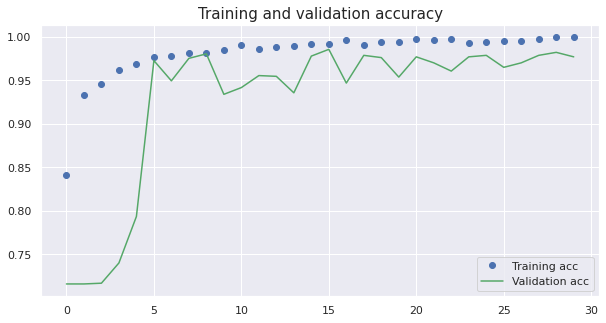

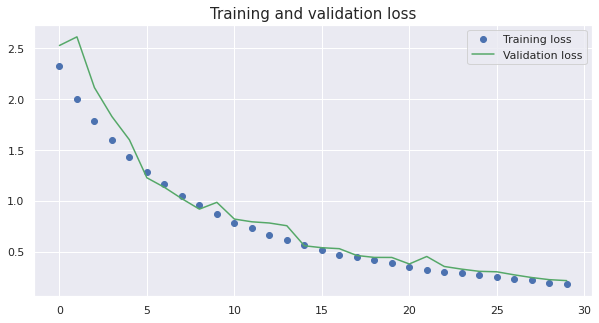

In [ ]:
# Visualization of ccuracy and loss in tarining and validation data

visualize_training_results(result_model12)

## **Model 12: Metrics**

In [ ]:
# Collecting model metrics

evaluation_result1(model12,
                   "cnn_model12_classweight_NO_DataAugmentation_Dropout_Optimizer__Adam_padding_batchnormalizationcallback_regulizers_l2")

{'Model': 'cnn_model12_classweight_NO_DataAugmentation_Dropout_Optimizer__Adam_padding_batchnormalizationcallback_regulizers_l2',
 'Precision': 0.7032,
 'Recall': 0.7091,
 'Train Accuracy': 1.0,
 'Train Loss': 0.1749,
 'Validation Accuracy': 0.9768,
 'f1': 0.7062,
 'validation Loss': 0.2172}

In [ ]:
results=evaluation_result1(model12,
                           "cnn_model12_classweight_NO_DataAugmentation_Dropout_Optimizer__Adam_padding_batchnormalizationcallback_regulizers_l2")
results_final = []
# appending the results of the new model
results_final.append(results)
#  results in dataframe
df_model_results = pd.DataFrame(results_final)
df_model_results

,Model,Train Accuracy,Train Loss,Validation Accuracy,validation Loss,Precision,Recall,f1
0,cnn_model12_classweight_NO_DataAugmentation_Dr...,1.0,0.1749,0.9768,0.2172,0.7092,0.7151,0.7121


# **Model 12: Data Prediction & Classification Report**

In [ ]:
#make prediction
pred = model12.predict_generator(val_generator, val_steps_per_epoch)
pred_classes = np.round(pred)
#define target
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

print("Baseline Model:\n")
print("Confusion Matrix:\n", confusion_matrix(true_classes, pred_classes))
print("----------------------------------------------------")
print("Classification Report:\n", classification_report(
    true_classes, pred_classes, target_names=class_labels))

Baseline Model:

Confusion Matrix:
 [[ 94 236]
 [229 603]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

      normal       0.29      0.28      0.29       330
   pneumonia       0.72      0.72      0.72       832

    accuracy                           0.60      1162
   macro avg       0.50      0.50      0.50      1162
weighted avg       0.60      0.60      0.60      1162



In [ ]:
#make prediction
pred = model12.predict_generator(test_generator, test_steps_per_epoch)
pred_classes = np.round(pred)
#define target
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("Baseline Model:\n")
print("Confusion Matrix:\n", confusion_matrix(true_classes, pred_classes))
print("----------------------------------------------------")
print("Classification Report:\n", classification_report(
    true_classes, pred_classes, target_names=class_labels))

Baseline Model:

Confusion Matrix:
 [[146 175]
 [  6 821]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

      normal       0.96      0.45      0.62       321
   pneumonia       0.82      0.99      0.90       827

    accuracy                           0.84      1148
   macro avg       0.89      0.72      0.76      1148
weighted avg       0.86      0.84      0.82      1148



# **Model 12: Confusion Matrix**

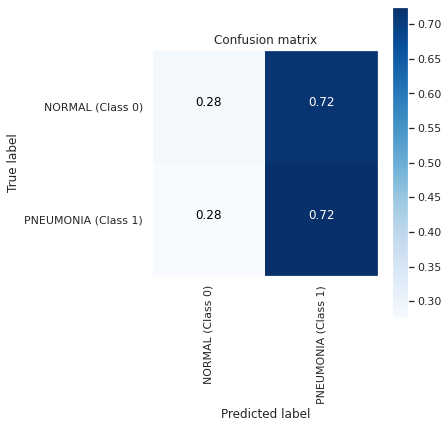

True Negatives:  0.28
False Positives:  0.72
False Negatives:  0.28
True Positives:  0.72


In [ ]:
cm=confusion_matrix(true_classes, pred_classes, normalize='true')

plot_confusion_matrix(
    cm, classes = ['NORMAL (Class 0)','PNEUMONIA (Class 1)'], normalize = False)

## **Model 12: Interpretation**



Model 12 can detect pneumonia X-ray with recall of 99% and 82% accuracy.

Model 12 can detect normal X-ray with 45% recall and 96% of it are true normal X-ray images.

Model 12 has a train accuracy of 1  and validation accuracy of 0.9768.

# **Model 13: Data Generator- No Data Augmentation**

In [ ]:
# Data generator
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3,
                                   vertical_flip=True)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_data_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),shuffle=True,
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',seed=42)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_data_dir,
                 target_size=(150, 150),  
                 class_mode='binary', 
                 shuffle=False,batch_size=32, seed=42)

val_generator = test_datagen.flow_from_directory(val_data_dir,
                       target_size=(150, 150),
                       batch_size=1162,
                       class_mode='binary', seed=42)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

Found 3543 images belonging to 2 classes.
Found 1148 images belonging to 2 classes.
Found 1162 images belonging to 2 classes.


In [ ]:
# counting the stepsize per epoch
train_steps_per_epoch = np.math.ceil(
    train_generator.samples / train_generator.batch_size)
val_steps_per_epoch = np.math.ceil(
    val_generator.samples / val_generator.batch_size)
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

In [ ]:
#define the callbacks
early_stopping = [EarlyStopping(monitor = 'val_loss',  patience = 10,
                                min_delta=0.1, mode='min', verbose = 1),
                               
                 ReduceLROnPlateau(monitor='val_loss', factor=0.3,
                                   patience=2, verbose=2, mode='max'),
                 ModelCheckpoint(filepath = 'model13.h5', monitor = 'val_loss',
                                 save_best_only = True, save_weights_only=True)]

# **Model 13: CNN Architecture**

In [ ]:
model13 = Sequential()

# 1st convolution layer,  activation function as relu,
model13.add(Conv2D(16, (3, 3), padding='same', activation='relu',
                   input_shape=(150, 150, 3)))


 # apply pooling function
model13.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd convolution layer, same as the first one 
model13.add(Conv2D(32, (3, 3), padding='same', activation='relu'))

model13.add(MaxPooling2D(pool_size = (2, 2)))


# 3rd convolution layer same as last one
model13.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

model13.add(MaxPooling2D(pool_size = (2, 2)))

# 4th convolution layer same as last one with dropout
model13.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

model13.add(MaxPooling2D(pool_size = (2, 2)))
model13.add(Dropout(0.2))

# 5th convolution layer same as last one with dropout
model13.add(Conv2D(256, (3, 3), padding='same', activation='relu'))

model13.add(MaxPooling2D(pool_size = (2, 2)))
model13.add(Dropout(0.2))



# flatten and hidden layer
# flattens the input. Does not affect the batch size.
model13.add(Flatten())
# add three dense neural network layer 

model13.add(Dense(512, activation='relu'))
# apply 0.7% dropout
model13.add(Dropout(0.7))

model13.add(Dense(128, activation='relu'))
# apply 0.5% dropout
model13.add(Dropout(0.5))

model13.add(Dense(64, activation='relu'))
# apply 0.3% dropout
model13.add(Dropout(0.3))

# output layer
model13.add(Dense(1, activation='sigmoid'))

# Creating model and compiling
# compile
model13.compile(loss = 'binary_crossentropy',
                  optimizer = keras.optimizers.Adam(0.0001), metrics = ['acc'])
                 
model13.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 18, 18, 128)      

# **Model 13: Fitting**

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)


start = datetime.datetime.now()
result_model13 = model13.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch, 
                              epochs=30, 
                              validation_data=val_generator, 
                              validation_steps=val_steps_per_epoch,
                              callbacks=early_stopping)
                              
                              

                              

end = datetime.datetime.now()
elapsed = end - start
print('\n ---------Elapsed Time-----------')
print('Time to fit Model 13 is:\n {}'.format(elapsed))




Epoch 1/30
111/111 [==============================] - 61s 545ms/step - loss: 0.6152 - acc: 0.7269 - val_loss: 0.6111 - val_acc: 0.7160
Epoch 2/30
111/111 [==============================] - 59s 532ms/step - loss: 0.6013 - acc: 0.7277 - val_loss: 0.6021 - val_acc: 0.7160
Epoch 3/30
111/111 [==============================] - 60s 539ms/step - loss: 0.5775 - acc: 0.7269 - val_loss: 0.4418 - val_acc: 0.7160

Epoch 00003: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
Epoch 4/30
111/111 [==============================] - 60s 538ms/step - loss: 0.4564 - acc: 0.7359 - val_loss: 0.4132 - val_acc: 0.9096
Epoch 5/30
111/111 [==============================] - 60s 538ms/step - loss: 0.3959 - acc: 0.7601 - val_loss: 0.3558 - val_acc: 0.8898

Epoch 00005: ReduceLROnPlateau reducing learning rate to 8.999999772640877e-06.
Epoch 6/30
111/111 [==============================] - 60s 540ms/step - loss: 0.3554 - acc: 0.8127 - val_loss: 0.3777 - val_acc: 0.8683
Epoch 7/30
111/111 [=======

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#save model
model_save_name = 'model13'
path = F"/content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/{model_save_name}" 
model13.save(path)

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/model13/assets


In [ ]:
#save model
model_save_name = 'model13.h5'
path = F"/content/gdrive/My Drive/Pneumonia_Diagnosis_Project/Saved_Models/{model_save_name}" 
model13.save(path)

In [ ]:
#save model
model13.save("model13.h5")

### **Data Evaluation**

# **Model 13: Visualization of loss and Accuracy of Training and Validation Data**

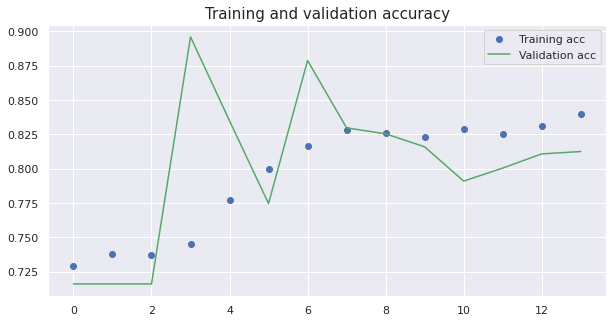

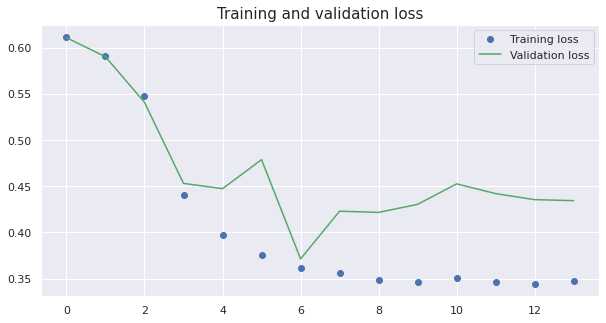

In [ ]:
# Visualization of ccuracy and loss in tarining and validation data

visualize_training_results(result_model13)

## **Model 13: Metrics**

In [ ]:
# Collecting model metrics

evaluation_result(model13, "model13")

{'Model': 'model13',
 'Precision': 0.9634,
 'Recall': 0.7001,
 'Test Accuracy': 0.7648,
 'Test Loss': 0.4604,
 'Train Accuracy': 0.8755,
 'Train Loss': 0.333,
 'Validation Accuracy': 0.8124,
 'f1': 0.8109,
 'validation Loss': 0.4344}

In [ ]:
results=evaluation_result(model13, "model13")
results_final = []
# appending the results of the new model
results_final.append(results)
#  results in dataframe
df_model_results = pd.DataFrame(results_final)
df_model_results

,Model,Train Accuracy,Train Loss,Validation Accuracy,validation Loss,Test Accuracy,Test Loss,Precision,Recall,f1
0,model13,0.8662,0.3386,0.8124,0.4344,0.7648,0.4604,0.9634,0.7001,0.8109


# **Model 13: Predictions and Classification Report**

In [ ]:
# get predictions on the val set
y_hat = model13.predict_classes(val_images)

print('Model: Model13', '\n', classification_report(
    val_labels, y_hat, target_names = ['NORMAL (Class 0)','PNEUMONIA (Class 1)']))

Model: Model13 
                      precision    recall  f1-score   support

   NORMAL (Class 0)       0.69      0.95      0.80       330
PNEUMONIA (Class 1)       0.98      0.83      0.90       832

           accuracy                           0.86      1162
          macro avg       0.83      0.89      0.85      1162
       weighted avg       0.89      0.86      0.87      1162



In [ ]:
#make prediction for test data
pred = model13.predict_generator(test_generator, test_steps_per_epoch)
pred_classes = np.round(pred)
#define target
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("Baseline Model:\n")
print("Confusion Matrix:\n", confusion_matrix(true_classes, pred_classes))
print("----------------------------------------------------")
print("Classification Report:\n", classification_report(
    true_classes, pred_classes, target_names=class_labels))

Baseline Model:

Confusion Matrix:
 [[299  22]
 [248 579]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.55      0.93      0.69       321
   PNEUMONIA       0.96      0.70      0.81       827

    accuracy                           0.76      1148
   macro avg       0.76      0.82      0.75      1148
weighted avg       0.85      0.76      0.78      1148



# **Model 13: Confusion Matrix**

In [ ]:
# confusion matrix for validation set

cm=confusion_matrix(val_labels, np.round(y_hat))
cm

array([[313,  17],
       [141, 691]])

In [ ]:
# true negative(tn), false positive(fp),
# false negative (fn), true positive(tp) for valiation data
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(313, 17, 141, 691)

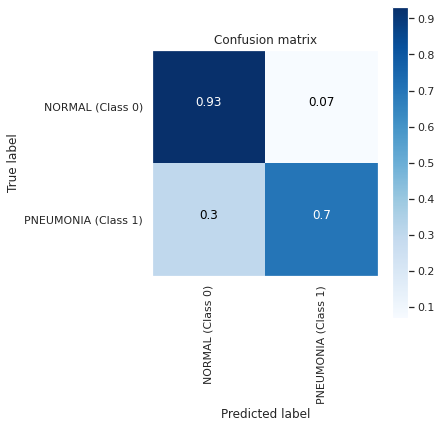

True Negatives:  0.93
False Positives:  0.07
False Negatives:  0.3
True Positives:  0.7


In [ ]:
# plot confusion matrix for test data
cm=confusion_matrix(true_classes, pred_classes, normalize='true')

plot_confusion_matrix(
    cm, classes = ['NORMAL (Class 0)','PNEUMONIA (Class 1)'], normalize = False)

# **Model 13: Interpretation**


Model 13 can detect pneumonia X-ray with recall of 93% and 55% accuracy.

Model 13 can detect normal X-ray with 70% recall and 96% of it are true normal X-ray images.

Model 13 has a train accuracy of 0.8662, validation accuracy of 0.8124 & test accuracy 0.8124.

## **Model 14**

## **Model 14: Data Generator- No Data Augmentation**

In [ ]:
#Data generator
# No data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255)
                                   

train_generator = train_datagen.flow_from_dataframe(dataframe = train,
                                                    x_col = "image",
                                                    y_col = "target",
                                                    target_size = (150, 150),
                                                    batch_size = 32,
                                                    class_mode = "binary")

val_datagen = ImageDataGenerator(rescale = 1./255)

val_generator= val_datagen.flow_from_dataframe(dataframe = val,
                                              x_col = "image",
                                              y_col = "target",
                                              target_size = (150, 150),
                                              batch_size = 32,
                                              class_mode = "binary")


test_datagen = ImageDataGenerator(rescale = 1./255)

# set shuffle = False for test set or else when making prediction later,
# function .evaluate() and function .predict_classes() 
# will yield different accuracy score.
# when set to False, data is sorted in alphanumeric order
# while default is set to True, which shuffles the data.
test_generator = test_datagen.flow_from_dataframe(dataframe = test,
                                                  x_col = "image",
                                                  y_col = "target",
                                                  target_size = (150, 150),
                                                  class_mode = "binary",
                                                  batch_size = 32, shuffle=False)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

Found 3543 validated image filenames belonging to 2 classes.
Found 1162 validated image filenames belonging to 2 classes.
Found 1148 validated image filenames belonging to 2 classes.


In [ ]:
# counting the stepsize per epoch
train_steps_per_epoch = np.math.ceil(
    train_generator.samples / train_generator.batch_size)
val_steps_per_epoch = np.math.ceil(
    val_generator.samples / val_generator.batch_size)
test_steps_per_epoch = np.math.ceil(
    test_generator.samples / test_generator.batch_size)

In [ ]:
#define the callbacks
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 10,
                                min_delta=0.1, mode='min', verbose = 1),
                 ModelCheckpoint(filepath = 'model14.h5', monitor = 'val_loss',
                                 save_best_only = True, save_weights_only=True)]

# **Model 14: CNN Archirecture**

I used same Model 12 architecture with the addition of Xavier and He initializers.

Weight initialization is an important consideration in the design of a neural network model.

The nodes in neural networks are composed of parameters referred to as weights used to calculate a weighted sum of the inputs.

Neural network models are fit using an optimization algorithm called stochastic gradient descent that incrementally changes the network weights to minimize a loss function, hopefully resulting in a set of weights for the mode that is capable of making useful predictions.

The current standard approach for initialization of the weights of neural network layers and nodes that use the Sigmoid or TanH activation function is called “glorot” or “xavier” initialization.

There are two versions of this weight initialization method, which we will refer to as “xavier” and “normalized xavier.”

Both approaches were derived assuming that the activation function is linear, nevertheless, they have become the standard for nonlinear activation functions like Sigmoid and Tanh, but not ReLU.

The xavier initialization method is calculated as a random number with a uniform probability distribution (U) between the range -(1/sqrt(n)) and 1/sqrt(n), where n is the number of inputs to the node.

weight = U [-(1/sqrt(n)), 1/sqrt(n)]

The normalized xavier initialization method is calculated as a random number with a uniform probability distribution (U) between the range -(sqrt(6)/sqrt(n + m)) and sqrt(6)/sqrt(n + m), where n us the number of inputs to the node (e.g. number of nodes in the previous layer) and m is the number of outputs from the layer (e.g. number of nodes in the current layer).

weight = U [-(sqrt(6)/sqrt(n + m)), sqrt(6)/sqrt(n + m)]

The “xavier” weight initialization was found to have problems when used to initialize networks that use the rectified linear (ReLU) activation function.

As such, a modified version of the approach was developed specifically for nodes and layers that use ReLU activation, popular in the hidden layers of most multilayer Perceptron and convolutional neural network models.

The current standard approach for initialization of the weights of neural network layers and nodes that use the rectified linear (ReLU) activation function is called “he” initialization.

The he initialization method is calculated as a random number with a Gaussian probability distribution (G) with a mean of 0.0 and a standard deviation of sqrt(2/n), where n is the number of inputs to the node.

weight = G (0.0, sqrt(2/n))

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers 



initializer = tf.keras.initializers.GlorotUniform()

# create the cnn  model
model14 = Sequential()

# 1st convolution layer, padding is valid by default, 
# activation function as relu,
# kernel_regularizer: Regularizer function applied to the kernel weights matrix.
model14.add(Conv2D(135, (3, 3), padding='valid', activation='relu',
                   kernel_regularizer=regularizers.l2(0.01),
                   kernel_initializer=initializer, input_shape=(150, 150, 3)))
# apply batch normalization to make cnn faster
model14.add(BatchNormalization())
 # apply pooling function, same padding is valid by default
model14.add(MaxPooling2D(pool_size = (2, 2), padding='valid'))

# 2nd convolution layer, same as the first one with application 0f 0.2% dropout
model14.add(Conv2D(60, (3, 3), padding='valid', activation='relu',
                   kernel_initializer=initializer,
                   kernel_regularizer=regularizers.l2(0.01)))
model14.add(BatchNormalization())
# Inputs not set to 0 are scaled up by 1/(1 - rate)
model14.add(Dropout(0.2))
model14.add(MaxPooling2D(pool_size = (2, 2), padding='valid'))


# 3rd convolution layer same as last one
model14.add(Conv2D(35, (3, 3), padding='valid', activation='relu',
                   kernel_initializer=initializer,
                   kernel_regularizer=regularizers.l2(0.01)))
model14.add(Dropout(0.2))
model14.add(MaxPooling2D(pool_size = (2, 2), padding="valid"))




# flatten and hidden layer
# Flattens the input. Does not affect the batch size.
model14.add(Flatten())
# add one dense neural network layer with 512 neurons 
# kernel_regularizer: Regularizer function applied to the kernel weights matrix.
initializer = tf.keras.initializers.HeNormal()
model14.add(Dense(35, activation='relu', 
                  kernel_regularizer=regularizers.l2(0.01),
                  kernel_initializer=initializer))
# apply 0.2% dropout
model14.add(Dropout(0.2))
#applu batch normalization
model14.add(BatchNormalization())


# output layer
model14.add(Dense(1, activation='sigmoid'))

# Creating model and compiling
#compile
model14.compile(loss = 'binary_crossentropy',
                  optimizer = keras.optimizers.Adam(0.0001), metrics = ['acc'])
                 
model14.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 148, 148, 135)     3780      
_________________________________________________________________
batch_normalization_10 (Batc (None, 148, 148, 135)     540       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 74, 74, 135)       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 72, 72, 60)        72960     
_________________________________________________________________
batch_normalization_11 (Batc (None, 72, 72, 60)        240       
_________________________________________________________________
dropout_25 (Dropout)         (None, 72, 72, 60)        0         
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 36, 36, 60)      

## **Model 14: Fitting**

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)


start = datetime.datetime.now()
result_model14 = model14.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch, 
                              epochs=27, 
                              validation_data=val_generator, 
                              validation_steps=val_steps_per_epoch,
                              callbacks=early_stopping)
                              
                              

                              

end = datetime.datetime.now()
elapsed = end - start
print('\n ---------Elapsed Time-----------')
print('Time to fit Model 14 is:\n {}'.format(elapsed))


#save model
model14.save("model14.h5")

Epoch 1/27
111/111 [==============================] - 56s 500ms/step - loss: 0.1452 - acc: 0.9972 - val_loss: 0.3237 - val_acc: 0.9182
Epoch 2/27
111/111 [==============================] - 55s 495ms/step - loss: 0.1447 - acc: 0.9949 - val_loss: 0.2454 - val_acc: 0.9509
Epoch 3/27
111/111 [==============================] - 55s 495ms/step - loss: 0.1436 - acc: 0.9949 - val_loss: 0.1897 - val_acc: 0.9716
Epoch 4/27
111/111 [==============================] - 54s 492ms/step - loss: 0.1281 - acc: 0.9963 - val_loss: 0.8821 - val_acc: 0.7642
Epoch 5/27
111/111 [==============================] - 55s 492ms/step - loss: 0.1167 - acc: 0.9992 - val_loss: 0.1579 - val_acc: 0.9750
Epoch 6/27
111/111 [==============================] - 54s 491ms/step - loss: 0.1092 - acc: 0.9986 - val_loss: 0.6048 - val_acc: 0.8399
Epoch 7/27
111/111 [==============================] - 55s 493ms/step - loss: 0.1153 - acc: 0.9946 - val_loss: 0.8553 - val_acc: 0.6928
Epoch 8/27
111/111 [==============================] - 5

## **Data Evaluation**

In [ ]:
#save model
model14.save("model14.h5")

## **Model 14: Visualization of Loss and Accuracy of Training and Validation Data**

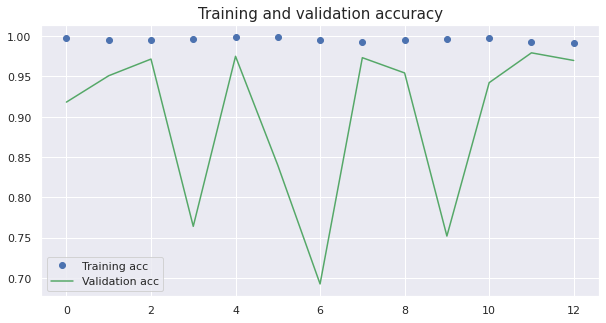

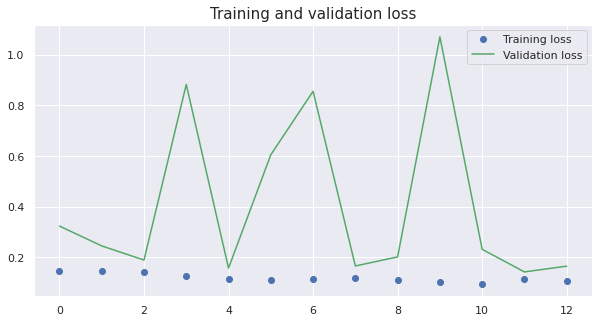

In [ ]:
# Visualization of ccuracy and loss in tarining and validation data

visualize_training_results(result_model14)

## **Model 14: Metrics**

In [ ]:
# Collecting model metrics

evaluation_result(model14, "model14")

{'Model': 'model14',
 'Precision': 0.8078,
 'Recall': 0.9964,
 'Test Accuracy': 0.8267,
 'Test Loss': 0.7937,
 'Train Accuracy': 0.9975,
 'Train Loss': 0.0946,
 'Validation Accuracy': 0.9699,
 'f1': 0.8923,
 'validation Loss': 0.1656}

In [ ]:
results=evaluation_result(model14, "model14")
results_final = []
# appending the results of the new model
results_final.append(results)
#  results in dataframe
df_model_results = pd.DataFrame(results_final)
df_model_results

,Model,Train Accuracy,Train Loss,Validation Accuracy,validation Loss,Test Accuracy,Test Loss,Precision,Recall,f1
0,model14,0.9975,0.0946,0.9699,0.1656,0.8267,0.7937,0.8078,0.9964,0.8923


### **Model 14: Prediction & Classification Report**

In [ ]:
#make prediction
pred = model14.predict_generator(test_generator, test_steps_per_epoch)
pred_classes = np.round(pred)
#define target
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("Model 14:\n")
print("Confusion Matrix:\n", confusion_matrix(true_classes, pred_classes))
print("----------------------------------------------------")
print("Classification Report:\n", classification_report(
    true_classes, pred_classes, target_names=class_labels))

Model 14:

Confusion Matrix:
 [[125 196]
 [  3 824]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

      normal       0.98      0.39      0.56       321
   pneumonia       0.81      1.00      0.89       827

    accuracy                           0.83      1148
   macro avg       0.89      0.69      0.72      1148
weighted avg       0.86      0.83      0.80      1148



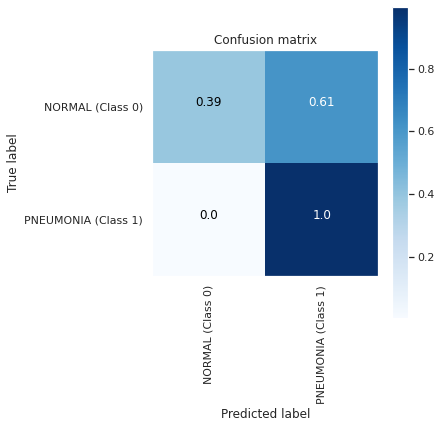

True Negatives:  0.39
False Positives:  0.61
False Negatives:  0.0
True Positives:  1.0


In [ ]:
cm=confusion_matrix(true_classes, pred_classes, normalize='true')

plot_confusion_matrix(
    cm, classes = ['NORMAL (Class 0)','PNEUMONIA (Class 1)'], normalize = False)

## **Model 14: Confusion Matrix**

## **Model 14: Interpretation**

Based on test data of 1148 images.

Model 14 can detect pneumonia X-ray with recall of 100% and 81% accuracy.

Model 14 can detect normal X-ray with 39% recall and 98% of it are true normal X-ray images.

Model 14 has a train accuracy of 0.9975, validation accuracy of 0.9699 & test accuracy 0.8267.

## **Model 15**

## **Model 15: Data Generator- NO Data Augmentation**

In [ ]:
# Data generator
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3,
                                   vertical_flip=True)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_data_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),shuffle=True,
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary',seed=42)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_data_dir,
                 target_size=(150, 150),  
                 class_mode='binary', 
                 shuffle=False,seed=42)

val_generator = test_datagen.flow_from_directory(val_data_dir,
                       target_size=(150, 150),
                       batch_size=32,
                       class_mode='binary')

Found 3543 images belonging to 2 classes.
Found 1148 images belonging to 2 classes.
Found 1162 images belonging to 2 classes.


In [ ]:
# counting the stepsize per epoch
train_steps_per_epoch = np.math.ceil(
    train_generator.samples / train_generator.batch_size)
val_steps_per_epoch = np.math.ceil(
    val_generator.samples / val_generator.batch_size)
test_steps_per_epoch = np.math.ceil(
    test_generator.samples / test_generator.batch_size)

In [ ]:
#define the callbacks
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 10,
                                min_delta=0.1, mode='min', verbose = 1),
                 ModelCheckpoint(filepath = 'model15.h5', monitor = 'val_loss',
                                 save_best_only = True, save_weights_only=True)]

## **Model 15: CNN Architecture**

Same architecture as Model 14, but increased number of epochs to 30. In Model 14 I determined epochs= 27.

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import initializers 



initializer = tf.keras.initializers.GlorotUniform()

# create the cnn  model
model15 = Sequential()

# 1st convolution layer, padding is valid by default,
# activation function as relu,
# kernel_regularizer: Regularizer function applied to the kernel weights matrix.
model15.add(Conv2D(135, (3, 3), padding='valid', activation='relu',
                   kernel_regularizer=regularizers.l2(0.01),
                   kernel_initializer=initializer, input_shape=(150, 150, 3)))
# apply batch normalization to make cnn faster
model15.add(BatchNormalization())
 # apply pooling function, same padding is valid by default
model15.add(MaxPooling2D(pool_size = (2, 2), padding='valid'))

# 2nd convolution layer, same as the first one with application 0f 0.2% dropout
model15.add(Conv2D(60, (3, 3), padding='valid', activation='relu',
                   kernel_initializer=initializer,
                   kernel_regularizer=regularizers.l2(0.01)))
model15.add(BatchNormalization())
# Inputs not set to 0 are scaled up by 1/(1 - rate)
model15.add(Dropout(0.2))
model15.add(MaxPooling2D(pool_size = (2, 2), padding='valid'))


# 3rd convolution layer same as last one
model15.add(Conv2D(35, (3, 3), padding='valid', activation='relu',
                   kernel_initializer=initializer,
                   kernel_regularizer=regularizers.l2(0.01)))
model15.add(Dropout(0.2))
model15.add(MaxPooling2D(pool_size = (2, 2), padding="valid"))




# flatten and hidden layer
# Flattens the input. Does not affect the batch size.
model15.add(Flatten())
# add one dense neural network layer with 512 neurons 
# kernel_regularizer: Regularizer function applied to the kernel weights matrix.
initializer = tf.keras.initializers.HeNormal()
model15.add(Dense(35, activation='relu',
                  kernel_regularizer=regularizers.l2(0.01),
                  kernel_initializer=initializer))
# apply 0.2% dropout
model15.add(Dropout(0.2))
#applu batch normalization
model15.add(BatchNormalization())


# output layer
model15.add(Dense(1, activation='sigmoid'))

# Creating model and compiling
#compile
model15.compile(loss = 'binary_crossentropy',
                  optimizer = keras.optimizers.Adam(0.0001), metrics = ['acc'])
                 
model15.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 148, 148, 135)     3780      
_________________________________________________________________
batch_normalization_13 (Batc (None, 148, 148, 135)     540       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 74, 74, 135)       0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 72, 72, 60)        72960     
_________________________________________________________________
batch_normalization_14 (Batc (None, 72, 72, 60)        240       
_________________________________________________________________
dropout_28 (Dropout)         (None, 72, 72, 60)        0         
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 36, 36, 60)      

## **Model 15: Fitting**

In [ ]:
np.random.seed(30)
tf.random.set_seed(30)


start = datetime.datetime.now()
result_model15 = model15.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch, 
                              epochs=30, 
                              validation_data=val_generator, 
                              validation_steps=val_steps_per_epoch,
                              callbacks=early_stopping)
                              
                              

                              

end = datetime.datetime.now()
elapsed = end - start
print('\n ---------Elapsed Time-----------')
print('Time to fit Model 15 is:\n {}'.format(elapsed))


#save model
model15.save("model15.h5")

Epoch 1/30
111/111 [==============================] - 57s 502ms/step - loss: 2.4488 - acc: 0.7701 - val_loss: 2.4702 - val_acc: 0.3391
Epoch 2/30
111/111 [==============================] - 55s 496ms/step - loss: 1.9662 - acc: 0.9245 - val_loss: 2.1602 - val_acc: 0.7238
Epoch 3/30
111/111 [==============================] - 55s 495ms/step - loss: 1.7124 - acc: 0.9411 - val_loss: 1.8994 - val_acc: 0.7160
Epoch 4/30
111/111 [==============================] - 55s 496ms/step - loss: 1.4835 - acc: 0.9602 - val_loss: 1.6757 - val_acc: 0.7823
Epoch 5/30
111/111 [==============================] - 55s 496ms/step - loss: 1.3382 - acc: 0.9560 - val_loss: 1.3761 - val_acc: 0.8744
Epoch 6/30
111/111 [==============================] - 54s 489ms/step - loss: 1.1885 - acc: 0.9741 - val_loss: 1.1860 - val_acc: 0.9398
Epoch 7/30
111/111 [==============================] - 54s 486ms/step - loss: 1.0730 - acc: 0.9712 - val_loss: 1.0345 - val_acc: 0.9570
Epoch 8/30
111/111 [==============================] - 5

In [ ]:
#save model
model15.save("model15.h5")

# **Model 15: Data Evaluation**

## **Model 15: Visualization of Loss and Accuracy of Training and Validation Data.**

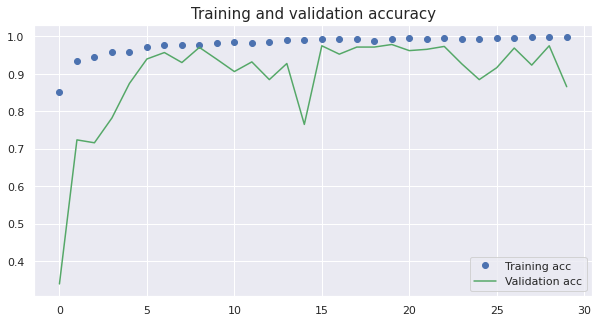

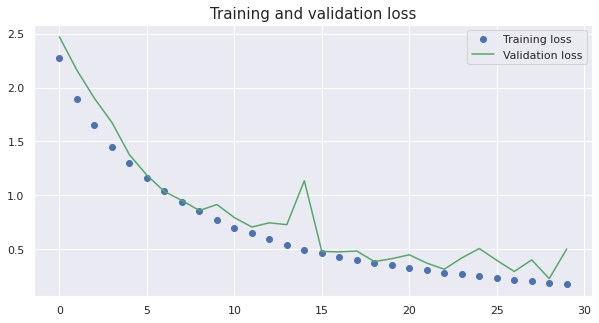

In [ ]:
# Visualization of ccuracy and loss in tarining and validation data

visualize_training_results(result_model15)

In [ ]:
# Collecting model metrics

evaluation_result(model15, "model15")

{'Model': 'model15',
 'Precision': 0.7559,
 'Recall': 1.0,
 'Test Accuracy': 0.7674,
 'Test Loss': 1.1916,
 'Train Accuracy': 0.8899,
 'Train Loss': 0.3509,
 'Validation Accuracy': 0.8657,
 'f1': 0.861,
 'validation Loss': 0.5006}

In [ ]:
results=evaluation_result(model15, "model15")
results_final = []
# appending the results of the new model
results_final.append(results)
#  results in dataframe
df_model_results = pd.DataFrame(results_final)
df_model_results

,Model,Train Accuracy,Train Loss,Validation Accuracy,validation Loss,Test Accuracy,Test Loss,Precision,Recall,f1
0,model15,0.8899,0.3509,0.8657,0.5006,0.7674,1.1916,0.7559,1.0,0.861


## **Model 15: Prediction & Classification Report**

In [ ]:
#make prediction for test data
pred = model15.predict_generator(test_generator, test_steps_per_epoch)
pred_classes = np.round(pred)
#define target
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("Model 15:\n")
print("Confusion Matrix:\n", confusion_matrix(true_classes, pred_classes))
print("----------------------------------------------------")
print("Classification Report:\n", classification_report(
    true_classes, pred_classes, target_names=class_labels))

Model 15:

Confusion Matrix:
 [[ 54 267]
 [  0 827]]
----------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

      normal       1.00      0.17      0.29       321
   pneumonia       0.76      1.00      0.86       827

    accuracy                           0.77      1148
   macro avg       0.88      0.58      0.57      1148
weighted avg       0.82      0.77      0.70      1148



## **Model 15: Confusion Matrix**

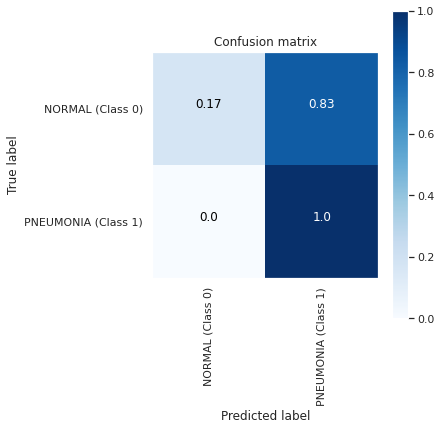

True Negatives:  0.17
False Positives:  0.83
False Negatives:  0.0
True Positives:  1.0


In [ ]:
# plot confusion matrix for test data
cm=confusion_matrix(true_classes, pred_classes, normalize='true')
plot_confusion_matrix(
    cm, classes = ['NORMAL (Class 0)','PNEUMONIA (Class 1)'], normalize = False)

## **Model 15: Interpretation**

Based on test data of 1148 images.

Model 15 can detect pneumonia X-ray with recall of 100% and 76% accuracy.

Model 15 can detect normal X-ray with 17% recall and 100% of it are true normal X-ray images.

Model 15 has a train accuracy of 0.8899, validation accuracy of 0.8657 & test accuracy 0.7674.

## **Conclusion**

This study presents a deep CNN based approach for the automatic detection of Pneumonia vs Normal X-ray images.

We have demonstrated how to distinguish between Normal and Pneumonia Chest X-Rays with our model having an test accuracy of 89%-92% and a recall of 94%-99%.

The best model which gave promising results are: Model 0 , Model 4  & Model 11.

We constucted a Convolutional Neural Network model from scratch to extract features from a given Chest X-Ray image and classify it to determine if a person is infected with Pneumonia.

## **Conclusion- Visualization -Model 11**

Model 11: Predictions on Validation Data

In [ ]:
# get predictions on the val set
y_hat = model11.predict(val_images)

img_labels = ['NORMAL', 'PNEUMONIA']

Model 11: Visualization of validation data Predictions

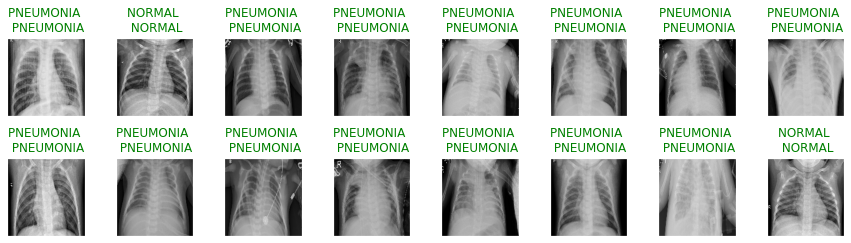

In [ ]:
# Checking from Val data set as to how good our model is predicting
fig = plt.figure(figsize=(15, 8))
#fig.tight_layout(hspace=0.2,wspace=0.2)
plt.subplots_adjust(left=0.125,bottom=0.1, 
                    wspace=0.4, hspace=0.35)
for i, idx in enumerate(np.random.choice(val_images.shape[0], size=16,
                                         replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(val_images[idx]))
    pred_idx = int(np.round(y_hat[idx]))
    true_idx = int(np.round(val_labels[idx]))
    ax.set_title("{} \n {}".format(img_labels[pred_idx], img_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

Model 11: Predictions of the Test Data

In [ ]:
# get predictions on the val set
y_hat_test = model11.predict(test_images)

img_labels = ['NORMAL', 'PNEUMONIA']

Model 11: Visualization of Test Data Predictions

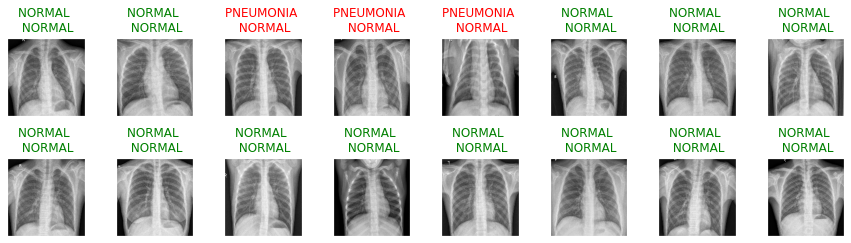

In [ ]:
# Checking from test data set as to how good our model is predicting
fig = plt.figure(figsize=(15, 8))
#fig.tight_layout(hspace=0.2,wspace=0.2)
plt.subplots_adjust(left=0.125,bottom=0.1, 
                    wspace=0.4, hspace=0.35)
for i, idx in enumerate(np.random.choice(test_images.shape[0],
                                         size=16, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[idx]))
    pred_idx = int(np.round(y_hat_test[idx]))
    true_idx = int(np.round(test_labels[idx]))
    ax.set_title("{} \n {}".format(img_labels[pred_idx], img_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

# **Conclusion-Visualization - Model 0**

Model 0: Visualization of Test Data Predictions

In [ ]:
# get predictions on the val set
y_hat = model14.predict(val_images)

img_labels = ['NORMAL', 'PNEUMONIA']

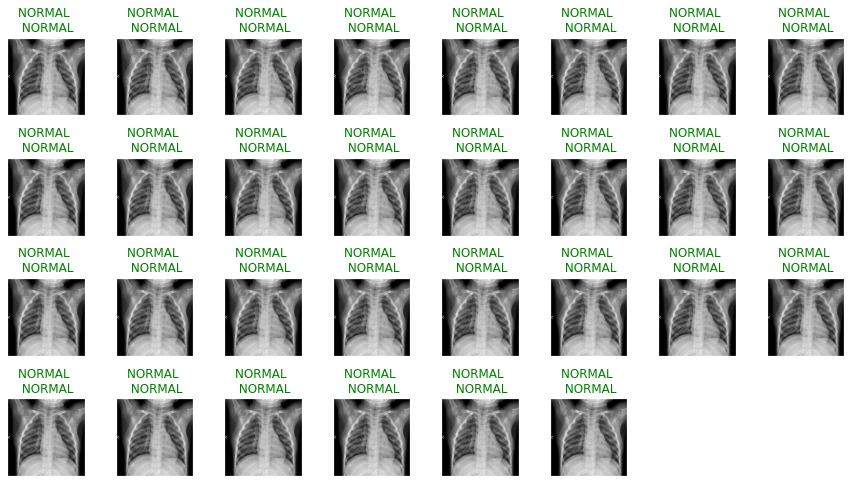

In [ ]:
# Checking from Val data set as to how good our model is predicting
fig = plt.figure(figsize=(15, 8))
#fig.tight_layout(hspace=0.2,wspace=0.2)
plt.subplots_adjust(left=0.125,bottom=0.1, 
                    wspace=0.4, hspace=0.35)
for i, idx in enumerate(np.random.choice(val_images.shape[0], size=30,
                                         replace=True)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(val_images[idx]))
    pred_idx = int(np.round(y_hat[idx]))
    true_idx = int(np.round(val_labels[idx]))
    ax.set_title("{} \n {}".format(img_labels[pred_idx], img_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

In [ ]:
# get predictions on the val set
y_hat_test = model0.predict(test_images)

img_labels = ['NORMAL', 'PNEUMONIA']

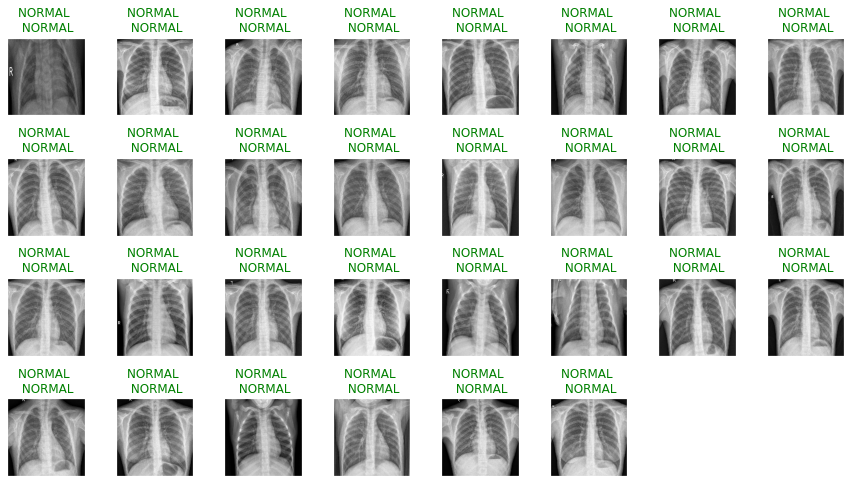

In [ ]:
# Checking from test data set as to how good our model is predicting
fig = plt.figure(figsize=(15, 8))
#fig.tight_layout(hspace=0.2,wspace=0.2)
plt.subplots_adjust(left=0.125,bottom=0.1, 
                    wspace=0.4, hspace=0.35)
for i, idx in enumerate(
      np.random.choice(test_images.shape[0], size=30, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_images[idx]))
    pred_idx = int(np.round(y_hat_test[idx]))
    true_idx = int(np.round(test_labels[idx]))
    ax.set_title("{} \n {}".format(img_labels[pred_idx], img_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

# **Business Value**

In medical field, false negative is more important than False Positive. A false positive means here to predicit pneumonia when the person is healthy is less important than a false negative which is predicting healthy while the patient is pneunmonian. A big number of False Negative in medical centers might cause a loss of life because of wrong diagnosis and that happens when we tell the person you are healthy while the person is sick.

The number of false negatives obtained with our  model here is  low of 7%  and the ability to detect true pneumonia patients of 94 %.

Our cnn model can automate the accurate diagnosis of patients and fast screening
withh aprropriate treatment. Therefore, our cnn model can save lives and prevent  the spread of diseases.

# **Recommendations**

Incorporate our model to see how it works in hospitals so that it can assist health professionals diagnose patients with pneumonia. Ofcourse these reports have to be validated.  This needs to be certified by health professionals.
This model should be run under the supervision of a radiologist to enhance accuracy/recall to improve treatment outcomes which will increase hospitals' ratings and fundings.

This model can be incorporated with the software program of X-ray machines or MRI scans to detect automatically the results once the scan of the patient is over.


# **Future Work**

We need much more data to run our validation set on so that we can be sure of the way the model is predicting. The validation data is not enough for accurate classification. More quality data for validation is needed to have better accurate image classifications.

We work towards getting our Transfer Learning model to work better.

Build a multi-class classification deep learning model to distinguish between Normal, Viral Pneumonia, and Bacterial Pneumonia

Combine CNN models with other classifiers such as Support Vector Machine (SVM) 

Tune parameters such as learning rate, batch size, try another optimizer, number of layers, different types of layer, number of neurons per layer, and the type of activation functions for each layer. GridSearchCV or RandomizedSearchSV for optimization issues.